In [1]:
%load_ext autoreload
%autoreload 2

%pwd
%matplotlib inline

import pandas as pd
from tqdm.notebook import tqdm

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.expand_frame_repr", False)

In [2]:
import pathlib, sys
import logging

DATA_FOLDER = pathlib.Path("/raid/data/students/mdti4py/datasets/cdt4py/cdt4py")

logger = logging.getLogger(name=__name__)
logger.handlers.clear()
logger.setLevel(level=logging.DEBUG)

handler = logging.StreamHandler(stream=sys.stdout)
handler.setFormatter(fmt=logging.Formatter('%(asctime)s | %(levelname)s : %(message)s'))
logger.addHandler(handler)

logger.info("Hello World")

2023-08-09 15:05:13,597 | INFO : Hello World


In [3]:
from scripts.infer.structure import AuthorRepo
from typet5.data import GitRepo


class CDT4PyRepo(GitRepo):
    def __init__(self, author_repo: AuthorRepo) -> None:
        super().__init__(
            author=author_repo.author,
            name=author_repo.repo,
            url=None,
            stars=-1,
            forks=-1
        )
        
    def authorname(self) -> str:
        return f"{self.author}/{self.name}"
        

class CDT4PyFlaskRepo(CDT4PyRepo):
    def repo_dir(self, repos_dir: pathlib.Path) -> pathlib.Path:
        return repos_dir / "flask" / self.authorname()
    
class CDT4PyNumpyRepo(CDT4PyRepo):
    def repo_dir(self, repos_dir: pathlib.Path) -> pathlib.Path:
        return repos_dir / "numpy"  / self.authorname()

2023-08-09 15:05:19.246580: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
from typet5.data import GitRepo
from scripts.infer.structure import CrossDomainTypes4Py

dataset = CrossDomainTypes4Py(dataset_root=DATA_FOLDER)
logger.debug(dataset)

test_set = dataset.test_set()

In [5]:
print(len(test_set))

8140


In [6]:
new_repos = []
for cdt4py_repo in (CDT4PyFlaskRepo, CDT4PyNumpyRepo):
    downloaded_repos = []
    for test_repo in tqdm(test_set, desc=f"{cdt4py_repo.__qualname__}"):
        repo = cdt4py_repo(dataset.author_repo(test_repo))
        if repo.repo_dir(dataset.dataset_root).is_dir():
            downloaded_repos.append(repo)

    # for r in tqdm.tqdm(downloaded_repos, desc=str(cdt4py_repo)):
    #    r.read_last_update(DATA_FOLDER)
    
    new_domain_repos = [r for r in downloaded_repos if "typeshed" not in r.name and "stub" not in r.name]
    logger.info(f"{cdt4py_repo.__qualname__}: {len(new_domain_repos)} / {len(downloaded_repos)} are not related to stubbing")
    
    new_repos.extend(new_domain_repos)

CDT4PyFlaskRepo:   0%|          | 0/8140 [00:00<?, ?it/s]

2023-08-09 15:08:32,448 | INFO : CDT4PyFlaskRepo: 4674 / 4674 are not related to stubbing


INFO:__main__:CDT4PyFlaskRepo: 4674 / 4674 are not related to stubbing


CDT4PyNumpyRepo:   0%|          | 0/8140 [00:00<?, ?it/s]

2023-08-09 15:08:32,710 | INFO : CDT4PyNumpyRepo: 6332 / 6334 are not related to stubbing


INFO:__main__:CDT4PyNumpyRepo: 6332 / 6334 are not related to stubbing


In [7]:
loc_limit = 50000

small_repos = []
all_repos = []
for rep in tqdm(new_repos):
    try:
        loc = rep.count_lines_of_code(DATA_FOLDER)
        if loc < loc_limit:
            small_repos.append(rep)
        else:
            logger.warning(f"{rep.authorname()} does not pass, with {loc} LOC")
    except UnicodeDecodeError:
        # nothing we can do
        logger.warning(f"{rep.authorname()} does not pass due to encoding error")
    except Exception as e:
        logger.warning(f"{rep.authorname()} does not pass", exc_info=True)

    else:
        all_repos.append(rep)

  0%|          | 0/11006 [00:00<?, ?it/s]

2023-08-09 15:08:32,888 | WARNING : Navitia/navitia does not pass, with 70275 LOC


2023-08-09 15:08:33,180 | WARNING : Pandinosaurus/airflow does not pass, with 335631 LOC


2023-08-09 15:08:33,645 | WARNING : kichappa/QC does not pass due to encoding error


2023-08-09 15:08:33,780 | WARNING : Ninotd/sound_app does not pass due to encoding error


2023-08-09 15:08:34,172 | WARNING : artisakov/vigilant-journey does not pass, with 1047890 LOC


2023-08-09 15:08:34,214 | WARNING : Gerschtli/betting-game-backend does not pass due to encoding error


2023-08-09 15:08:34,389 | WARNING : pooja1777/Flask-project does not pass, with 423186 LOC


2023-08-09 15:08:34,538 | WARNING : lmt20/clasify_images_api does not pass due to encoding error


2023-08-09 15:08:34,870 | WARNING : SynthAI/SynthAI does not pass, with 269467 LOC


2023-08-09 15:08:34,983 | WARNING : Assaye/s14alab2 does not pass due to encoding error


2023-08-09 15:08:35,074 | WARNING : wjn922/allennlp does not pass, with 89386 LOC


2023-08-09 15:08:35,235 | WARNING : estevaocs/acttivebi does not pass, with 92827 LOC


2023-08-09 15:08:35,250 | WARNING : jaikrish5/football_gcp does not pass due to encoding error


2023-08-09 15:08:35,420 | WARNING : raiden-network/raiden does not pass, with 79148 LOC


2023-08-09 15:08:35,540 | WARNING : colpal/airfloss does not pass, with 186092 LOC


2023-08-09 15:08:35,556 | WARNING : b18050/estip does not pass due to encoding error


2023-08-09 15:08:35,619 | WARNING : richinkabra/CoVe-BCN does not pass, with 90203 LOC


2023-08-09 15:08:35,678 | WARNING : ullas22/ML-project does not pass due to encoding error


2023-08-09 15:08:35,724 | WARNING : codilemma/Python_env does not pass due to encoding error


2023-08-09 15:08:35,847 | WARNING : Zomato/incubator-superset does not pass, with 54009 LOC


2023-08-09 15:08:36,164 | WARNING : jtviegas/codepit does not pass, with 365718 LOC


2023-08-09 15:08:36,281 | WARNING : ContentSquare/incubator-superset does not pass, with 105084 LOC


2023-08-09 15:08:36,345 | WARNING : supersetdashboard/eindopdracht does not pass, with 95210 LOC


2023-08-09 15:08:36,389 | WARNING : CloudmindsRobot/superBI does not pass, with 74142 LOC


2023-08-09 15:08:36,920 | WARNING : AmeerHajAli/ray2 does not pass, with 137974 LOC


2023-08-09 15:08:37,157 | WARNING : Dmnk2/Projekt does not pass, with 442177 LOC


2023-08-09 15:08:37,294 | WARNING : dair-iitd/dl-with-constraints does not pass, with 90616 LOC


2023-08-09 15:08:37,381 | WARNING : dair-iitd/imojie does not pass, with 113502 LOC


2023-08-09 15:08:37,458 | WARNING : dair-iitd/openie6 does not pass, with 101584 LOC


2023-08-09 15:08:37,527 | WARNING : mihirkale815/augment does not pass, with 74047 LOC


2023-08-09 15:08:37,721 | WARNING : takadaZ/superset does not pass, with 62446 LOC


2023-08-09 15:08:37,790 | WARNING : rotki/rotki does not pass, with 83350 LOC


2023-08-09 15:08:37,866 | WARNING : eng-aomar/content_aggergator does not pass, with 121422 LOC


2023-08-09 15:08:37,973 | WARNING : robinMcA/incubator-superset does not pass, with 55090 LOC


2023-08-09 15:08:38,192 | WARNING : Abeseba/raiden does not pass, with 71536 LOC


2023-08-09 15:08:38,830 | WARNING : zadaya/CourseTB does not pass, with 376034 LOC


2023-08-09 15:08:39,188 | WARNING : ParadigmShift1259/Vision2020 does not pass, with 219518 LOC


2023-08-09 15:08:39,229 | WARNING : grofers/incubator-superset does not pass, with 53585 LOC


2023-08-09 15:08:39,478 | WARNING : TV4/airflow does not pass, with 247728 LOC


2023-08-09 15:08:39,705 | WARNING : vikaschouhan8/superset_assignment does not pass, with 71505 LOC


2023-08-09 15:08:39,961 | WARNING : vittico/airflow does not pass, with 281749 LOC


2023-08-09 15:08:40,022 | WARNING : ByteFun/bemaniutils does not pass, with 96776 LOC


2023-08-09 15:08:40,075 | WARNING : nucypher/nucypher does not pass, with 67152 LOC


2023-08-09 15:08:40,187 | WARNING : skykying/ray-mirror does not pass, with 157498 LOC


2023-08-09 15:08:40,270 | WARNING : binderclip/code-snippets-python does not pass due to encoding error


2023-08-09 15:08:40,487 | WARNING : leigao-dev/air-flow does not pass, with 277181 LOC


2023-08-09 15:08:40,803 | WARNING : venkateshreddy5353/Cam_feed_AGSI_server does not pass, with 377765 LOC


2023-08-09 15:08:40,860 | WARNING : Lplenka/zulip does not pass, with 70693 LOC


2023-08-09 15:08:40,919 | WARNING : MartinThoma/algorithms does not pass, with 53574 LOC


2023-08-09 15:08:40,965 | WARNING : chanhojung/OPKR081 does not pass, with 50944 LOC


2023-08-09 15:08:41,128 | WARNING : gigantum/gigantum-client does not pass, with 64643 LOC


2023-08-09 15:08:41,191 | WARNING : aikuyun/superset does not pass, with 69366 LOC


2023-08-09 15:08:41,255 | WARNING : rsohlot/allennlp does not pass, with 88874 LOC


2023-08-09 15:08:41,362 | WARNING : aman313/latent_reregularization does not pass, with 126757 LOC


2023-08-09 15:08:41,496 | WARNING : Sascha-Gschwind/incubator-superset does not pass, with 53281 LOC


2023-08-09 15:08:41,640 | WARNING : jest-community/jest-pytest does not pass, with 272731 LOC


2023-08-09 15:08:41,725 | WARNING : c-w-m/pandas-dev does not pass, with 253516 LOC


2023-08-09 15:08:41,893 | WARNING : lyutyuh/semantic_parser does not pass, with 85915 LOC


2023-08-09 15:08:42,027 | WARNING : oualibou/machine_learning_project does not pass due to encoding error


2023-08-09 15:08:42,068 | WARNING : huamichaelchen/incubator-superset does not pass, with 59755 LOC


2023-08-09 15:08:42,139 | WARNING : KPrasch/nucypher does not pass, with 67647 LOC


2023-08-09 15:08:42,198 | WARNING : ChunchuanLv/Iterative_Inference does not pass, with 76404 LOC


2023-08-09 15:08:42,274 | WARNING : sankonale/apache-incubator-superset does not pass, with 69235 LOC


2023-08-09 15:08:42,503 | WARNING : DevleenaBanerjee/Tweet-emotion-detection-heroku-app does not pass due to encoding error


2023-08-09 15:08:42,614 | WARNING : preset-io/superset does not pass, with 103086 LOC


2023-08-09 15:08:42,792 | WARNING : CapstoneProj5/LMNFlask does not pass, with 481693 LOC


2023-08-09 15:08:42,897 | WARNING : gaurav274/ray does not pass, with 184600 LOC


2023-08-09 15:08:42,996 | WARNING : decanbay/ray does not pass, with 140135 LOC


2023-08-09 15:08:43,419 | WARNING : vudtipat/Backend_final does not pass, with 1239487 LOC


2023-08-09 15:08:43,529 | WARNING : luanagbmartins/ray does not pass, with 167709 LOC


2023-08-09 15:08:43,583 | WARNING : TradingInfrastructure/WalkForwardBacktrader does not pass due to encoding error


2023-08-09 15:08:43,844 | WARNING : alisdairv/allennlp does not pass, with 66806 LOC


2023-08-09 15:08:43,920 | WARNING : sauravsrijan/py38-test does not pass due to encoding error


2023-08-09 15:08:43,997 | WARNING : Ankitasareen/Car-prediction-model does not pass due to encoding error


2023-08-09 15:08:44,060 | WARNING : MichaelHettmer/rotki does not pass, with 56077 LOC


2023-08-09 15:08:44,070 | WARNING : alexboy60318/project_NLP does not pass due to encoding error


2023-08-09 15:08:44,148 | WARNING : cove-adml/adml-anon does not pass, with 90203 LOC


2023-08-09 15:08:44,626 | WARNING : ragsav/fpma_optimization_python does not pass, with 1428314 LOC


2023-08-09 15:08:44,742 | WARNING : ryul95/ray does not pass, with 180090 LOC


2023-08-09 15:08:44,788 | WARNING : vietnamz/kineteco-research does not pass due to encoding error


2023-08-09 15:08:44,882 | WARNING : linqian66/allennlp-0.9.0 does not pass, with 88845 LOC


2023-08-09 15:08:44,940 | WARNING : linqian66/allennlp-0.8.4 does not pass, with 81930 LOC


2023-08-09 15:08:45,003 | WARNING : apache/superset does not pass, with 103086 LOC


2023-08-09 15:08:45,208 | WARNING : apache/airflow does not pass, with 335348 LOC


2023-08-09 15:08:45,255 | WARNING : CanalTP/navitia does not pass, with 77974 LOC


2023-08-09 15:08:45,289 | WARNING : pedrogrijalva-uio/flask-training does not pass due to encoding error


2023-08-09 15:08:45,382 | WARNING : apollomok/allennlp does not pass, with 87412 LOC


2023-08-09 15:08:45,477 | WARNING : connorbrinton/allennlp does not pass, with 79130 LOC


2023-08-09 15:08:45,836 | WARNING : oana-hriscu/pcd-hw2 does not pass due to encoding error


2023-08-09 15:08:45,948 | WARNING : aviadamar/Dashboard does not pass, with 322057 LOC


2023-08-09 15:08:45,984 | WARNING : webdev778/SolarBI does not pass, with 55032 LOC


2023-08-09 15:08:47,096 | WARNING : danfordshadrack/ulanga-dash does not pass, with 1995378 LOC


2023-08-09 15:08:47,183 | WARNING : pass-culture/pass-culture-api does not pass, with 80759 LOC


2023-08-09 15:08:47,786 | WARNING : PacktPublishing/Hands-On-Artificial-Intelligence-for-Banking does not pass, with 1145166 LOC


2023-08-09 15:08:47,964 | WARNING : narbagnagin/airflow-tutorial does not pass, with 254825 LOC


2023-08-09 15:08:48,218 | WARNING : dhruv-kabariya/Note-Extraction does not pass, with 800531 LOC


2023-08-09 15:08:50,467 | WARNING : bkschmoll-uptycs/content does not pass, with 372169 LOC


2023-08-09 15:08:50,574 | WARNING : hafixo/incubator-superset does not pass, with 68718 LOC


2023-08-09 15:08:50,634 | WARNING : zcfrank1st/superset-kai does not pass, with 68900 LOC


2023-08-09 15:08:50,891 | WARNING : sitedata/checkmk does not pass, with 392332 LOC


2023-08-09 15:08:51,023 | WARNING : benaissaeya/incubator-superset does not pass, with 68821 LOC


2023-08-09 15:08:51,071 | WARNING : allenai/allennlp does not pass, with 58798 LOC


2023-08-09 15:08:51,266 | WARNING : yogeshhk/TeachingDataScience does not pass due to encoding error


2023-08-09 15:08:51,670 | WARNING : MosMotov/site-packages does not pass due to encoding error


2023-08-09 15:08:52,069 | WARNING : Surfndez/allennlp does not pass, with 85320 LOC


2023-08-09 15:08:52,130 | WARNING : barteo/navitia does not pass, with 69435 LOC


2023-08-09 15:08:52,463 | WARNING : gyhd/python_study does not pass, with 436638 LOC


2023-08-09 15:08:52,887 | WARNING : kyong-dev/carry does not pass, with 798956 LOC


2023-08-09 15:08:52,969 | WARNING : MDSYN2019/Chemiinformatics_work does not pass due to encoding error


2023-08-09 15:08:53,082 | WARNING : mohita-chowdhury/adml-reproducibility-task does not pass, with 90048 LOC


2023-08-09 15:08:53,152 | WARNING : ajin513/AJIN-IPL-SCORE-PREDICTOR does not pass due to encoding error


2023-08-09 15:08:53,422 | WARNING : kartik144/allennlp does not pass, with 70329 LOC


2023-08-09 15:08:53,570 | WARNING : tong900801/beta_v1.0 does not pass, with 50148 LOC


2023-08-09 15:08:53,651 | WARNING : raffaelluna/deploy-churn-project does not pass due to encoding error


2023-08-09 15:08:53,783 | WARNING : jiangtao1234ji/kerman_jt does not pass, with 128200 LOC


2023-08-09 15:08:54,412 | WARNING : RandyMarsh1/TS19DS does not pass, with 322986 LOC


2023-08-09 15:08:54,533 | WARNING : MrMao/allennlp does not pass, with 64190 LOC


2023-08-09 15:08:54,731 | WARNING : PavanRaghavendraKulkarni/Flight-Air-Fair-Prediction does not pass due to encoding error


2023-08-09 15:08:54,744 | WARNING : PavanRaghavendraKulkarni/Fruit-prediction does not pass due to encoding error


2023-08-09 15:08:55,044 | WARNING : danielkorat/allennlp-dm-parse-probs does not pass, with 100595 LOC


2023-08-09 15:08:55,116 | WARNING : moinahmed001/roku-config does not pass due to encoding error


2023-08-09 15:08:55,173 | WARNING : Awannaphasch2016/FAUCovid19 does not pass due to encoding error


2023-08-09 15:08:55,391 | WARNING : ayumitanaka13/microblog does not pass due to encoding error


2023-08-09 15:08:55,467 | WARNING : ikescorp/WalkForwardBacktrader does not pass due to encoding error


2023-08-09 15:08:55,620 | WARNING : markmc0/pandas-tester does not pass, with 381356 LOC


2023-08-09 15:08:55,687 | WARNING : leroyg/django_dentist_codemy does not pass, with 127503 LOC


2023-08-09 15:08:55,839 | WARNING : Recidiviz/pulse-data does not pass, with 226941 LOC


2023-08-09 15:08:56,021 | WARNING : vijikrish-or/tsfore does not pass due to encoding error


2023-08-09 15:08:56,217 | WARNING : tooptoop4/airflow does not pass, with 279537 LOC


2023-08-09 15:08:56,657 | WARNING : Rafah-Mehfooz/zulip does not pass, with 85376 LOC


2023-08-09 15:08:56,763 | WARNING : udit1707/FlaskBasedRecommenderSystem does not pass due to encoding error


2023-08-09 15:08:56,995 | WARNING : kakkarja/pandas does not pass, with 376496 LOC


2023-08-09 15:08:57,093 | WARNING : konradmalik/tech-sandbox does not pass, with 80749 LOC


2023-08-09 15:08:57,268 | WARNING : flossyfaysal/pandas does not pass, with 393941 LOC


2023-08-09 15:08:57,852 | WARNING : phoenix-elite1050/airflow does not pass, with 190441 LOC


2023-08-09 15:08:57,909 | WARNING : mgilli360/spotify_mini_project does not pass due to encoding error


2023-08-09 15:08:57,956 | WARNING : dasanchez11/dog-breed does not pass due to encoding error


2023-08-09 15:08:58,056 | WARNING : cryptowhaler/ISC-POC does not pass due to encoding error


2023-08-09 15:08:58,357 | WARNING : vo0doO/py does not pass, with 486317 LOC


2023-08-09 15:08:58,468 | WARNING : jposor/ray does not pass, with 166221 LOC


2023-08-09 15:08:58,569 | WARNING : tbd-ai/tbd-suite does not pass, with 156085 LOC


2023-08-09 15:08:58,655 | WARNING : tobias-fyi/vela does not pass, with 68550 LOC


2023-08-09 15:08:58,859 | WARNING : aws/aws-sam-cli does not pass, with 59492 LOC


2023-08-09 15:08:59,006 | WARNING : mbohlkeschneider/gluon-ts does not pass, with 67139 LOC


2023-08-09 15:08:59,109 | WARNING : scalyr/scalyr-agent-2 does not pass, with 167471 LOC


2023-08-09 15:08:59,235 | WARNING : yogirajkadikar/First_WebApp_DataCollector does not pass, with 245188 LOC


2023-08-09 15:08:59,447 | WARNING : rdcorreia/airflow does not pass, with 282181 LOC


2023-08-09 15:08:59,693 | WARNING : turbaszek/airflow does not pass, with 324272 LOC


2023-08-09 15:08:59,788 | WARNING : sawdeepa/Textract does not pass due to encoding error


2023-08-09 15:08:59,993 | WARNING : amrBelasy/blog does not pass, with 241954 LOC


2023-08-09 15:09:00,706 | WARNING : christiancasey/djemkati does not pass, with 1476660 LOC


2023-08-09 15:09:01,004 | WARNING : dannytoomey/mywife does not pass, with 450206 LOC


2023-08-09 15:09:01,474 | WARNING : brycepg/pylint-corpus does not pass due to encoding error


2023-08-09 15:09:01,621 | WARNING : afmejia/FlaskIntroduction does not pass, with 412369 LOC


2023-08-09 15:09:01,741 | WARNING : Whu-wxy/allennlp does not pass, with 86321 LOC


2023-08-09 15:09:01,826 | WARNING : vdenberg/informational-entity-framing-detection does not pass, with 65371 LOC


2023-08-09 15:09:01,967 | WARNING : KyleNee/incubator-superset does not pass, with 52063 LOC


2023-08-09 15:09:02,131 | WARNING : advatar/pandas does not pass, with 398138 LOC


2023-08-09 15:09:02,263 | WARNING : DragonMinded/bemaniutils does not pass, with 100104 LOC


2023-08-09 15:09:02,494 | WARNING : 500ping/bnk-trainning does not pass due to encoding error


2023-08-09 15:09:02,748 | WARNING : ITNoesis/superset does not pass, with 69611 LOC


2023-08-09 15:09:03,080 | WARNING : benchabot/airflow does not pass, with 283623 LOC


2023-08-09 15:09:03,182 | WARNING : guannie/synapse-superset-public does not pass, with 98520 LOC


2023-08-09 15:09:03,539 | WARNING : maydhak/zulip does not pass, with 72986 LOC


2023-08-09 15:09:03,643 | WARNING : NateWeiler/flask-todo does not pass, with 219246 LOC


2023-08-09 15:09:03,685 | WARNING : NateWeiler/Resources does not pass due to encoding error


2023-08-09 15:09:04,157 | WARNING : alibaba/flink-ai-extended does not pass, with 231878 LOC


2023-08-09 15:09:04,658 | WARNING : JuanRuizB/Recop does not pass due to encoding error


2023-08-09 15:09:04,689 | WARNING : Colonel-Top/Line-Bot-Python does not pass, with 52937 LOC


2023-08-09 15:09:04,867 | WARNING : firebolt55439/ray does not pass, with 174990 LOC


2023-08-09 15:09:05,056 | WARNING : fjarri/nucypher does not pass, with 67848 LOC


2023-08-09 15:09:05,119 | WARNING : pmulcaire/rosita does not pass, with 75331 LOC


2023-08-09 15:09:05,569 | WARNING : aneesh-joseph/airflow-tests does not pass, with 184996 LOC


2023-08-09 15:09:05,921 | WARNING : serjtroshin/BinQua does not pass, with 78181 LOC


2023-08-09 15:09:06,512 | WARNING : vavilon/Python3 does not pass, with 222865 LOC


2023-08-09 15:09:06,748 | WARNING : pandas-dev/pandas does not pass, with 400305 LOC


2023-08-09 15:09:06,765 | WARNING : LukazDane/eb-flask does not pass due to encoding error


2023-08-09 15:09:06,932 | WARNING : sevity/coin_strategy does not pass, with 124933 LOC


2023-08-09 15:09:07,052 | WARNING : thomasm1/python_2018 does not pass due to encoding error


2023-08-09 15:09:10,553 | WARNING : leodelrey/api-metron does not pass, with 1324967 LOC


2023-08-09 15:09:10,794 | WARNING : littlemall/littlemall-backend-sql does not pass due to encoding error


2023-08-09 15:09:10,842 | WARNING : awslabs/gluon-ts does not pass, with 71393 LOC


2023-08-09 15:09:11,964 | WARNING : sjvasconcello/dev_python does not pass, with 250256 LOC


2023-08-09 15:09:12,276 | WARNING : szha/gluon-ts does not pass, with 50203 LOC


2023-08-09 15:09:13,418 | WARNING : aerhuasi/superset does not pass, with 72860 LOC


2023-08-09 15:09:13,800 | WARNING : yogenderPalChandra/rpi1_rpi2_FLASK_Heroku does not pass, with 306117 LOC


2023-08-09 15:09:13,873 | WARNING : eddyod/pipeline_utility does not pass, with 57025 LOC


2023-08-09 15:09:14,139 | WARNING : dzorlu/minerl_rllib does not pass, with 181087 LOC


2023-08-09 15:09:14,651 | WARNING : ethanjperez/convince does not pass, with 155128 LOC


2023-08-09 15:09:14,925 | WARNING : PreethamMadupuri91/AirflowWorkflow does not pass, with 243966 LOC


2023-08-09 15:09:14,993 | WARNING : thonny/thonny does not pass, with 50204 LOC


2023-08-09 15:09:15,080 | WARNING : dmegbert/incubator-superset does not pass, with 50817 LOC


2023-08-09 15:09:15,192 | WARNING : fetchai/agents-aea does not pass, with 194392 LOC


2023-08-09 15:09:15,511 | WARNING : hail-is/hail does not pass, with 95187 LOC


2023-08-09 15:09:15,724 | WARNING : gomme600/accessocampus does not pass, with 241811 LOC


2023-08-09 15:09:16,129 | WARNING : sirinenisaikiran/Python does not pass due to encoding error


2023-08-09 15:09:16,427 | WARNING : Yvanzheng/Tbug does not pass, with 249500 LOC


2023-08-09 15:09:16,478 | WARNING : jackyq2015/incubator-superset does not pass, with 53566 LOC


2023-08-09 15:09:16,590 | WARNING : DivisionBy-Zero/erpa-sweng does not pass due to encoding error


2023-08-09 15:09:19,350 | WARNING : tribe29/checkmk does not pass, with 502627 LOC


2023-08-09 15:09:20,334 | WARNING : zionhjs/11-25-Python does not pass, with 167947 LOC


2023-08-09 15:09:20,549 | WARNING : getsentry/snuba does not pass, with 57923 LOC


2023-08-09 15:09:20,764 | WARNING : orehunt/freqtrade does not pass, with 59218 LOC


2023-08-09 15:09:21,852 | WARNING : omilgarcia/ogsoluciones does not pass, with 411201 LOC


2023-08-09 15:09:22,253 | WARNING : nericksen/xsoar-cli does not pass, with 410103 LOC


2023-08-09 15:09:22,343 | WARNING : mhassant/apache-superset-multi-tenancy does not pass, with 54734 LOC


2023-08-09 15:09:22,386 | WARNING : mhassant/Apache-superset-multi_tenancy_new does not pass, with 54734 LOC


2023-08-09 15:09:22,470 | WARNING : SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/flask/SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer/PM_damage_calculator.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/flask/SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer/PM_damage_calculator.py'


2023-08-09 15:09:22,594 | WARNING : javisolis123/ECM-COMTECO does not pass, with 124542 LOC


2023-08-09 15:09:22,655 | WARNING : javisolis123/ECM does not pass, with 124489 LOC


2023-08-09 15:09:23,027 | WARNING : intercom/incubator-superset does not pass, with 72987 LOC


2023-08-09 15:09:23,430 | WARNING : shivamarora96/zulip does not pass, with 72040 LOC


2023-08-09 15:09:23,625 | WARNING : Guyodub/Africa_Crises does not pass due to encoding error


2023-08-09 15:09:23,802 | WARNING : braveheart12/Raiden does not pass, with 60642 LOC


2023-08-09 15:09:23,899 | WARNING : asif4014/car_price_prediction does not pass due to encoding error


2023-08-09 15:09:24,702 | WARNING : matttse/HerdAndPredatorModel does not pass, with 1444035 LOC


2023-08-09 15:09:24,752 | WARNING : Srujish/incubator-superset does not pass, with 68817 LOC


2023-08-09 15:09:24,994 | WARNING : olivierlefloch/airflow does not pass, with 249117 LOC


2023-08-09 15:09:25,466 | WARNING : asiddhant/taskonomy-nlp does not pass, with 61816 LOC


2023-08-09 15:09:25,619 | WARNING : saulgold/miflora does not pass, with 176291 LOC


2023-08-09 15:09:25,884 | WARNING : dpgaspar/incubator-superset does not pass, with 67469 LOC


2023-08-09 15:09:26,190 | WARNING : justinwyang/ray does not pass, with 183300 LOC


2023-08-09 15:09:26,257 | WARNING : zvill/incubator-superset does not pass, with 73813 LOC


2023-08-09 15:09:26,269 | WARNING : srdhr1234/HeartDiseaseDemo does not pass due to encoding error


2023-08-09 15:09:26,814 | WARNING : rajeevratan84/flaskapp_api does not pass due to encoding error


2023-08-09 15:09:28,594 | WARNING : shivam14300/hydro-drought does not pass, with 2910547 LOC


2023-08-09 15:09:28,641 | WARNING : moncykurien/EmployeeChurn_EndToEnd_v1 does not pass due to encoding error


2023-08-09 15:09:29,004 | WARNING : zulip/zulip does not pass, with 157583 LOC


2023-08-09 15:09:30,120 | WARNING : MarcoGorelli/pandas does not pass, with 398259 LOC


2023-08-09 15:09:30,371 | WARNING : qutebrowser/experiments does not pass, with 89148 LOC


2023-08-09 15:09:30,618 | WARNING : qutebrowser/qutebrowser-debian does not pass, with 86196 LOC


2023-08-09 15:09:30,871 | WARNING : qutebrowser/qutebrowser does not pass, with 90541 LOC


2023-08-09 15:09:32,880 | WARNING : dasarisasidhar/G does not pass, with 455761 LOC


2023-08-09 15:09:33,380 | WARNING : user202729/qutebrowser does not pass, with 88143 LOC


2023-08-09 15:09:34,676 | WARNING : eorituz/raiden does not pass, with 60642 LOC


2023-08-09 15:09:35,480 | WARNING : luzhisheng/mklearn does not pass, with 61630 LOC


2023-08-09 15:09:35,686 | WARNING : stevehind/website-link-graph does not pass, with 308895 LOC


2023-08-09 15:09:36,008 | WARNING : dlb-rl/ray does not pass, with 167709 LOC


2023-08-09 15:09:36,187 | WARNING : lcerdeira/pandas does not pass, with 374564 LOC


2023-08-09 15:09:36,268 | WARNING : successar/Eraser-Benchmark-Baseline-Models does not pass, with 89993 LOC


2023-08-09 15:09:36,299 | WARNING : ShrutiMyIdeasMyBlogs/tutorial4 does not pass due to encoding error


2023-08-09 15:09:36,327 | WARNING : ShrutiMyIdeasMyBlogs/fun1 does not pass due to encoding error


2023-08-09 15:09:36,354 | WARNING : ShrutiMyIdeasMyBlogs/trial does not pass due to encoding error


2023-08-09 15:09:36,372 | WARNING : jahonis123/coordster-app does not pass due to encoding error


2023-08-09 15:09:36,555 | WARNING : guojl7/MachineLearning_test does not pass due to encoding error


2023-08-09 15:09:36,657 | WARNING : ranjita-naik/allennlp does not pass, with 88845 LOC


2023-08-09 15:09:38,390 | WARNING : cnap-cobre/synapse-globus does not pass, with 416317 LOC


2023-08-09 15:09:38,898 | WARNING : kfserving/kfserving does not pass, with 901604 LOC


2023-08-09 15:09:39,164 | WARNING : WeilerWebServices/Termux does not pass due to encoding error


2023-08-09 15:09:39,176 | WARNING : karthikchiru12/Tweet-emotion-detection-heroku-app does not pass due to encoding error


2023-08-09 15:09:39,431 | WARNING : ixiniansec/pwnserver does not pass, with 144030 LOC


2023-08-09 15:09:39,742 | WARNING : harrison2687/ml-project does not pass due to encoding error


2023-08-09 15:09:40,001 | WARNING : khairulhabibatibm/airflow-python3.8-image does not pass, with 186088 LOC


2023-08-09 15:09:40,979 | WARNING : fakecoinbase/rotkislashrotki does not pass, with 50539 LOC


2023-08-09 15:09:41,088 | WARNING : fakecoinbase/aneesh-josephslashairflow-tests does not pass, with 183371 LOC


2023-08-09 15:09:41,247 | WARNING : switchdin/incubator-superset does not pass, with 54571 LOC


2023-08-09 15:09:42,068 | WARNING : matfurrier/ApacheSupersetBI does not pass, with 52318 LOC


2023-08-09 15:09:42,117 | WARNING : spin-org/incubator-superset does not pass, with 52063 LOC


2023-08-09 15:09:42,313 | WARNING : sklonely/python does not pass due to encoding error


2023-08-09 15:09:42,525 | WARNING : abdessamad-ca/lr_flask_with_bdd does not pass due to encoding error


2023-08-09 15:09:42,541 | WARNING : alexsaake/BA does not pass due to encoding error


2023-08-09 15:09:42,652 | WARNING : abhishekkpandey1/Flask-Deployment does not pass due to encoding error


2023-08-09 15:09:43,051 | WARNING : rsksmart/lumino does not pass, with 72354 LOC


2023-08-09 15:09:43,303 | WARNING : pawanrana/allennlp does not pass, with 62012 LOC


2023-08-09 15:09:43,720 | WARNING : mee-kell/Boxed-In does not pass, with 159842 LOC


2023-08-09 15:09:44,117 | WARNING : zenathark/twitlab does not pass due to encoding error


2023-08-09 15:09:44,275 | WARNING : relfarizi/NLP-Chatbot does not pass due to encoding error


2023-08-09 15:09:44,343 | WARNING : RobinWeitzel/NLPProject does not pass, with 81294 LOC


2023-08-09 15:09:44,480 | WARNING : ray-project/maze-raylit does not pass, with 176522 LOC


2023-08-09 15:09:44,619 | WARNING : ray-project/ray does not pass, with 198367 LOC


2023-08-09 15:09:45,007 | WARNING : raghawRanjan/Repo does not pass, with 51765 LOC


2023-08-09 15:09:45,466 | WARNING : themightyNJ/ml-car-price-calculator does not pass due to encoding error


2023-08-09 15:09:45,715 | WARNING : sydney-runkle/COVIDCast-Testing-Data does not pass due to encoding error


2023-08-09 15:09:46,042 | WARNING : developerfred/nucypher does not pass, with 54865 LOC


2023-08-09 15:09:46,538 | WARNING : lambdanerd/CodingDojo does not pass due to encoding error


2023-08-09 15:09:48,386 | WARNING : John-Osiko/Python-IP3 does not pass, with 357037 LOC


2023-08-09 15:09:48,566 | WARNING : santusinha/superset does not pass, with 68701 LOC


2023-08-09 15:09:48,756 | WARNING : mobikitinc/analyst does not pass, with 50904 LOC


2023-08-09 15:09:48,951 | WARNING : DanGonite57/CrPyto does not pass, with 66135 LOC


2023-08-09 15:09:49,458 | WARNING : Syrupz-UO/pandas does not pass, with 381470 LOC


2023-08-09 15:09:49,848 | WARNING : seebog/zaluan does not pass due to encoding error


2023-08-09 15:09:50,287 | WARNING : CybercentreCanada/airflow does not pass, with 281753 LOC


2023-08-09 15:09:50,538 | WARNING : vsajip/qutebrowser does not pass, with 80464 LOC


2023-08-09 15:09:51,494 | WARNING : mgmoran/ARChEType_MadLibs does not pass, with 168362 LOC


2023-08-09 15:09:52,235 | WARNING : diligejy/django does not pass, with 477941 LOC


2023-08-09 15:09:52,319 | WARNING : mistercrunch/superset does not pass, with 69199 LOC


2023-08-09 15:09:53,567 | WARNING : dron2101yesipchuk/FlaskRepairServiceAPI does not pass, with 167560 LOC


2023-08-09 15:09:54,669 | WARNING : jack17529/zulip does not pass, with 69049 LOC


2023-08-09 15:09:54,791 | WARNING : Demonpw/microblogpw does not pass, with 174795 LOC


2023-08-09 15:09:54,885 | WARNING : Demonpw/Demonpw-microblog does not pass, with 174941 LOC


2023-08-09 15:09:55,148 | WARNING : Vasilkov-E/TelegramChannels-Flask does not pass, with 312638 LOC


2023-08-09 15:09:55,462 | WARNING : dropbox/incubator-superset-internal does not pass, with 101699 LOC


2023-08-09 15:09:55,815 | WARNING : xwydq/airflow-k8s does not pass, with 91793 LOC


2023-08-09 15:09:56,100 | WARNING : tonyliunyc/s14lab3 does not pass due to encoding error


2023-08-09 15:09:56,141 | WARNING : tonyliunyc/s14lab2 does not pass due to encoding error


2023-08-09 15:09:56,462 | WARNING : matt-peters/allennlp does not pass, with 50555 LOC


2023-08-09 15:09:56,806 | WARNING : aatmdev/apacheairflow does not pass, with 271919 LOC


2023-08-09 15:09:58,372 | WARNING : Royal-Society-of-New-Zealand/NZ-ORCID-Hub does not pass, with 181688 LOC


2023-08-09 15:09:58,515 | WARNING : epuertat/ceph does not pass, with 147776 LOC


2023-08-09 15:09:59,898 | WARNING : allanhermann/testeestuda does not pass, with 508331 LOC


2023-08-09 15:09:59,985 | WARNING : jovanglig/Disaster_Response_App does not pass due to encoding error


2023-08-09 15:10:00,083 | WARNING : Navitia/navitia does not pass, with 70275 LOC


2023-08-09 15:10:00,380 | WARNING : Pandinosaurus/airflow does not pass, with 335631 LOC


2023-08-09 15:10:00,787 | WARNING : kichappa/QC does not pass due to encoding error


2023-08-09 15:10:00,899 | WARNING : Ninotd/sound_app does not pass due to encoding error


2023-08-09 15:10:01,299 | WARNING : artisakov/vigilant-journey does not pass, with 1047890 LOC


2023-08-09 15:10:01,434 | WARNING : lmt20/clasify_images_api does not pass due to encoding error


2023-08-09 15:10:01,765 | WARNING : SynthAI/SynthAI does not pass, with 269467 LOC


2023-08-09 15:10:01,850 | WARNING : Assaye/s14alab2 does not pass due to encoding error


2023-08-09 15:10:01,918 | WARNING : wjn922/allennlp does not pass, with 89386 LOC


2023-08-09 15:10:02,041 | WARNING : estevaocs/acttivebi does not pass, with 92827 LOC


2023-08-09 15:10:02,058 | WARNING : jaikrish5/football_gcp does not pass due to encoding error


2023-08-09 15:10:02,192 | WARNING : colpal/airfloss does not pass, with 186092 LOC


2023-08-09 15:10:02,207 | WARNING : b18050/estip does not pass due to encoding error


2023-08-09 15:10:02,273 | WARNING : richinkabra/CoVe-BCN does not pass, with 90203 LOC


2023-08-09 15:10:02,306 | WARNING : ullas22/ML-project does not pass due to encoding error


2023-08-09 15:10:02,352 | WARNING : codilemma/Python_env does not pass due to encoding error


2023-08-09 15:10:02,404 | WARNING : Zomato/incubator-superset does not pass, with 54009 LOC


2023-08-09 15:10:02,517 | WARNING : supersetdashboard/eindopdracht does not pass, with 95210 LOC


2023-08-09 15:10:02,563 | WARNING : CloudmindsRobot/superBI does not pass, with 74142 LOC


2023-08-09 15:10:02,669 | WARNING : AmeerHajAli/ray2 does not pass, with 137974 LOC


2023-08-09 15:10:02,850 | WARNING : Dmnk2/Projekt does not pass, with 442177 LOC


2023-08-09 15:10:02,932 | WARNING : dair-iitd/dl-with-constraints does not pass, with 90616 LOC


2023-08-09 15:10:03,003 | WARNING : dair-iitd/imojie does not pass, with 113502 LOC


2023-08-09 15:10:03,066 | WARNING : dair-iitd/openie6 does not pass, with 101584 LOC


2023-08-09 15:10:03,120 | WARNING : mihirkale815/augment does not pass, with 74047 LOC


2023-08-09 15:10:03,246 | WARNING : takadaZ/superset does not pass, with 62446 LOC


2023-08-09 15:10:03,306 | WARNING : eng-aomar/content_aggergator does not pass, with 121422 LOC


2023-08-09 15:10:03,382 | WARNING : robinMcA/incubator-superset does not pass, with 55090 LOC


2023-08-09 15:10:03,684 | WARNING : ParadigmShift1259/Vision2020 does not pass, with 219518 LOC


2023-08-09 15:10:03,719 | WARNING : grofers/incubator-superset does not pass, with 53585 LOC


2023-08-09 15:10:03,924 | WARNING : TV4/airflow does not pass, with 247728 LOC


2023-08-09 15:10:04,045 | WARNING : vikaschouhan8/superset_assignment does not pass, with 71505 LOC


2023-08-09 15:10:04,253 | WARNING : vittico/airflow does not pass, with 281749 LOC


2023-08-09 15:10:04,363 | WARNING : skykying/ray-mirror does not pass, with 157498 LOC


2023-08-09 15:10:04,580 | WARNING : leigao-dev/air-flow does not pass, with 277181 LOC


2023-08-09 15:10:04,816 | WARNING : venkateshreddy5353/Cam_feed_AGSI_server does not pass, with 377765 LOC


2023-08-09 15:10:04,870 | WARNING : MartinThoma/algorithms does not pass, with 53574 LOC


2023-08-09 15:10:04,917 | WARNING : chanhojung/OPKR081 does not pass, with 50944 LOC


2023-08-09 15:10:05,053 | WARNING : aikuyun/superset does not pass, with 69366 LOC


2023-08-09 15:10:05,146 | WARNING : aman313/latent_reregularization does not pass, with 126757 LOC


2023-08-09 15:10:05,225 | WARNING : Sascha-Gschwind/incubator-superset does not pass, with 53281 LOC


2023-08-09 15:10:05,361 | WARNING : jest-community/jest-pytest does not pass, with 272731 LOC


2023-08-09 15:10:05,442 | WARNING : c-w-m/pandas-dev does not pass, with 253516 LOC


2023-08-09 15:10:05,564 | WARNING : lyutyuh/semantic_parser does not pass, with 85915 LOC


2023-08-09 15:10:05,623 | WARNING : huamichaelchen/incubator-superset does not pass, with 59755 LOC


2023-08-09 15:10:05,708 | WARNING : ChunchuanLv/Iterative_Inference does not pass, with 76404 LOC


2023-08-09 15:10:05,781 | WARNING : sankonale/apache-incubator-superset does not pass, with 69235 LOC


2023-08-09 15:10:05,937 | WARNING : DevleenaBanerjee/Tweet-emotion-detection-heroku-app does not pass due to encoding error


2023-08-09 15:10:06,003 | WARNING : preset-io/superset does not pass, with 103086 LOC


2023-08-09 15:10:06,108 | WARNING : gaurav274/ray does not pass, with 184600 LOC


2023-08-09 15:10:06,205 | WARNING : decanbay/ray does not pass, with 140135 LOC


2023-08-09 15:10:06,615 | WARNING : vudtipat/Backend_final does not pass, with 1239487 LOC


2023-08-09 15:10:06,720 | WARNING : luanagbmartins/ray does not pass, with 167709 LOC


2023-08-09 15:10:06,773 | WARNING : TradingInfrastructure/WalkForwardBacktrader does not pass due to encoding error


2023-08-09 15:10:06,930 | WARNING : alisdairv/allennlp does not pass, with 66806 LOC


2023-08-09 15:10:06,974 | WARNING : sauravsrijan/py38-test does not pass due to encoding error


2023-08-09 15:10:07,037 | WARNING : Ankitasareen/Car-prediction-model does not pass due to encoding error


2023-08-09 15:10:07,050 | WARNING : alexboy60318/project_NLP does not pass due to encoding error


2023-08-09 15:10:07,119 | WARNING : cove-adml/adml-anon does not pass, with 90203 LOC


2023-08-09 15:10:07,580 | WARNING : ragsav/fpma_optimization_python does not pass, with 1428314 LOC


2023-08-09 15:10:07,684 | WARNING : ryul95/ray does not pass, with 180090 LOC


2023-08-09 15:10:07,779 | WARNING : linqian66/allennlp-0.9.0 does not pass, with 88845 LOC


2023-08-09 15:10:07,835 | WARNING : linqian66/allennlp-0.8.4 does not pass, with 81930 LOC


2023-08-09 15:10:07,897 | WARNING : apache/superset does not pass, with 103086 LOC


2023-08-09 15:10:08,097 | WARNING : apache/airflow does not pass, with 335348 LOC


2023-08-09 15:10:08,143 | WARNING : CanalTP/navitia does not pass, with 77974 LOC


2023-08-09 15:10:08,245 | WARNING : apollomok/allennlp does not pass, with 87412 LOC


2023-08-09 15:10:08,305 | WARNING : connorbrinton/allennlp does not pass, with 79130 LOC


2023-08-09 15:10:08,651 | WARNING : oana-hriscu/pcd-hw2 does not pass due to encoding error


2023-08-09 15:10:08,764 | WARNING : aviadamar/Dashboard does not pass, with 322057 LOC


2023-08-09 15:10:08,799 | WARNING : webdev778/SolarBI does not pass, with 55032 LOC


2023-08-09 15:10:09,900 | WARNING : danfordshadrack/ulanga-dash does not pass, with 1995378 LOC


2023-08-09 15:10:09,980 | WARNING : pass-culture/pass-culture-api does not pass, with 80759 LOC


2023-08-09 15:10:10,486 | WARNING : PacktPublishing/Hands-On-Artificial-Intelligence-for-Banking does not pass, with 1145166 LOC


2023-08-09 15:10:10,651 | WARNING : narbagnagin/airflow-tutorial does not pass, with 254825 LOC


2023-08-09 15:10:10,903 | WARNING : dhruv-kabariya/Note-Extraction does not pass, with 800531 LOC


2023-08-09 15:10:10,950 | WARNING : hafixo/incubator-superset does not pass, with 68718 LOC


2023-08-09 15:10:10,998 | WARNING : zcfrank1st/superset-kai does not pass, with 68900 LOC


2023-08-09 15:10:11,201 | WARNING : sitedata/checkmk does not pass, with 392332 LOC


2023-08-09 15:10:11,269 | WARNING : benaissaeya/incubator-superset does not pass, with 68821 LOC


2023-08-09 15:10:11,306 | WARNING : allenai/allennlp does not pass, with 58798 LOC


2023-08-09 15:10:11,443 | WARNING : yogeshhk/TeachingDataScience does not pass due to encoding error


2023-08-09 15:10:11,763 | WARNING : MosMotov/site-packages does not pass due to encoding error


2023-08-09 15:10:11,907 | WARNING : Surfndez/allennlp does not pass, with 85320 LOC


2023-08-09 15:10:11,955 | WARNING : barteo/navitia does not pass, with 69435 LOC


2023-08-09 15:10:12,228 | WARNING : gyhd/python_study does not pass, with 436638 LOC


2023-08-09 15:10:12,548 | WARNING : kyong-dev/carry does not pass, with 798956 LOC


2023-08-09 15:10:12,605 | WARNING : MDSYN2019/Chemiinformatics_work does not pass due to encoding error


2023-08-09 15:10:12,677 | WARNING : mohita-chowdhury/adml-reproducibility-task does not pass, with 90048 LOC


2023-08-09 15:10:12,715 | WARNING : ajin513/AJIN-IPL-SCORE-PREDICTOR does not pass due to encoding error


2023-08-09 15:10:12,766 | WARNING : kartik144/allennlp does not pass, with 70329 LOC


2023-08-09 15:10:12,879 | WARNING : tong900801/beta_v1.0 does not pass, with 50148 LOC


2023-08-09 15:10:12,932 | WARNING : raffaelluna/deploy-churn-project does not pass due to encoding error


2023-08-09 15:10:13,040 | WARNING : MrMao/allennlp does not pass, with 64190 LOC


2023-08-09 15:10:13,073 | WARNING : PavanRaghavendraKulkarni/Flight-Air-Fair-Prediction does not pass due to encoding error


2023-08-09 15:10:13,082 | WARNING : PavanRaghavendraKulkarni/Fruit-prediction does not pass due to encoding error


2023-08-09 15:10:13,227 | WARNING : danielkorat/allennlp-dm-parse-probs does not pass, with 100595 LOC


2023-08-09 15:10:13,246 | WARNING : moinahmed001/roku-config does not pass due to encoding error


2023-08-09 15:10:13,276 | WARNING : Awannaphasch2016/FAUCovid19 does not pass due to encoding error


2023-08-09 15:10:13,455 | WARNING : ayumitanaka13/microblog does not pass due to encoding error


2023-08-09 15:10:13,514 | WARNING : ikescorp/WalkForwardBacktrader does not pass due to encoding error


2023-08-09 15:10:13,638 | WARNING : markmc0/pandas-tester does not pass, with 381356 LOC


2023-08-09 15:10:13,763 | WARNING : Recidiviz/pulse-data does not pass, with 226941 LOC


2023-08-09 15:10:13,910 | WARNING : vijikrish-or/tsfore does not pass due to encoding error


2023-08-09 15:10:14,019 | WARNING : udit1707/FlaskBasedRecommenderSystem does not pass due to encoding error


2023-08-09 15:10:14,194 | WARNING : kakkarja/pandas does not pass, with 376496 LOC


2023-08-09 15:10:14,272 | WARNING : konradmalik/tech-sandbox does not pass, with 80749 LOC


2023-08-09 15:10:14,412 | WARNING : flossyfaysal/pandas does not pass, with 393941 LOC


2023-08-09 15:10:14,822 | WARNING : phoenix-elite1050/airflow does not pass, with 190441 LOC


2023-08-09 15:10:14,880 | WARNING : mgilli360/spotify_mini_project does not pass due to encoding error


2023-08-09 15:10:14,923 | WARNING : dasanchez11/dog-breed does not pass due to encoding error


2023-08-09 15:10:14,996 | WARNING : cryptowhaler/ISC-POC does not pass due to encoding error


2023-08-09 15:10:15,289 | WARNING : vo0doO/py does not pass, with 486317 LOC


2023-08-09 15:10:15,386 | WARNING : jposor/ray does not pass, with 166221 LOC


2023-08-09 15:10:15,474 | WARNING : tbd-ai/tbd-suite does not pass, with 156085 LOC


2023-08-09 15:10:15,560 | WARNING : tobias-fyi/vela does not pass, with 68550 LOC


2023-08-09 15:10:15,698 | WARNING : aws/aws-sam-cli does not pass, with 59492 LOC


2023-08-09 15:10:15,811 | WARNING : mbohlkeschneider/gluon-ts does not pass, with 67139 LOC


2023-08-09 15:10:15,897 | WARNING : scalyr/scalyr-agent-2 does not pass, with 167471 LOC


2023-08-09 15:10:16,018 | WARNING : yogirajkadikar/First_WebApp_DataCollector does not pass, with 245188 LOC


2023-08-09 15:10:16,207 | WARNING : rdcorreia/airflow does not pass, with 282181 LOC


2023-08-09 15:10:16,408 | WARNING : turbaszek/airflow does not pass, with 324272 LOC


2023-08-09 15:10:16,467 | WARNING : sawdeepa/Textract does not pass due to encoding error


2023-08-09 15:10:16,676 | WARNING : amrBelasy/blog does not pass, with 241954 LOC


2023-08-09 15:10:17,312 | WARNING : christiancasey/djemkati does not pass, with 1476660 LOC


2023-08-09 15:10:17,514 | WARNING : dannytoomey/mywife does not pass, with 450206 LOC


2023-08-09 15:10:17,820 | WARNING : brycepg/pylint-corpus does not pass due to encoding error


2023-08-09 15:10:17,886 | WARNING : vdenberg/informational-entity-framing-detection does not pass, with 65371 LOC


2023-08-09 15:10:17,986 | WARNING : KyleNee/incubator-superset does not pass, with 52063 LOC


2023-08-09 15:10:18,143 | WARNING : advatar/pandas does not pass, with 398138 LOC


2023-08-09 15:10:18,324 | WARNING : 500ping/bnk-trainning does not pass due to encoding error


2023-08-09 15:10:18,366 | WARNING : ITNoesis/superset does not pass, with 69611 LOC


2023-08-09 15:10:18,536 | WARNING : benchabot/airflow does not pass, with 283623 LOC


2023-08-09 15:10:18,593 | WARNING : guannie/synapse-superset-public does not pass, with 98520 LOC


2023-08-09 15:10:18,711 | WARNING : NateWeiler/flask-todo does not pass, with 219246 LOC


2023-08-09 15:10:18,746 | WARNING : NateWeiler/Resources does not pass due to encoding error


2023-08-09 15:10:18,889 | WARNING : alibaba/flink-ai-extended does not pass, with 231878 LOC


2023-08-09 15:10:18,909 | WARNING : JuanRuizB/Recop does not pass due to encoding error


2023-08-09 15:10:18,940 | WARNING : Colonel-Top/Line-Bot-Python does not pass, with 52937 LOC


2023-08-09 15:10:19,042 | WARNING : firebolt55439/ray does not pass, with 174990 LOC


2023-08-09 15:10:19,096 | WARNING : pmulcaire/rosita does not pass, with 75331 LOC


2023-08-09 15:10:19,194 | WARNING : aneesh-joseph/airflow-tests does not pass, with 184996 LOC


2023-08-09 15:10:19,251 | WARNING : serjtroshin/BinQua does not pass, with 78181 LOC


2023-08-09 15:10:19,478 | WARNING : vavilon/Python3 does not pass, with 222865 LOC


2023-08-09 15:10:19,623 | WARNING : pandas-dev/pandas does not pass, with 400305 LOC


2023-08-09 15:10:19,637 | WARNING : LukazDane/eb-flask does not pass due to encoding error


2023-08-09 15:10:19,691 | WARNING : sevity/coin_strategy does not pass, with 124933 LOC


2023-08-09 15:10:19,790 | WARNING : thomasm1/python_2018 does not pass due to encoding error


2023-08-09 15:10:19,847 | WARNING : awslabs/gluon-ts does not pass, with 71393 LOC


2023-08-09 15:10:19,974 | WARNING : szha/gluon-ts does not pass, with 50203 LOC


2023-08-09 15:10:20,155 | WARNING : aerhuasi/superset does not pass, with 72860 LOC


2023-08-09 15:10:20,327 | WARNING : yogenderPalChandra/rpi1_rpi2_FLASK_Heroku does not pass, with 306117 LOC


2023-08-09 15:10:20,374 | WARNING : eddyod/pipeline_utility does not pass, with 57025 LOC


2023-08-09 15:10:20,476 | WARNING : dzorlu/minerl_rllib does not pass, with 181087 LOC


2023-08-09 15:10:20,639 | WARNING : ethanjperez/convince does not pass, with 155128 LOC


2023-08-09 15:10:20,790 | WARNING : PreethamMadupuri91/AirflowWorkflow does not pass, with 243966 LOC


2023-08-09 15:10:20,846 | WARNING : thonny/thonny does not pass, with 50204 LOC


2023-08-09 15:10:20,888 | WARNING : dmegbert/incubator-superset does not pass, with 50817 LOC


2023-08-09 15:10:20,976 | WARNING : fetchai/agents-aea does not pass, with 194392 LOC


2023-08-09 15:10:21,087 | WARNING : hail-is/hail does not pass, with 95187 LOC


2023-08-09 15:10:21,191 | WARNING : gomme600/accessocampus does not pass, with 241811 LOC


2023-08-09 15:10:21,305 | WARNING : Yvanzheng/Tbug does not pass, with 249500 LOC


2023-08-09 15:10:21,339 | WARNING : jackyq2015/incubator-superset does not pass, with 53566 LOC


2023-08-09 15:10:21,603 | WARNING : tribe29/checkmk does not pass, with 502627 LOC


2023-08-09 15:10:21,639 | WARNING : orehunt/freqtrade does not pass, with 59218 LOC


2023-08-09 15:10:21,919 | WARNING : nericksen/xsoar-cli does not pass, with 410103 LOC


2023-08-09 15:10:21,954 | WARNING : mhassant/apache-superset-multi-tenancy does not pass, with 54734 LOC


2023-08-09 15:10:21,988 | WARNING : mhassant/Apache-superset-multi_tenancy_new does not pass, with 54734 LOC


2023-08-09 15:10:22,003 | WARNING : SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/flask/SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer/PM_damage_calculator.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/flask/SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer/PM_damage_calculator.py'


2023-08-09 15:10:22,052 | WARNING : javisolis123/ECM-COMTECO does not pass, with 124542 LOC


2023-08-09 15:10:22,101 | WARNING : javisolis123/ECM does not pass, with 124489 LOC


2023-08-09 15:10:22,202 | WARNING : intercom/incubator-superset does not pass, with 72987 LOC


2023-08-09 15:10:22,268 | WARNING : Guyodub/Africa_Crises does not pass due to encoding error


2023-08-09 15:10:22,290 | WARNING : asif4014/car_price_prediction does not pass due to encoding error


2023-08-09 15:10:22,791 | WARNING : matttse/HerdAndPredatorModel does not pass, with 1444035 LOC


2023-08-09 15:10:22,833 | WARNING : Srujish/incubator-superset does not pass, with 68817 LOC


2023-08-09 15:10:23,025 | WARNING : olivierlefloch/airflow does not pass, with 249117 LOC


2023-08-09 15:10:23,091 | WARNING : asiddhant/taskonomy-nlp does not pass, with 61816 LOC


2023-08-09 15:10:23,172 | WARNING : saulgold/miflora does not pass, with 176291 LOC


2023-08-09 15:10:23,252 | WARNING : dpgaspar/incubator-superset does not pass, with 67469 LOC


2023-08-09 15:10:23,388 | WARNING : justinwyang/ray does not pass, with 183300 LOC


2023-08-09 15:10:23,431 | WARNING : zvill/incubator-superset does not pass, with 73813 LOC


2023-08-09 15:10:23,441 | WARNING : srdhr1234/HeartDiseaseDemo does not pass due to encoding error


2023-08-09 15:10:24,479 | WARNING : shivam14300/hydro-drought does not pass, with 2910547 LOC


2023-08-09 15:10:24,525 | WARNING : moncykurien/EmployeeChurn_EndToEnd_v1 does not pass due to encoding error


2023-08-09 15:10:24,743 | WARNING : zulip/zulip does not pass, with 157583 LOC


2023-08-09 15:10:25,201 | WARNING : stevehind/website-link-graph does not pass, with 308895 LOC


2023-08-09 15:10:25,343 | WARNING : dlb-rl/ray does not pass, with 167709 LOC


2023-08-09 15:10:25,486 | WARNING : lcerdeira/pandas does not pass, with 374564 LOC


2023-08-09 15:10:25,550 | WARNING : successar/Eraser-Benchmark-Baseline-Models does not pass, with 89993 LOC


2023-08-09 15:10:25,575 | WARNING : ShrutiMyIdeasMyBlogs/tutorial4 does not pass due to encoding error


2023-08-09 15:10:25,596 | WARNING : ShrutiMyIdeasMyBlogs/fun1 does not pass due to encoding error


2023-08-09 15:10:25,618 | WARNING : ShrutiMyIdeasMyBlogs/trial does not pass due to encoding error


2023-08-09 15:10:25,633 | WARNING : jahonis123/coordster-app does not pass due to encoding error


2023-08-09 15:10:25,772 | WARNING : guojl7/MachineLearning_test does not pass due to encoding error


2023-08-09 15:10:25,834 | WARNING : ranjita-naik/allennlp does not pass, with 88845 LOC


2023-08-09 15:10:26,373 | WARNING : kfserving/kfserving does not pass, with 901604 LOC


2023-08-09 15:10:26,501 | WARNING : WeilerWebServices/Termux does not pass due to encoding error


2023-08-09 15:10:26,511 | WARNING : karthikchiru12/Tweet-emotion-detection-heroku-app does not pass due to encoding error


2023-08-09 15:10:26,573 | WARNING : ixiniansec/pwnserver does not pass, with 144030 LOC


2023-08-09 15:10:26,593 | WARNING : harrison2687/ml-project does not pass due to encoding error


2023-08-09 15:10:26,695 | WARNING : khairulhabibatibm/airflow-python3.8-image does not pass, with 186088 LOC


2023-08-09 15:10:26,856 | WARNING : fakecoinbase/aneesh-josephslashairflow-tests does not pass, with 183371 LOC


2023-08-09 15:10:26,908 | WARNING : switchdin/incubator-superset does not pass, with 54571 LOC


2023-08-09 15:10:27,036 | WARNING : matfurrier/ApacheSupersetBI does not pass, with 52318 LOC


2023-08-09 15:10:27,073 | WARNING : spin-org/incubator-superset does not pass, with 52063 LOC


2023-08-09 15:10:27,131 | WARNING : sklonely/python does not pass due to encoding error


2023-08-09 15:10:27,151 | WARNING : abdessamad-ca/lr_flask_with_bdd does not pass due to encoding error


2023-08-09 15:10:27,163 | WARNING : alexsaake/BA does not pass due to encoding error


2023-08-09 15:10:27,220 | WARNING : abhishekkpandey1/Flask-Deployment does not pass due to encoding error


2023-08-09 15:10:27,297 | WARNING : relfarizi/NLP-Chatbot does not pass due to encoding error


2023-08-09 15:10:27,352 | WARNING : RobinWeitzel/NLPProject does not pass, with 81294 LOC


2023-08-09 15:10:27,456 | WARNING : ray-project/maze-raylit does not pass, with 176522 LOC


2023-08-09 15:10:27,568 | WARNING : ray-project/ray does not pass, with 198367 LOC


2023-08-09 15:10:27,641 | WARNING : raghawRanjan/Repo does not pass, with 51765 LOC


2023-08-09 15:10:27,744 | WARNING : themightyNJ/ml-car-price-calculator does not pass due to encoding error


2023-08-09 15:10:27,779 | WARNING : sydney-runkle/COVIDCast-Testing-Data does not pass due to encoding error


2023-08-09 15:10:28,082 | WARNING : santusinha/superset does not pass, with 68701 LOC


2023-08-09 15:10:28,205 | WARNING : DanGonite57/CrPyto does not pass, with 66135 LOC


2023-08-09 15:10:28,360 | WARNING : Syrupz-UO/pandas does not pass, with 381470 LOC


2023-08-09 15:10:28,575 | WARNING : CybercentreCanada/airflow does not pass, with 281753 LOC


2023-08-09 15:10:28,968 | WARNING : diligejy/django does not pass, with 477941 LOC


2023-08-09 15:10:29,010 | WARNING : mistercrunch/superset does not pass, with 69199 LOC


2023-08-09 15:10:29,324 | WARNING : Demonpw/microblogpw does not pass, with 174795 LOC


2023-08-09 15:10:29,399 | WARNING : Demonpw/Demonpw-microblog does not pass, with 174941 LOC


2023-08-09 15:10:29,513 | WARNING : Vasilkov-E/TelegramChannels-Flask does not pass, with 312638 LOC


2023-08-09 15:10:29,589 | WARNING : dropbox/incubator-superset-internal does not pass, with 101699 LOC


2023-08-09 15:10:29,721 | WARNING : xwydq/airflow-k8s does not pass, with 91793 LOC


2023-08-09 15:10:29,754 | WARNING : tonyliunyc/s14lab2 does not pass due to encoding error


2023-08-09 15:10:29,975 | WARNING : aatmdev/apacheairflow does not pass, with 271919 LOC


2023-08-09 15:10:30,109 | WARNING : epuertat/ceph does not pass, with 147776 LOC


2023-08-09 15:10:30,152 | WARNING : jovanglig/Disaster_Response_App does not pass due to encoding error


2023-08-09 15:10:30,231 | WARNING : Navitia/navitia does not pass, with 70275 LOC


2023-08-09 15:10:30,474 | WARNING : Pandinosaurus/airflow does not pass, with 336918 LOC


2023-08-09 15:10:30,820 | WARNING : kichappa/QC does not pass due to encoding error


2023-08-09 15:10:30,914 | WARNING : Ninotd/sound_app does not pass due to encoding error


2023-08-09 15:10:31,267 | WARNING : artisakov/vigilant-journey does not pass, with 1047890 LOC


2023-08-09 15:10:31,402 | WARNING : lmt20/clasify_images_api does not pass due to encoding error


2023-08-09 15:10:31,731 | WARNING : SynthAI/SynthAI does not pass, with 269467 LOC


2023-08-09 15:10:31,817 | WARNING : Assaye/s14alab2 does not pass due to encoding error


2023-08-09 15:10:31,885 | WARNING : wjn922/allennlp does not pass, with 89386 LOC


2023-08-09 15:10:32,007 | WARNING : estevaocs/acttivebi does not pass, with 92827 LOC


2023-08-09 15:10:32,023 | WARNING : jaikrish5/football_gcp does not pass due to encoding error


2023-08-09 15:10:32,160 | WARNING : colpal/airfloss does not pass, with 186092 LOC


2023-08-09 15:10:32,175 | WARNING : b18050/estip does not pass due to encoding error


2023-08-09 15:10:32,240 | WARNING : richinkabra/CoVe-BCN does not pass, with 90203 LOC


2023-08-09 15:10:32,272 | WARNING : ullas22/ML-project does not pass due to encoding error


2023-08-09 15:10:32,317 | WARNING : codilemma/Python_env does not pass due to encoding error


2023-08-09 15:10:32,371 | WARNING : Zomato/incubator-superset does not pass, with 54009 LOC


2023-08-09 15:10:32,485 | WARNING : supersetdashboard/eindopdracht does not pass, with 95210 LOC


2023-08-09 15:10:32,530 | WARNING : CloudmindsRobot/superBI does not pass, with 74142 LOC


2023-08-09 15:10:32,635 | WARNING : AmeerHajAli/ray2 does not pass, with 137974 LOC


2023-08-09 15:10:32,816 | WARNING : Dmnk2/Projekt does not pass, with 442177 LOC


2023-08-09 15:10:32,895 | WARNING : dair-iitd/dl-with-constraints does not pass, with 90616 LOC


2023-08-09 15:10:32,965 | WARNING : dair-iitd/imojie does not pass, with 113502 LOC


2023-08-09 15:10:33,029 | WARNING : dair-iitd/openie6 does not pass, with 101584 LOC


2023-08-09 15:10:33,082 | WARNING : mihirkale815/augment does not pass, with 74047 LOC


2023-08-09 15:10:33,209 | WARNING : takadaZ/superset does not pass, with 62446 LOC


2023-08-09 15:10:33,268 | WARNING : eng-aomar/content_aggergator does not pass, with 121422 LOC


2023-08-09 15:10:33,344 | WARNING : robinMcA/incubator-superset does not pass, with 55090 LOC


2023-08-09 15:10:33,649 | WARNING : ParadigmShift1259/Vision2020 does not pass, with 219518 LOC


2023-08-09 15:10:33,684 | WARNING : grofers/incubator-superset does not pass, with 53585 LOC


2023-08-09 15:10:33,893 | WARNING : TV4/airflow does not pass, with 247728 LOC


2023-08-09 15:10:34,016 | WARNING : vikaschouhan8/superset_assignment does not pass, with 71505 LOC


2023-08-09 15:10:34,221 | WARNING : vittico/airflow does not pass, with 281749 LOC


2023-08-09 15:10:34,331 | WARNING : skykying/ray-mirror does not pass, with 157498 LOC


2023-08-09 15:10:34,547 | WARNING : leigao-dev/air-flow does not pass, with 277181 LOC


2023-08-09 15:10:34,796 | WARNING : venkateshreddy5353/Cam_feed_AGSI_server does not pass, with 377765 LOC


2023-08-09 15:10:34,851 | WARNING : MartinThoma/algorithms does not pass, with 53574 LOC


2023-08-09 15:10:34,898 | WARNING : chanhojung/OPKR081 does not pass, with 50944 LOC


2023-08-09 15:10:35,040 | WARNING : aikuyun/superset does not pass, with 69366 LOC


2023-08-09 15:10:35,133 | WARNING : aman313/latent_reregularization does not pass, with 126757 LOC


2023-08-09 15:10:35,212 | WARNING : Sascha-Gschwind/incubator-superset does not pass, with 53281 LOC


2023-08-09 15:10:35,354 | WARNING : jest-community/jest-pytest does not pass, with 272731 LOC


2023-08-09 15:10:35,435 | WARNING : c-w-m/pandas-dev does not pass, with 253516 LOC


2023-08-09 15:10:35,562 | WARNING : lyutyuh/semantic_parser does not pass, with 85915 LOC


2023-08-09 15:10:35,622 | WARNING : huamichaelchen/incubator-superset does not pass, with 59755 LOC


2023-08-09 15:10:35,707 | WARNING : ChunchuanLv/Iterative_Inference does not pass, with 76404 LOC


2023-08-09 15:10:35,779 | WARNING : sankonale/apache-incubator-superset does not pass, with 69235 LOC


2023-08-09 15:10:35,937 | WARNING : DevleenaBanerjee/Tweet-emotion-detection-heroku-app does not pass due to encoding error


2023-08-09 15:10:36,005 | WARNING : preset-io/superset does not pass, with 103196 LOC


2023-08-09 15:10:36,113 | WARNING : gaurav274/ray does not pass, with 184600 LOC


2023-08-09 15:10:36,209 | WARNING : decanbay/ray does not pass, with 140135 LOC


2023-08-09 15:10:36,621 | WARNING : vudtipat/Backend_final does not pass, with 1239487 LOC


2023-08-09 15:10:36,728 | WARNING : luanagbmartins/ray does not pass, with 167709 LOC


2023-08-09 15:10:36,781 | WARNING : TradingInfrastructure/WalkForwardBacktrader does not pass due to encoding error


2023-08-09 15:10:36,938 | WARNING : alisdairv/allennlp does not pass, with 66806 LOC


2023-08-09 15:10:36,981 | WARNING : sauravsrijan/py38-test does not pass due to encoding error


2023-08-09 15:10:37,046 | WARNING : Ankitasareen/Car-prediction-model does not pass due to encoding error


2023-08-09 15:10:37,059 | WARNING : alexboy60318/project_NLP does not pass due to encoding error


2023-08-09 15:10:37,128 | WARNING : cove-adml/adml-anon does not pass, with 90203 LOC


2023-08-09 15:10:37,592 | WARNING : ragsav/fpma_optimization_python does not pass, with 1428314 LOC


2023-08-09 15:10:37,699 | WARNING : ryul95/ray does not pass, with 180090 LOC


2023-08-09 15:10:37,793 | WARNING : linqian66/allennlp-0.9.0 does not pass, with 88845 LOC


2023-08-09 15:10:37,849 | WARNING : linqian66/allennlp-0.8.4 does not pass, with 81930 LOC


2023-08-09 15:10:37,913 | WARNING : apache/superset does not pass, with 103196 LOC


2023-08-09 15:10:38,122 | WARNING : apache/airflow does not pass, with 336480 LOC


2023-08-09 15:10:38,168 | WARNING : CanalTP/navitia does not pass, with 77974 LOC


2023-08-09 15:10:38,269 | WARNING : apollomok/allennlp does not pass, with 87412 LOC


2023-08-09 15:10:38,330 | WARNING : connorbrinton/allennlp does not pass, with 79130 LOC


2023-08-09 15:10:38,687 | WARNING : oana-hriscu/pcd-hw2 does not pass due to encoding error


2023-08-09 15:10:38,799 | WARNING : aviadamar/Dashboard does not pass, with 322057 LOC


2023-08-09 15:10:38,834 | WARNING : webdev778/SolarBI does not pass, with 55032 LOC


2023-08-09 15:10:39,937 | WARNING : danfordshadrack/ulanga-dash does not pass, with 1995378 LOC


2023-08-09 15:10:40,016 | WARNING : pass-culture/pass-culture-api does not pass, with 80372 LOC


2023-08-09 15:10:40,528 | WARNING : PacktPublishing/Hands-On-Artificial-Intelligence-for-Banking does not pass, with 1145166 LOC


2023-08-09 15:10:40,693 | WARNING : narbagnagin/airflow-tutorial does not pass, with 254825 LOC


2023-08-09 15:10:40,946 | WARNING : dhruv-kabariya/Note-Extraction does not pass, with 800531 LOC


2023-08-09 15:10:40,993 | WARNING : hafixo/incubator-superset does not pass, with 68718 LOC


2023-08-09 15:10:41,042 | WARNING : zcfrank1st/superset-kai does not pass, with 68900 LOC


2023-08-09 15:10:41,248 | WARNING : sitedata/checkmk does not pass, with 392332 LOC


2023-08-09 15:10:41,316 | WARNING : benaissaeya/incubator-superset does not pass, with 68821 LOC


2023-08-09 15:10:41,356 | WARNING : allenai/allennlp does not pass, with 58890 LOC


2023-08-09 15:10:41,498 | WARNING : yogeshhk/TeachingDataScience does not pass due to encoding error


2023-08-09 15:10:41,820 | WARNING : MosMotov/site-packages does not pass due to encoding error


2023-08-09 15:10:41,965 | WARNING : Surfndez/allennlp does not pass, with 85320 LOC


2023-08-09 15:10:42,013 | WARNING : barteo/navitia does not pass, with 69435 LOC


2023-08-09 15:10:42,287 | WARNING : gyhd/python_study does not pass, with 436638 LOC


2023-08-09 15:10:42,608 | WARNING : kyong-dev/carry does not pass, with 798956 LOC


2023-08-09 15:10:42,666 | WARNING : MDSYN2019/Chemiinformatics_work does not pass due to encoding error


2023-08-09 15:10:42,741 | WARNING : mohita-chowdhury/adml-reproducibility-task does not pass, with 90048 LOC


2023-08-09 15:10:42,780 | WARNING : ajin513/AJIN-IPL-SCORE-PREDICTOR does not pass due to encoding error


2023-08-09 15:10:42,829 | WARNING : kartik144/allennlp does not pass, with 70329 LOC


2023-08-09 15:10:42,945 | WARNING : tong900801/beta_v1.0 does not pass, with 50148 LOC


2023-08-09 15:10:42,998 | WARNING : raffaelluna/deploy-churn-project does not pass due to encoding error


2023-08-09 15:10:43,107 | WARNING : MrMao/allennlp does not pass, with 64190 LOC


2023-08-09 15:10:43,141 | WARNING : PavanRaghavendraKulkarni/Flight-Air-Fair-Prediction does not pass due to encoding error


2023-08-09 15:10:43,151 | WARNING : PavanRaghavendraKulkarni/Fruit-prediction does not pass due to encoding error


2023-08-09 15:10:43,302 | WARNING : danielkorat/allennlp-dm-parse-probs does not pass, with 100595 LOC


2023-08-09 15:10:43,321 | WARNING : moinahmed001/roku-config does not pass due to encoding error


2023-08-09 15:10:43,352 | WARNING : Awannaphasch2016/FAUCovid19 does not pass due to encoding error


2023-08-09 15:10:43,536 | WARNING : ayumitanaka13/microblog does not pass due to encoding error


2023-08-09 15:10:43,597 | WARNING : ikescorp/WalkForwardBacktrader does not pass due to encoding error


2023-08-09 15:10:43,721 | WARNING : markmc0/pandas-tester does not pass, with 381356 LOC


2023-08-09 15:10:43,848 | WARNING : Recidiviz/pulse-data does not pass, with 228197 LOC


2023-08-09 15:10:43,996 | WARNING : vijikrish-or/tsfore does not pass due to encoding error


2023-08-09 15:10:44,106 | WARNING : udit1707/FlaskBasedRecommenderSystem does not pass due to encoding error


2023-08-09 15:10:44,285 | WARNING : kakkarja/pandas does not pass, with 376496 LOC


2023-08-09 15:10:44,365 | WARNING : konradmalik/tech-sandbox does not pass, with 80749 LOC


2023-08-09 15:10:44,504 | WARNING : flossyfaysal/pandas does not pass, with 393941 LOC


2023-08-09 15:10:44,913 | WARNING : phoenix-elite1050/airflow does not pass, with 190441 LOC


2023-08-09 15:10:44,970 | WARNING : mgilli360/spotify_mini_project does not pass due to encoding error


2023-08-09 15:10:45,015 | WARNING : dasanchez11/dog-breed does not pass due to encoding error


2023-08-09 15:10:45,088 | WARNING : cryptowhaler/ISC-POC does not pass due to encoding error


2023-08-09 15:10:45,382 | WARNING : vo0doO/py does not pass, with 486317 LOC


2023-08-09 15:10:45,481 | WARNING : jposor/ray does not pass, with 166221 LOC


2023-08-09 15:10:45,569 | WARNING : tbd-ai/tbd-suite does not pass, with 156085 LOC


2023-08-09 15:10:45,655 | WARNING : tobias-fyi/vela does not pass, with 68550 LOC


2023-08-09 15:10:45,797 | WARNING : aws/aws-sam-cli does not pass, with 59492 LOC


2023-08-09 15:10:45,910 | WARNING : mbohlkeschneider/gluon-ts does not pass, with 67139 LOC


2023-08-09 15:10:45,997 | WARNING : scalyr/scalyr-agent-2 does not pass, with 167471 LOC


2023-08-09 15:10:46,118 | WARNING : yogirajkadikar/First_WebApp_DataCollector does not pass, with 245188 LOC


2023-08-09 15:10:46,310 | WARNING : rdcorreia/airflow does not pass, with 282181 LOC


2023-08-09 15:10:46,511 | WARNING : turbaszek/airflow does not pass, with 324272 LOC


2023-08-09 15:10:46,571 | WARNING : sawdeepa/Textract does not pass due to encoding error


2023-08-09 15:10:46,771 | WARNING : amrBelasy/blog does not pass, with 241954 LOC


2023-08-09 15:10:47,399 | WARNING : christiancasey/djemkati does not pass, with 1476660 LOC


2023-08-09 15:10:47,608 | WARNING : dannytoomey/mywife does not pass, with 450206 LOC


2023-08-09 15:10:47,922 | WARNING : brycepg/pylint-corpus does not pass due to encoding error


2023-08-09 15:10:47,987 | WARNING : vdenberg/informational-entity-framing-detection does not pass, with 65371 LOC


2023-08-09 15:10:48,087 | WARNING : KyleNee/incubator-superset does not pass, with 52063 LOC


2023-08-09 15:10:48,246 | WARNING : advatar/pandas does not pass, with 398138 LOC


2023-08-09 15:10:48,428 | WARNING : 500ping/bnk-trainning does not pass due to encoding error


2023-08-09 15:10:48,469 | WARNING : ITNoesis/superset does not pass, with 69611 LOC


2023-08-09 15:10:48,638 | WARNING : benchabot/airflow does not pass, with 283623 LOC


2023-08-09 15:10:48,696 | WARNING : guannie/synapse-superset-public does not pass, with 98520 LOC


2023-08-09 15:10:48,821 | WARNING : NateWeiler/flask-todo does not pass, with 219246 LOC


2023-08-09 15:10:48,857 | WARNING : NateWeiler/Resources does not pass due to encoding error


2023-08-09 15:10:48,998 | WARNING : alibaba/flink-ai-extended does not pass, with 231878 LOC


2023-08-09 15:10:49,018 | WARNING : JuanRuizB/Recop does not pass due to encoding error


2023-08-09 15:10:49,043 | WARNING : Colonel-Top/Line-Bot-Python does not pass, with 52937 LOC


2023-08-09 15:10:49,145 | WARNING : firebolt55439/ray does not pass, with 174990 LOC


2023-08-09 15:10:49,200 | WARNING : pmulcaire/rosita does not pass, with 75331 LOC


2023-08-09 15:10:49,299 | WARNING : aneesh-joseph/airflow-tests does not pass, with 184996 LOC


2023-08-09 15:10:49,357 | WARNING : serjtroshin/BinQua does not pass, with 78181 LOC


2023-08-09 15:10:49,595 | WARNING : vavilon/Python3 does not pass, with 222865 LOC


2023-08-09 15:10:49,749 | WARNING : pandas-dev/pandas does not pass, with 400622 LOC


2023-08-09 15:10:49,763 | WARNING : LukazDane/eb-flask does not pass due to encoding error


2023-08-09 15:10:49,818 | WARNING : sevity/coin_strategy does not pass, with 124975 LOC


2023-08-09 15:10:49,926 | WARNING : thomasm1/python_2018 does not pass due to encoding error


2023-08-09 15:10:49,985 | WARNING : awslabs/gluon-ts does not pass, with 71366 LOC


2023-08-09 15:10:50,113 | WARNING : szha/gluon-ts does not pass, with 50203 LOC


2023-08-09 15:10:50,301 | WARNING : aerhuasi/superset does not pass, with 72860 LOC


2023-08-09 15:10:50,474 | WARNING : yogenderPalChandra/rpi1_rpi2_FLASK_Heroku does not pass, with 306117 LOC


2023-08-09 15:10:50,520 | WARNING : eddyod/pipeline_utility does not pass, with 57007 LOC


2023-08-09 15:10:50,624 | WARNING : dzorlu/minerl_rllib does not pass, with 181087 LOC


2023-08-09 15:10:50,788 | WARNING : ethanjperez/convince does not pass, with 155128 LOC


2023-08-09 15:10:50,936 | WARNING : PreethamMadupuri91/AirflowWorkflow does not pass, with 243966 LOC


2023-08-09 15:10:50,992 | WARNING : thonny/thonny does not pass, with 50305 LOC


2023-08-09 15:10:51,037 | WARNING : dmegbert/incubator-superset does not pass, with 50817 LOC


2023-08-09 15:10:51,126 | WARNING : fetchai/agents-aea does not pass, with 194392 LOC


2023-08-09 15:10:51,236 | WARNING : hail-is/hail does not pass, with 95187 LOC


2023-08-09 15:10:51,340 | WARNING : gomme600/accessocampus does not pass, with 241811 LOC


2023-08-09 15:10:51,455 | WARNING : Yvanzheng/Tbug does not pass, with 249500 LOC


2023-08-09 15:10:51,489 | WARNING : jackyq2015/incubator-superset does not pass, with 53566 LOC


2023-08-09 15:10:51,756 | WARNING : tribe29/checkmk does not pass, with 503214 LOC


2023-08-09 15:10:51,797 | WARNING : orehunt/freqtrade does not pass, with 59218 LOC


2023-08-09 15:10:52,079 | WARNING : nericksen/xsoar-cli does not pass, with 410103 LOC


2023-08-09 15:10:52,115 | WARNING : mhassant/apache-superset-multi-tenancy does not pass, with 54734 LOC


2023-08-09 15:10:52,149 | WARNING : mhassant/Apache-superset-multi_tenancy_new does not pass, with 54734 LOC


2023-08-09 15:10:52,164 | WARNING : SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer/PM_damage_calculator.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer/PM_damage_calculator.py'


2023-08-09 15:10:52,213 | WARNING : javisolis123/ECM-COMTECO does not pass, with 124542 LOC


2023-08-09 15:10:52,262 | WARNING : javisolis123/ECM does not pass, with 124489 LOC


2023-08-09 15:10:52,364 | WARNING : intercom/incubator-superset does not pass, with 72987 LOC


2023-08-09 15:10:52,430 | WARNING : Guyodub/Africa_Crises does not pass due to encoding error


2023-08-09 15:10:52,453 | WARNING : asif4014/car_price_prediction does not pass due to encoding error


2023-08-09 15:10:52,955 | WARNING : matttse/HerdAndPredatorModel does not pass, with 1444035 LOC


2023-08-09 15:10:52,997 | WARNING : Srujish/incubator-superset does not pass, with 68817 LOC


2023-08-09 15:10:53,189 | WARNING : olivierlefloch/airflow does not pass, with 249117 LOC


2023-08-09 15:10:53,256 | WARNING : asiddhant/taskonomy-nlp does not pass, with 61816 LOC


2023-08-09 15:10:53,337 | WARNING : saulgold/miflora does not pass, with 176291 LOC


2023-08-09 15:10:53,416 | WARNING : dpgaspar/incubator-superset does not pass, with 67469 LOC


2023-08-09 15:10:53,552 | WARNING : justinwyang/ray does not pass, with 183300 LOC


2023-08-09 15:10:53,595 | WARNING : zvill/incubator-superset does not pass, with 73813 LOC


2023-08-09 15:10:53,605 | WARNING : srdhr1234/HeartDiseaseDemo does not pass due to encoding error


2023-08-09 15:10:54,641 | WARNING : shivam14300/hydro-drought does not pass, with 2910547 LOC


2023-08-09 15:10:54,687 | WARNING : moncykurien/EmployeeChurn_EndToEnd_v1 does not pass due to encoding error


2023-08-09 15:10:54,884 | WARNING : zulip/zulip does not pass, with 157631 LOC


2023-08-09 15:10:55,345 | WARNING : stevehind/website-link-graph does not pass, with 308895 LOC


2023-08-09 15:10:55,487 | WARNING : dlb-rl/ray does not pass, with 167709 LOC


2023-08-09 15:10:55,632 | WARNING : lcerdeira/pandas does not pass, with 374564 LOC


2023-08-09 15:10:55,697 | WARNING : successar/Eraser-Benchmark-Baseline-Models does not pass, with 89993 LOC


2023-08-09 15:10:55,721 | WARNING : ShrutiMyIdeasMyBlogs/tutorial4 does not pass due to encoding error


2023-08-09 15:10:55,744 | WARNING : ShrutiMyIdeasMyBlogs/fun1 does not pass due to encoding error


2023-08-09 15:10:55,767 | WARNING : ShrutiMyIdeasMyBlogs/trial does not pass due to encoding error


2023-08-09 15:10:55,781 | WARNING : jahonis123/coordster-app does not pass due to encoding error


2023-08-09 15:10:55,921 | WARNING : guojl7/MachineLearning_test does not pass due to encoding error


2023-08-09 15:10:55,984 | WARNING : ranjita-naik/allennlp does not pass, with 88845 LOC


2023-08-09 15:10:56,525 | WARNING : kfserving/kfserving does not pass, with 901604 LOC


2023-08-09 15:10:56,653 | WARNING : WeilerWebServices/Termux does not pass due to encoding error


2023-08-09 15:10:56,663 | WARNING : karthikchiru12/Tweet-emotion-detection-heroku-app does not pass due to encoding error


2023-08-09 15:10:56,727 | WARNING : ixiniansec/pwnserver does not pass, with 144030 LOC


2023-08-09 15:10:56,748 | WARNING : harrison2687/ml-project does not pass due to encoding error


2023-08-09 15:10:56,852 | WARNING : khairulhabibatibm/airflow-python3.8-image does not pass, with 186088 LOC


2023-08-09 15:10:57,017 | WARNING : fakecoinbase/aneesh-josephslashairflow-tests does not pass, with 183371 LOC


2023-08-09 15:10:57,071 | WARNING : switchdin/incubator-superset does not pass, with 54571 LOC


2023-08-09 15:10:57,199 | WARNING : matfurrier/ApacheSupersetBI does not pass, with 52318 LOC


2023-08-09 15:10:57,236 | WARNING : spin-org/incubator-superset does not pass, with 52063 LOC


2023-08-09 15:10:57,296 | WARNING : sklonely/python does not pass due to encoding error


2023-08-09 15:10:57,316 | WARNING : abdessamad-ca/lr_flask_with_bdd does not pass due to encoding error


2023-08-09 15:10:57,329 | WARNING : alexsaake/BA does not pass due to encoding error


2023-08-09 15:10:57,386 | WARNING : abhishekkpandey1/Flask-Deployment does not pass due to encoding error


2023-08-09 15:10:57,463 | WARNING : relfarizi/NLP-Chatbot does not pass due to encoding error


2023-08-09 15:10:57,518 | WARNING : RobinWeitzel/NLPProject does not pass, with 81294 LOC


2023-08-09 15:10:57,629 | WARNING : ray-project/maze-raylit does not pass, with 176522 LOC


2023-08-09 15:10:57,742 | WARNING : ray-project/ray does not pass, with 198724 LOC


2023-08-09 15:10:57,815 | WARNING : raghawRanjan/Repo does not pass, with 51765 LOC


2023-08-09 15:10:57,918 | WARNING : themightyNJ/ml-car-price-calculator does not pass due to encoding error


2023-08-09 15:10:57,954 | WARNING : sydney-runkle/COVIDCast-Testing-Data does not pass due to encoding error


2023-08-09 15:10:58,258 | WARNING : santusinha/superset does not pass, with 68701 LOC


2023-08-09 15:10:58,382 | WARNING : DanGonite57/CrPyto does not pass, with 66135 LOC


2023-08-09 15:10:58,540 | WARNING : Syrupz-UO/pandas does not pass, with 381470 LOC


2023-08-09 15:10:58,754 | WARNING : CybercentreCanada/airflow does not pass, with 281753 LOC


2023-08-09 15:10:59,148 | WARNING : diligejy/django does not pass, with 477941 LOC


2023-08-09 15:10:59,190 | WARNING : mistercrunch/superset does not pass, with 69199 LOC


2023-08-09 15:10:59,506 | WARNING : Demonpw/microblogpw does not pass, with 174795 LOC


2023-08-09 15:10:59,581 | WARNING : Demonpw/Demonpw-microblog does not pass, with 174941 LOC


2023-08-09 15:10:59,695 | WARNING : Vasilkov-E/TelegramChannels-Flask does not pass, with 312638 LOC


2023-08-09 15:10:59,763 | WARNING : dropbox/incubator-superset-internal does not pass, with 101699 LOC


2023-08-09 15:10:59,894 | WARNING : xwydq/airflow-k8s does not pass, with 91793 LOC


2023-08-09 15:10:59,928 | WARNING : tonyliunyc/s14lab2 does not pass due to encoding error


2023-08-09 15:11:00,150 | WARNING : aatmdev/apacheairflow does not pass, with 271919 LOC


2023-08-09 15:11:00,285 | WARNING : epuertat/ceph does not pass, with 147776 LOC


2023-08-09 15:11:00,328 | WARNING : jovanglig/Disaster_Response_App does not pass due to encoding error


2023-08-09 15:11:03,238 | WARNING : jameshilliard/home-assistant does not pass, with 632596 LOC


2023-08-09 15:11:03,605 | WARNING : maxbutyaev/review_rating does not pass due to encoding error


2023-08-09 15:11:03,741 | WARNING : Navitia/navitia does not pass, with 70275 LOC


2023-08-09 15:11:03,903 | WARNING : eladsegal/allennlp does not pass, with 52374 LOC


2023-08-09 15:11:04,600 | WARNING : Pandinosaurus/airflow does not pass, with 336918 LOC


2023-08-09 15:11:06,095 | WARNING : Omrisnyk/home-assistant does not pass, with 374634 LOC


2023-08-09 15:11:06,745 | WARNING : snipsco-forks/home-assistant does not pass, with 162552 LOC


2023-08-09 15:11:07,501 | WARNING : akatrevorjay/home-assistant does not pass, with 212835 LOC


2023-08-09 15:11:07,849 | WARNING : kichappa/QC does not pass due to encoding error


2023-08-09 15:11:10,314 | WARNING : ShuohuangYang/Pose-Estimation-for-a-Quadrotor does not pass, with 770837 LOC


2023-08-09 15:11:12,405 | WARNING : ShuohuangYang/Visual-Inertial-Odometry-for-a-Quadrotor does not pass, with 770915 LOC


2023-08-09 15:11:12,715 | WARNING : Sax-dot/sax-test-streamlit does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/Sax-dot/sax-test-streamlit/frontend/cypress/snapshots/linux/2x/st_empty.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/Sax-dot/sax-test-streamlit/frontend/cypress/snapshots/linux/2x/st_empty.py'


2023-08-09 15:11:12,946 | WARNING : Ninotd/sound_app does not pass due to encoding error


2023-08-09 15:11:13,378 | WARNING : artisakov/vigilant-journey does not pass, with 1047890 LOC


2023-08-09 15:11:14,219 | WARNING : pvizeli/home-assistant does not pass, with 175455 LOC


2023-08-09 15:11:15,043 | WARNING : amonaco18/pandas does not pass, with 363686 LOC


2023-08-09 15:11:15,819 | WARNING : chipsi007/home-assistant does not pass, with 268670 LOC


2023-08-09 15:11:16,949 | WARNING : lmt20/clasify_images_api does not pass due to encoding error


2023-08-09 15:11:17,163 | WARNING : fshooty379/Image-stitcher does not pass due to encoding error


2023-08-09 15:11:20,084 | WARNING : keithkyle1989/core does not pass, with 684675 LOC


2023-08-09 15:11:20,624 | WARNING : darkcode357/thg-framework does not pass, with 226575 LOC


2023-08-09 15:11:21,018 | WARNING : SynthAI/SynthAI does not pass, with 269467 LOC


2023-08-09 15:11:21,059 | WARNING : yishenggudou/blog does not pass due to encoding error


2023-08-09 15:11:23,794 | WARNING : brianjcarroll8/Home-Assistant-Core does not pass, with 632539 LOC


2023-08-09 15:11:24,251 | WARNING : Assaye/s14alab2 does not pass due to encoding error


2023-08-09 15:11:24,499 | WARNING : PanksSuthar/allennlp does not pass, with 70674 LOC


2023-08-09 15:11:25,109 | WARNING : jamescurtin/home-assistant does not pass, with 197344 LOC


2023-08-09 15:11:28,350 | WARNING : EddyK69/core does not pass, with 758323 LOC


2023-08-09 15:11:28,446 | WARNING : wjn922/allennlp does not pass, with 89386 LOC


2023-08-09 15:11:30,900 | WARNING : klauern/home-assistant-core does not pass, with 590001 LOC


2023-08-09 15:11:31,418 | WARNING : improbable/superset does not pass, with 73467 LOC


2023-08-09 15:11:32,006 | WARNING : shapiromatron/hawc does not pass, with 52269 LOC


2023-08-09 15:11:33,978 | WARNING : PakapongDev/home-assistant does not pass, with 483913 LOC


2023-08-09 15:11:35,579 | WARNING : robert-alfaro/home-assistant does not pass, with 377731 LOC


2023-08-09 15:11:35,827 | WARNING : estevaocs/acttivebi does not pass, with 92827 LOC


2023-08-09 15:11:36,057 | WARNING : jaikrish5/football_gcp does not pass due to encoding error


2023-08-09 15:11:36,308 | WARNING : cooldashing24/Python does not pass, with 52746 LOC


2023-08-09 15:11:40,516 | WARNING : Brijesh41/Vibration-Analysis does not pass, with 1180057 LOC


2023-08-09 15:11:40,716 | WARNING : sthagen/hypothesis does not pass, with 50715 LOC


2023-08-09 15:11:43,617 | WARNING : wellran/core does not pass, with 764373 LOC


2023-08-09 15:11:43,838 | WARNING : pmgbergen/porepy does not pass, with 100058 LOC


2023-08-09 15:11:46,037 | WARNING : Vanguard94-RR/IOT-for-Home does not pass, with 488472 LOC


2023-08-09 15:11:46,555 | WARNING : colpal/airfloss does not pass, with 186092 LOC


2023-08-09 15:11:46,786 | WARNING : b18050/estip does not pass due to encoding error


2023-08-09 15:11:46,866 | WARNING : richinkabra/CoVe-BCN does not pass, with 90203 LOC


2023-08-09 15:11:47,343 | WARNING : Qiskit/qiskit-aqua does not pass, with 82989 LOC


2023-08-09 15:11:47,564 | WARNING : rahular/joint-coref-srl does not pass, with 54234 LOC


2023-08-09 15:11:49,795 | WARNING : briangomez2016/core does not pass, with 595871 LOC


2023-08-09 15:11:50,595 | WARNING : eric-erki/Home-assistant does not pass, with 274373 LOC


2023-08-09 15:11:51,373 | WARNING : AndBobsYourUncle/rpi-home-assistant does not pass, with 153387 LOC


2023-08-09 15:11:51,585 | WARNING : ullas22/ML-project does not pass due to encoding error


2023-08-09 15:11:53,759 | WARNING : crodriguezanton/core does not pass, with 544391 LOC


2023-08-09 15:11:53,813 | WARNING : codilemma/Python_env does not pass due to encoding error


2023-08-09 15:11:54,505 | WARNING : gun-1986/pandas does not pass, with 315832 LOC


2023-08-09 15:11:54,556 | WARNING : pondelion/FinAppBackend does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/pondelion/FinAppBackend/fin_app/crawler/economic_indicators/exchange.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/pondelion/FinAppBackend/fin_app/crawler/economic_indicators/exchange.py'


2023-08-09 15:11:57,329 | WARNING : ArthurFerier/bot_sc2 does not pass, with 981224 LOC


2023-08-09 15:11:59,673 | WARNING : lokifist/core does not pass, with 623273 LOC


2023-08-09 15:12:00,537 | WARNING : dramamoose/home-assistant does not pass, with 240541 LOC


2023-08-09 15:12:00,738 | WARNING : Zomato/incubator-superset does not pass, with 54009 LOC


2023-08-09 15:12:01,821 | WARNING : jayant4/deploy_test_2 does not pass due to encoding error


2023-08-09 15:12:02,325 | WARNING : AyemunHossain/Django does not pass, with 129063 LOC


2023-08-09 15:12:02,673 | WARNING : supersetdashboard/eindopdracht does not pass, with 95210 LOC


2023-08-09 15:12:02,921 | WARNING : catmaid/CATMAID does not pass, with 82291 LOC


2023-08-09 15:12:02,980 | WARNING : CloudmindsRobot/superBI does not pass, with 74142 LOC


2023-08-09 15:12:05,343 | WARNING : glance-/home-assistant does not pass, with 621344 LOC


2023-08-09 15:12:05,695 | WARNING : AmeerHajAli/ray2 does not pass, with 137974 LOC


2023-08-09 15:12:05,935 | WARNING : Dmnk2/Projekt does not pass, with 442177 LOC


2023-08-09 15:12:10,315 | WARNING : spades1404/ABMCovid does not pass, with 1520670 LOC


2023-08-09 15:12:10,523 | WARNING : zbrookle/pandas does not pass, with 377508 LOC


2023-08-09 15:12:10,666 | WARNING : nileshpandey31/MyStock does not pass due to encoding error


2023-08-09 15:12:11,796 | WARNING : MoshonkaKita/Golovastik does not pass, with 299126 LOC


2023-08-09 15:12:12,478 | WARNING : molexx/home-assistant does not pass, with 207969 LOC


2023-08-09 15:12:12,837 | WARNING : gigantina/watch_people does not pass due to encoding error


2023-08-09 15:12:13,144 | WARNING : dair-iitd/dl-with-constraints does not pass, with 90616 LOC


2023-08-09 15:12:13,231 | WARNING : dair-iitd/imojie does not pass, with 113502 LOC


2023-08-09 15:12:13,308 | WARNING : dair-iitd/openie6 does not pass, with 101584 LOC


2023-08-09 15:12:13,433 | WARNING : mihirkale815/augment does not pass, with 74047 LOC


2023-08-09 15:12:14,027 | WARNING : longnp030/NguyenPhiLong_18020792_Nhom2_DataUnderstandingAndVisualization does not pass due to encoding error


2023-08-09 15:12:14,311 | WARNING : pacospace/data-science-lda does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/pacospace/data-science-lda/data_science/data_gathering/ds_python_packages_readme/bot_knowledge/plotly/plotly.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/pacospace/data-science-lda/data_science/data_gathering/ds_python_packages_readme/bot_knowledge/plotly/plotly.py'


2023-08-09 15:12:15,432 | WARNING : r3glisss/SecPump does not pass, with 228886 LOC


2023-08-09 15:12:15,958 | WARNING : SamChallengeEverything/home-assistant does not pass, with 154384 LOC


2023-08-09 15:12:18,476 | WARNING : lozoli/myio-integration does not pass, with 595054 LOC


2023-08-09 15:12:21,081 | WARNING : abmantis/home-assistant does not pass, with 731560 LOC


2023-08-09 15:12:21,291 | WARNING : MGHComputationalPathology/highdicom does not pass, with 652141 LOC


2023-08-09 15:12:21,339 | WARNING : takadaZ/superset does not pass, with 62446 LOC


2023-08-09 15:12:23,745 | WARNING : mikeodr/core does not pass, with 682015 LOC


2023-08-09 15:12:26,001 | WARNING : pbalogh77/home-assistant does not pass, with 628022 LOC


2023-08-09 15:12:26,275 | WARNING : jkdason/MyPython does not pass, with 52218 LOC


2023-08-09 15:12:26,390 | WARNING : databricks/koalas does not pass, with 61294 LOC


2023-08-09 15:12:27,076 | WARNING : eng-aomar/content_aggergator does not pass, with 121422 LOC


2023-08-09 15:12:30,476 | WARNING : ktnrg45/home-assistant does not pass, with 757748 LOC


2023-08-09 15:12:30,990 | WARNING : robinMcA/incubator-superset does not pass, with 55090 LOC


2023-08-09 15:12:31,360 | WARNING : garikapatisravani/PythonDeepLearning does not pass due to encoding error


2023-08-09 15:12:34,186 | WARNING : juanM20/Proyecto-CampTech does not pass due to encoding error


2023-08-09 15:12:35,357 | WARNING : etzhang416/sc2_bot does not pass, with 286483 LOC


2023-08-09 15:12:35,898 | WARNING : rayhaneHamoumi/arduino does not pass due to encoding error


2023-08-09 15:12:38,821 | WARNING : gagebenne/home-assistant does not pass, with 502429 LOC


2023-08-09 15:12:38,953 | WARNING : ParadigmShift1259/Vision2020 does not pass, with 219518 LOC


2023-08-09 15:12:39,325 | WARNING : fakegit/incubator-superset does not pass, with 103045 LOC


2023-08-09 15:12:39,484 | WARNING : grofers/incubator-superset does not pass, with 53585 LOC


2023-08-09 15:12:40,293 | WARNING : cesarvargas00/pandas does not pass, with 361828 LOC


2023-08-09 15:12:41,173 | WARNING : squiton/pymatgen does not pass, with 207602 LOC


2023-08-09 15:12:44,162 | WARNING : diederikdevries/ha does not pass, with 671737 LOC


2023-08-09 15:12:44,342 | WARNING : TV4/airflow does not pass, with 247728 LOC


2023-08-09 15:12:47,168 | WARNING : egecark/swe681server does not pass, with 665701 LOC


2023-08-09 15:12:47,399 | WARNING : vikaschouhan8/superset_assignment does not pass, with 71505 LOC


2023-08-09 15:12:47,666 | WARNING : kyro-dev/Quasar-Project does not pass due to encoding error


2023-08-09 15:12:48,301 | WARNING : vittico/airflow does not pass, with 281749 LOC


2023-08-09 15:12:48,961 | WARNING : VorTECHsa/pandas does not pass, with 348316 LOC


2023-08-09 15:12:50,830 | WARNING : EarthlingRich/home-assistant does not pass, with 500793 LOC


2023-08-09 15:12:52,418 | WARNING : Double327/CDCSonCNN does not pass, with 660023 LOC


2023-08-09 15:12:52,572 | WARNING : skykying/ray-mirror does not pass, with 157498 LOC


2023-08-09 15:12:53,362 | WARNING : stephanepechard/home-assistant does not pass, with 149050 LOC


2023-08-09 15:12:55,960 | WARNING : scottlucas95/quantitative_modelling does not pass, with 1204351 LOC


2023-08-09 15:12:58,917 | WARNING : JDiaz11/home-assistant does not pass, with 764383 LOC


2023-08-09 15:12:59,119 | WARNING : leigao-dev/air-flow does not pass, with 277181 LOC


2023-08-09 15:13:00,940 | WARNING : peternijssen/home-assistant does not pass, with 492824 LOC


2023-08-09 15:13:01,384 | WARNING : venkateshreddy5353/Cam_feed_AGSI_server does not pass, with 377765 LOC


2023-08-09 15:13:01,920 | WARNING : MartinThoma/algorithms does not pass, with 53574 LOC


2023-08-09 15:13:02,006 | WARNING : chanhojung/OPKR081 does not pass, with 50944 LOC


2023-08-09 15:13:04,239 | WARNING : JonGilmore/home-assistant does not pass, with 621280 LOC


2023-08-09 15:13:06,304 | WARNING : martinu3614/eda does not pass due to encoding error


2023-08-09 15:13:07,118 | WARNING : 0x0L/pandas does not pass, with 350221 LOC


2023-08-09 15:13:09,597 | WARNING : TheLastGimbus/hass-core does not pass, with 684181 LOC


2023-08-09 15:13:10,481 | WARNING : aikuyun/superset does not pass, with 69366 LOC


2023-08-09 15:13:11,089 | WARNING : virenkhandal/EmojiMatch does not pass due to encoding error


2023-08-09 15:13:11,205 | WARNING : aman313/latent_reregularization does not pass, with 126757 LOC


2023-08-09 15:13:12,164 | WARNING : saxix/home-assistant does not pass, with 219702 LOC


2023-08-09 15:13:13,982 | WARNING : ajk12345-code/home-assistant does not pass, with 481301 LOC


2023-08-09 15:13:14,852 | WARNING : gazpachoking/home-assistant does not pass, with 216157 LOC


2023-08-09 15:13:17,965 | WARNING : nezlobnaya/python-training does not pass, with 1101041 LOC


2023-08-09 15:13:18,347 | WARNING : Sascha-Gschwind/incubator-superset does not pass, with 53281 LOC


2023-08-09 15:13:18,542 | WARNING : jest-community/jest-pytest does not pass, with 272731 LOC


2023-08-09 15:13:20,840 | WARNING : dlavrantonis/core does not pass, with 618999 LOC


2023-08-09 15:13:21,113 | WARNING : zlh6630/Cura does not pass, with 53618 LOC


2023-08-09 15:13:21,852 | WARNING : dgomes/home-assistant does not pass, with 250981 LOC


2023-08-09 15:13:21,946 | WARNING : c-w-m/pandas-dev does not pass, with 253516 LOC


2023-08-09 15:13:22,248 | WARNING : QCoDeS/Qcodes does not pass, with 92457 LOC


2023-08-09 15:13:24,994 | WARNING : amfdlhe/core does not pass, with 762538 LOC


2023-08-09 15:13:26,915 | WARNING : mahadevanmani/home-assistant does not pass, with 489871 LOC


2023-08-09 15:13:27,777 | WARNING : caixiaochuang/pandas does not pass, with 346047 LOC


2023-08-09 15:13:27,908 | WARNING : lyutyuh/semantic_parser does not pass, with 85915 LOC


2023-08-09 15:13:28,753 | WARNING : maddymaster/facedetect does not pass due to encoding error


2023-08-09 15:13:28,988 | WARNING : zebpalmer/home-assistant does not pass, with 323673 LOC


2023-08-09 15:13:29,616 | WARNING : Trusted-AI/adversarial-robustness-toolbox does not pass, with 63514 LOC


2023-08-09 15:13:32,254 | WARNING : artefolio/HomeAssistant does not pass, with 595054 LOC


2023-08-09 15:13:32,829 | WARNING : huamichaelchen/incubator-superset does not pass, with 59755 LOC


2023-08-09 15:13:32,897 | WARNING : huamichaelchen/streamlit does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/huamichaelchen/streamlit/frontend/cypress/snapshots/linux/2x/st_empty.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/huamichaelchen/streamlit/frontend/cypress/snapshots/linux/2x/st_empty.py'


2023-08-09 15:13:33,561 | WARNING : huamichaelchen/pandas does not pass, with 352566 LOC


2023-08-09 15:13:33,828 | WARNING : ChunchuanLv/Iterative_Inference does not pass, with 76404 LOC


2023-08-09 15:13:34,080 | WARNING : sankonale/apache-incubator-superset does not pass, with 69235 LOC


2023-08-09 15:13:34,180 | WARNING : neutrons/PyVDrive does not pass, with 52587 LOC


2023-08-09 15:13:35,504 | WARNING : Peipeixuan/muxing-crowdfunding does not pass due to encoding error


2023-08-09 15:13:38,300 | WARNING : escoand/home-assistant does not pass, with 595867 LOC


2023-08-09 15:13:39,175 | WARNING : WuraolaOyewusi/pandas does not pass, with 367993 LOC


2023-08-09 15:13:39,581 | WARNING : flanuer/gitflow does not pass, with 122863 LOC


2023-08-09 15:13:39,781 | WARNING : DevleenaBanerjee/Tweet-emotion-detection-heroku-app does not pass due to encoding error


2023-08-09 15:13:42,733 | WARNING : DizTortion/core does not pass, with 703376 LOC


2023-08-09 15:13:43,003 | WARNING : 1HotSauce1/ML-Project---Misogyny-Tweets does not pass due to encoding error


2023-08-09 15:13:43,778 | WARNING : molychin/DataAnalysis does not pass, with 320193 LOC


2023-08-09 15:13:43,873 | WARNING : preset-io/superset does not pass, with 103196 LOC


2023-08-09 15:13:44,029 | WARNING : gaurav274/ray does not pass, with 184600 LOC


2023-08-09 15:13:44,147 | WARNING : decanbay/ray does not pass, with 140135 LOC


2023-08-09 15:13:46,713 | WARNING : b3nj1/home-assistant does not pass, with 673393 LOC


2023-08-09 15:13:49,704 | WARNING : timmo001/home-assistant does not pass, with 758171 LOC


2023-08-09 15:13:52,425 | WARNING : timmo001/core does not pass, with 758171 LOC


2023-08-09 15:13:52,930 | WARNING : vudtipat/Backend_final does not pass, with 1239487 LOC


2023-08-09 15:13:53,491 | WARNING : babbush/Cirq does not pass, with 64765 LOC


2023-08-09 15:13:57,955 | WARNING : JunHeon-Ch/Rail_Fall_Prevention_System does not pass, with 1542398 LOC


2023-08-09 15:13:58,239 | WARNING : luanagbmartins/ray does not pass, with 167709 LOC


2023-08-09 15:13:58,304 | WARNING : TradingInfrastructure/WalkForwardBacktrader does not pass due to encoding error


2023-08-09 15:13:59,304 | WARNING : ericchansen/pandas does not pass, with 352973 LOC


2023-08-09 15:14:02,752 | WARNING : cgarwood/home-assistant does not pass, with 764113 LOC


2023-08-09 15:14:02,809 | WARNING : alisdairv/allennlp does not pass, with 66806 LOC


2023-08-09 15:14:05,569 | WARNING : home-assistant/core does not pass, with 763423 LOC


2023-08-09 15:14:06,028 | WARNING : Heitao5200/Data-Structure-and-Algorithms does not pass, with 110992 LOC


2023-08-09 15:14:06,236 | WARNING : sauravsrijan/py38-test does not pass due to encoding error


2023-08-09 15:14:07,658 | WARNING : fabiandevia/home does not pass, with 373627 LOC


2023-08-09 15:14:08,169 | WARNING : Ankitasareen/Car-prediction-model does not pass due to encoding error


2023-08-09 15:14:08,475 | WARNING : alexboy60318/project_NLP does not pass due to encoding error


2023-08-09 15:14:09,624 | WARNING : AkhilKundh/Home-Assitance does not pass, with 321587 LOC


2023-08-09 15:14:10,049 | WARNING : cove-adml/adml-anon does not pass, with 90203 LOC


2023-08-09 15:14:10,613 | WARNING : ragsav/fpma_optimization_python does not pass, with 1428314 LOC


2023-08-09 15:14:11,139 | WARNING : ryul95/ray does not pass, with 180090 LOC


2023-08-09 15:14:11,869 | WARNING : diophung/home-assistant does not pass, with 201271 LOC


2023-08-09 15:14:11,958 | WARNING : abdullahmitkar/fall2019-nlp does not pass due to encoding error


2023-08-09 15:14:12,565 | WARNING : linqian66/allennlp-0.9.0 does not pass, with 88845 LOC


2023-08-09 15:14:12,632 | WARNING : linqian66/allennlp-0.8.4 does not pass, with 81930 LOC


2023-08-09 15:14:12,801 | WARNING : apache/superset does not pass, with 103196 LOC


2023-08-09 15:14:13,042 | WARNING : apache/airflow does not pass, with 336480 LOC


2023-08-09 15:14:13,108 | WARNING : CanalTP/navitia does not pass, with 77974 LOC


2023-08-09 15:14:14,992 | WARNING : MumiLila/gittest4 does not pass, with 473721 LOC


2023-08-09 15:14:15,553 | WARNING : khodaparast/ceph does not pass, with 148613 LOC


2023-08-09 15:14:16,144 | WARNING : jarrodmillman/pandas does not pass, with 315873 LOC


2023-08-09 15:14:16,771 | WARNING : mikehorton77/SmartHome-485 does not pass, with 181171 LOC


2023-08-09 15:14:17,432 | WARNING : akinoriosamura/TorchSeg-mirror does not pass, with 88006 LOC


2023-08-09 15:14:17,490 | WARNING : SuLaePhyuSin/SFUpython does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/SuLaePhyuSin/SFUpython/game.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/SuLaePhyuSin/SFUpython/game.py'


2023-08-09 15:14:17,564 | WARNING : apollomok/allennlp does not pass, with 87412 LOC


2023-08-09 15:14:18,228 | WARNING : connorbrinton/allennlp does not pass, with 79130 LOC


2023-08-09 15:14:18,701 | WARNING : oana-hriscu/pcd-hw2 does not pass due to encoding error


2023-08-09 15:14:20,663 | WARNING : Jay2645/home-assistant does not pass, with 491310 LOC


2023-08-09 15:14:23,385 | WARNING : mstovenour/home-assistant-core does not pass, with 719071 LOC


2023-08-09 15:14:23,537 | WARNING : aviadamar/Dashboard does not pass, with 322057 LOC


2023-08-09 15:14:23,661 | WARNING : webdev778/SolarBI does not pass, with 55032 LOC


2023-08-09 15:14:25,159 | WARNING : danfordshadrack/ulanga-dash does not pass, with 1995378 LOC


2023-08-09 15:14:25,238 | WARNING : pass-culture/pass-culture-api does not pass, with 80372 LOC


2023-08-09 15:14:28,381 | WARNING : konikvranik/home-assistant does not pass, with 430022 LOC


2023-08-09 15:14:29,730 | WARNING : huoweikong/Myprojects_python_pycharm does not pass, with 329894 LOC


2023-08-09 15:14:29,929 | WARNING : huoweikong/python_pch_kiton does not pass due to encoding error


2023-08-09 15:14:31,056 | WARNING : PacktPublishing/Hands-On-Artificial-Intelligence-for-Banking does not pass, with 1145166 LOC


2023-08-09 15:14:31,407 | WARNING : narbagnagin/airflow-tutorial does not pass, with 254825 LOC


2023-08-09 15:14:32,185 | WARNING : dhruv-kabariya/Note-Extraction does not pass, with 800531 LOC


2023-08-09 15:14:33,144 | WARNING : arjunrawal4/pandas-memdb does not pass, with 348491 LOC


2023-08-09 15:14:35,026 | WARNING : Violet26/home-assistant does not pass, with 483883 LOC


2023-08-09 15:14:36,043 | WARNING : aliavni/incubator-superset does not pass, with 80657 LOC


2023-08-09 15:14:36,707 | WARNING : aliavni/pandas does not pass, with 377618 LOC


2023-08-09 15:14:36,895 | WARNING : hafixo/jax does not pass, with 72230 LOC


2023-08-09 15:14:36,946 | WARNING : hafixo/incubator-superset does not pass, with 68718 LOC


2023-08-09 15:14:37,309 | WARNING : quantumlib/Cirq does not pass, with 150878 LOC


2023-08-09 15:14:37,360 | WARNING : zcfrank1st/superset-kai does not pass, with 68900 LOC


2023-08-09 15:14:37,699 | WARNING : sitedata/checkmk does not pass, with 392332 LOC


2023-08-09 15:14:38,059 | WARNING : honeypotz-eu/adversarial-robustness-toolbox does not pass, with 55287 LOC


2023-08-09 15:14:38,852 | WARNING : JvstinNgvyen/pythonGame does not pass due to encoding error


2023-08-09 15:14:38,901 | WARNING : benaissaeya/incubator-superset does not pass, with 68821 LOC


2023-08-09 15:14:39,006 | WARNING : allenai/allennlp does not pass, with 58890 LOC


2023-08-09 15:14:40,862 | WARNING : smart-minds/home-api does not pass, with 274279 LOC


2023-08-09 15:14:41,780 | WARNING : smart-minds/smart-home does not pass, with 274589 LOC


2023-08-09 15:14:41,842 | WARNING : yogeshhk/TeachingDataScience does not pass due to encoding error


2023-08-09 15:14:44,254 | WARNING : wanghualei/kfserving does not pass, with 899273 LOC


2023-08-09 15:14:47,293 | WARNING : mshiznitzh/core does not pass, with 684766 LOC


2023-08-09 15:14:47,913 | WARNING : daorenfeixueyuhua/SRC does not pass due to encoding error


2023-08-09 15:14:48,295 | WARNING : InvestmentSystems/static-frame does not pass, with 60786 LOC


2023-08-09 15:14:49,102 | WARNING : junardoclarit/zulip does not pass, with 151908 LOC


2023-08-09 15:14:49,567 | WARNING : MosMotov/site-packages does not pass due to encoding error


2023-08-09 15:14:51,193 | WARNING : lkttyagi/Python-Home-Assistant does not pass, with 190078 LOC


2023-08-09 15:14:51,345 | WARNING : faiz-hasan11/HeartDiseasePredictionWebsite does not pass due to encoding error


2023-08-09 15:14:51,436 | WARNING : faiz-hasan11/Health-Hack does not pass due to encoding error


2023-08-09 15:14:54,818 | WARNING : faiz-hasan11/MonkeyBreedPredictionWebsite does not pass, with 985203 LOC


2023-08-09 15:14:54,959 | WARNING : faiz-hasan11/DiaBity does not pass due to encoding error


2023-08-09 15:14:55,207 | WARNING : Surfndez/allennlp does not pass, with 85320 LOC


2023-08-09 15:14:55,264 | WARNING : barteo/navitia does not pass, with 69435 LOC


2023-08-09 15:14:56,009 | WARNING : gyhd/python_study does not pass, with 436638 LOC


2023-08-09 15:14:56,418 | WARNING : kyong-dev/carry does not pass, with 798956 LOC


2023-08-09 15:14:56,668 | WARNING : admdev8/static-frame does not pass, with 54574 LOC


2023-08-09 15:14:59,251 | WARNING : ntindle/core does not pass, with 697148 LOC


2023-08-09 15:14:59,301 | WARNING : MDSYN2019/Chemiinformatics_work does not pass due to encoding error


2023-08-09 15:14:59,424 | WARNING : mohita-chowdhury/adml-reproducibility-task does not pass, with 90048 LOC


2023-08-09 15:15:00,900 | WARNING : jlw123199/PythonHub does not pass, with 295154 LOC


2023-08-09 15:15:00,967 | WARNING : ajin513/AJIN-IPL-SCORE-PREDICTOR does not pass due to encoding error


2023-08-09 15:15:01,025 | WARNING : kartik144/allennlp does not pass, with 70329 LOC


2023-08-09 15:15:03,769 | WARNING : ConnectionMaster/home-assistant does not pass, with 762538 LOC


2023-08-09 15:15:04,083 | WARNING : tong900801/beta_v1.0 does not pass, with 50148 LOC


2023-08-09 15:15:05,930 | WARNING : deepalwin/math-circle does not pass, with 488472 LOC


2023-08-09 15:15:08,445 | WARNING : mww012/home-assistant does not pass, with 623857 LOC


2023-08-09 15:15:08,629 | WARNING : raffaelluna/deploy-churn-project does not pass due to encoding error


2023-08-09 15:15:09,634 | WARNING : direkshan-digital/home-assistant does not pass, with 240355 LOC


2023-08-09 15:15:10,174 | WARNING : weibullguy/ramstk does not pass, with 78898 LOC


2023-08-09 15:15:10,780 | WARNING : Jlo6CTEP/students_breakdown does not pass, with 173334 LOC


2023-08-09 15:15:11,492 | WARNING : pandeyankit83/Pandas does not pass, with 354161 LOC


2023-08-09 15:15:12,602 | WARNING : basschipper/home-assistant does not pass, with 310404 LOC


2023-08-09 15:15:14,840 | WARNING : mxworm/home-assistant does not pass, with 444052 LOC


2023-08-09 15:15:16,556 | WARNING : Bulbutta/home-away does not pass, with 460391 LOC


2023-08-09 15:15:17,173 | WARNING : Bulbutta/Home-Away-old does not pass, with 211847 LOC


2023-08-09 15:15:19,439 | WARNING : derekxxx/core does not pass, with 576992 LOC


2023-08-09 15:15:20,236 | WARNING : mdhaber/scipy does not pass, with 301030 LOC


2023-08-09 15:15:22,992 | WARNING : jbcodemonkey/haclone does not pass, with 732422 LOC


2023-08-09 15:15:23,631 | WARNING : MrMao/allennlp does not pass, with 64190 LOC


2023-08-09 15:15:25,369 | WARNING : sdwilsh/home-assistant does not pass, with 481394 LOC


2023-08-09 15:15:27,993 | WARNING : KavenArango/ML-Class does not pass due to encoding error


2023-08-09 15:15:28,918 | WARNING : maxandersen/home-assistant does not pass, with 296874 LOC


2023-08-09 15:15:29,556 | WARNING : PavanRaghavendraKulkarni/Flight-Air-Fair-Prediction does not pass due to encoding error


2023-08-09 15:15:29,567 | WARNING : PavanRaghavendraKulkarni/Fruit-prediction does not pass due to encoding error


2023-08-09 15:15:32,316 | WARNING : Platinumwrist/core does not pass, with 674699 LOC


2023-08-09 15:15:32,940 | WARNING : hotspoon/FlaskBackend does not pass due to encoding error


2023-08-09 15:15:33,097 | WARNING : danielkorat/allennlp-dm-parse-probs does not pass, with 100595 LOC


2023-08-09 15:15:33,821 | WARNING : gutalavijay1111/zulip-vijay does not pass, with 152750 LOC


2023-08-09 15:15:35,909 | WARNING : sampou/homeassistant does not pass, with 537926 LOC


2023-08-09 15:15:37,727 | WARNING : TomMini/home-assistant does not pass, with 468283 LOC


2023-08-09 15:15:40,665 | WARNING : nico989/core does not pass, with 728515 LOC


2023-08-09 15:15:41,855 | WARNING : common-workflow-language/galaxy does not pass, with 310907 LOC


2023-08-09 15:15:42,001 | WARNING : zeus911/HomeAssistant-Clone does not pass, with 235941 LOC


2023-08-09 15:15:44,804 | WARNING : crownstone/home-assistant-fork does not pass, with 599220 LOC


2023-08-09 15:15:44,914 | WARNING : moinahmed001/roku-config does not pass due to encoding error


2023-08-09 15:15:46,528 | WARNING : hirano-aero/OpenCV-OCR does not pass, with 517304 LOC


2023-08-09 15:15:46,966 | WARNING : Awannaphasch2016/FAUCovid19 does not pass due to encoding error


2023-08-09 15:15:47,182 | WARNING : ayumitanaka13/microblog does not pass due to encoding error


2023-08-09 15:15:47,363 | WARNING : ikescorp/WalkForwardBacktrader does not pass due to encoding error


2023-08-09 15:15:47,782 | WARNING : markmc0/pandas-tester does not pass, with 381356 LOC


2023-08-09 15:15:47,965 | WARNING : Recidiviz/pulse-data does not pass, with 228197 LOC


2023-08-09 15:15:48,447 | WARNING : vijikrish-or/tsfore does not pass due to encoding error


2023-08-09 15:15:48,930 | WARNING : zwelinhtet129/PythonSampleB does not pass, with 174128 LOC


2023-08-09 15:15:49,625 | WARNING : udit1707/FlaskBasedRecommenderSystem does not pass due to encoding error


2023-08-09 15:15:49,959 | WARNING : sodre/allennlp does not pass, with 70674 LOC


2023-08-09 15:15:50,408 | WARNING : kakkarja/pandas does not pass, with 376496 LOC


2023-08-09 15:15:53,319 | WARNING : austinmroczek/home-assistant does not pass, with 746252 LOC


2023-08-09 15:15:53,508 | WARNING : konradmalik/tech-sandbox does not pass, with 80749 LOC


2023-08-09 15:15:54,523 | WARNING : flossyfaysal/pandas does not pass, with 393941 LOC


2023-08-09 15:15:57,640 | WARNING : mikecicutto/Home-Assistant does not pass, with 728436 LOC


2023-08-09 15:15:58,547 | WARNING : anthonymark33/pandas does not pass, with 363686 LOC


2023-08-09 15:16:00,020 | WARNING : phoenix-elite1050/airflow does not pass, with 190441 LOC


2023-08-09 15:16:03,633 | WARNING : muratlutfigoncu/receipt-reader does not pass, with 1016333 LOC


2023-08-09 15:16:03,922 | WARNING : mgilli360/spotify_mini_project does not pass due to encoding error


2023-08-09 15:16:04,437 | WARNING : waw3ru/incubator-superset does not pass, with 100870 LOC


2023-08-09 15:16:04,489 | WARNING : dasanchez11/dog-breed does not pass due to encoding error


2023-08-09 15:16:07,203 | WARNING : corbanmailloux/home-assistant-core does not pass, with 730202 LOC


2023-08-09 15:16:09,882 | WARNING : leppa/home-assistant-core does not pass, with 640238 LOC


2023-08-09 15:16:09,930 | WARNING : cryptowhaler/ISC-POC does not pass due to encoding error


2023-08-09 15:16:10,250 | WARNING : xmy0916/EuroTruckSelfDriver does not pass due to encoding error


2023-08-09 15:16:10,649 | WARNING : vo0doO/py does not pass, with 486317 LOC


2023-08-09 15:16:10,766 | WARNING : jposor/ray does not pass, with 166221 LOC


2023-08-09 15:16:13,756 | WARNING : jupe/home-assistant does not pass, with 763208 LOC


2023-08-09 15:16:13,980 | WARNING : tbd-ai/tbd-suite does not pass, with 156085 LOC


2023-08-09 15:16:14,092 | WARNING : tobias-fyi/vela does not pass, with 68550 LOC


2023-08-09 15:16:14,403 | WARNING : imankulov/pandas does not pass, with 353007 LOC


2023-08-09 15:16:14,730 | WARNING : Bdye15/Sample_Programs does not pass due to encoding error


2023-08-09 15:16:14,798 | WARNING : microsoft/onnxruntime does not pass, with 57019 LOC


2023-08-09 15:16:14,997 | WARNING : aws/aws-sam-cli does not pass, with 59492 LOC


2023-08-09 15:16:15,434 | WARNING : ms32035/home-assistant does not pass, with 484044 LOC


2023-08-09 15:16:15,488 | WARNING : mbohlkeschneider/gluon-ts does not pass, with 67139 LOC


2023-08-09 15:16:15,611 | WARNING : humaton/home-assistant does not pass, with 191057 LOC


2023-08-09 15:16:15,706 | WARNING : mozilla-releng/scriptworker-scripts does not pass, with 147057 LOC


2023-08-09 15:16:15,778 | WARNING : scalyr/scalyr-agent-2 does not pass, with 167471 LOC


2023-08-09 15:16:16,757 | WARNING : devsnowboarder/python does not pass, with 2333810 LOC


2023-08-09 15:16:16,840 | WARNING : yogirajkadikar/First_WebApp_DataCollector does not pass, with 245188 LOC


2023-08-09 15:16:17,029 | WARNING : jBouyoud/home-assistant does not pass, with 317159 LOC


2023-08-09 15:16:17,200 | WARNING : rdcorreia/airflow does not pass, with 282181 LOC


2023-08-09 15:16:17,668 | WARNING : tetienne/home-assistant does not pass, with 764373 LOC


2023-08-09 15:16:17,890 | WARNING : turbaszek/airflow does not pass, with 324272 LOC


2023-08-09 15:16:18,006 | WARNING : sawdeepa/Textract does not pass due to encoding error


2023-08-09 15:16:18,227 | WARNING : amrBelasy/blog does not pass, with 241954 LOC


2023-08-09 15:16:18,925 | WARNING : christiancasey/djemkati does not pass, with 1476660 LOC


2023-08-09 15:16:19,029 | WARNING : gridgentoo/zulip does not pass, with 157147 LOC


2023-08-09 15:16:19,439 | WARNING : dannysauer/core does not pass, with 643152 LOC


2023-08-09 15:16:19,561 | WARNING : snagytx/home-assistant does not pass, with 240570 LOC


2023-08-09 15:16:19,581 | WARNING : Destygo/streamlit does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/Destygo/streamlit/frontend/cypress/snapshots/linux/2x/st_empty.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/Destygo/streamlit/frontend/cypress/snapshots/linux/2x/st_empty.py'


2023-08-09 15:16:19,990 | WARNING : helenclarko/home-assistant does not pass, with 447815 LOC


2023-08-09 15:16:20,229 | WARNING : dannytoomey/mywife does not pass, with 450206 LOC


2023-08-09 15:16:20,280 | WARNING : dnanhkhoa/allennlp does not pass, with 65662 LOC


2023-08-09 15:16:20,501 | WARNING : PyTorchLightning/pytorch-lightning does not pass, with 52508 LOC


2023-08-09 15:16:20,679 | WARNING : nelo315/homeassistant does not pass, with 309415 LOC


2023-08-09 15:16:21,154 | WARNING : Kane610/home-assistant does not pass, with 745931 LOC


2023-08-09 15:16:21,253 | WARNING : cyrus19901/Homeassistant-updated does not pass, with 191628 LOC


2023-08-09 15:16:21,958 | WARNING : portaljumper007/Data-Science-tools does not pass, with 1673239 LOC


2023-08-09 15:16:22,215 | WARNING : cgtobi/home-assistant does not pass, with 356718 LOC


2023-08-09 15:16:22,495 | WARNING : brycepg/pylint-corpus does not pass due to encoding error


2023-08-09 15:16:22,628 | WARNING : jornh/home-assistant does not pass, with 165130 LOC


2023-08-09 15:16:22,737 | WARNING : vdenberg/informational-entity-framing-detection does not pass, with 65371 LOC


2023-08-09 15:16:22,827 | WARNING : YKX-A/allennlp_0.9.1_bk does not pass, with 68156 LOC


2023-08-09 15:16:22,892 | WARNING : nguyenj32/pythonGame does not pass due to encoding error


2023-08-09 15:16:23,085 | WARNING : akimdi/home-assistant does not pass, with 249379 LOC


2023-08-09 15:16:23,133 | WARNING : akimdi/golem does not pass, with 66611 LOC


2023-08-09 15:16:23,201 | WARNING : KyleNee/incubator-superset does not pass, with 52063 LOC


2023-08-09 15:16:23,324 | WARNING : bpereto/home-assistant does not pass, with 215404 LOC


2023-08-09 15:16:23,581 | WARNING : rb28z2/home-assistant does not pass, with 368813 LOC


2023-08-09 15:16:23,736 | WARNING : advatar/pandas does not pass, with 398138 LOC


2023-08-09 15:16:23,839 | WARNING : cvk007/ML_Model does not pass due to encoding error


2023-08-09 15:16:24,038 | WARNING : ha-lins/medical_dialog does not pass, with 81842 LOC


2023-08-09 15:16:24,145 | WARNING : Project-MONAI/MONAI does not pass, with 54639 LOC


2023-08-09 15:16:24,539 | WARNING : jmservera/home-assistant does not pass, with 480722 LOC


2023-08-09 15:16:24,997 | WARNING : aripgans/core does not pass, with 695828 LOC


2023-08-09 15:16:25,106 | WARNING : crazyfrog-github/home-assistant-amh does not pass, with 203962 LOC


2023-08-09 15:16:25,153 | WARNING : 500ping/bnk-trainning does not pass due to encoding error


2023-08-09 15:16:25,375 | WARNING : OuardiFatiha/ml_sample_project does not pass due to encoding error


2023-08-09 15:16:25,420 | WARNING : ITNoesis/superset does not pass, with 69611 LOC


2023-08-09 15:16:25,599 | WARNING : SiwatINC/home-assistant does not pass, with 315008 LOC


2023-08-09 15:16:25,622 | WARNING : benchabot/jax does not pass, with 59816 LOC


2023-08-09 15:16:25,790 | WARNING : benchabot/airflow does not pass, with 283623 LOC


2023-08-09 15:16:25,892 | WARNING : guannie/synapse-superset-public does not pass, with 98520 LOC


2023-08-09 15:16:26,014 | WARNING : NateWeiler/flask-todo does not pass, with 219246 LOC


2023-08-09 15:16:26,048 | WARNING : NateWeiler/Resources does not pass due to encoding error


2023-08-09 15:16:26,192 | WARNING : handcross/home-assistant does not pass, with 278455 LOC


2023-08-09 15:16:26,376 | WARNING : alibaba/flink-ai-extended does not pass, with 231878 LOC


2023-08-09 15:16:26,437 | WARNING : EiSandarWin/PythonSample does not pass, with 88268 LOC


2023-08-09 15:16:26,525 | WARNING : JuanRuizB/Recop does not pass due to encoding error


2023-08-09 15:16:26,550 | WARNING : Colonel-Top/Line-Bot-Python does not pass, with 52937 LOC


2023-08-09 15:16:26,664 | WARNING : firebolt55439/ray does not pass, with 174990 LOC


2023-08-09 15:16:26,723 | WARNING : TrongVietDao/3d-revolverkopf-printer-implementation does not pass, with 57783 LOC


2023-08-09 15:16:26,773 | WARNING : pmulcaire/rosita does not pass, with 75331 LOC


2023-08-09 15:16:26,889 | WARNING : aneesh-joseph/airflow-tests does not pass, with 184996 LOC


2023-08-09 15:16:26,988 | WARNING : FinchYang/home-assistant does not pass, with 202157 LOC


2023-08-09 15:16:27,106 | WARNING : ianhuezo/Qcodes does not pass, with 88131 LOC


2023-08-09 15:16:27,152 | WARNING : astafan8/Qcodes does not pass, with 92136 LOC


2023-08-09 15:16:27,316 | WARNING : serjtroshin/BinQua does not pass, with 78181 LOC


2023-08-09 15:16:27,351 | WARNING : shenlab-ucsf/SMART-Q does not pass due to encoding error


2023-08-09 15:16:27,532 | WARNING : Acidburn0zzz/home-assistant does not pass, with 295277 LOC


2023-08-09 15:16:27,581 | WARNING : whenitapproaches/vieclamcntt-analytics does not pass due to encoding error


2023-08-09 15:16:27,835 | WARNING : vavilon/Python3 does not pass, with 222865 LOC


2023-08-09 15:16:28,109 | WARNING : rcarletti/iot-project does not pass, with 360563 LOC


2023-08-09 15:16:28,243 | WARNING : pandas-dev/pandas does not pass, with 400622 LOC


2023-08-09 15:16:28,258 | WARNING : LukazDane/eb-flask does not pass due to encoding error


2023-08-09 15:16:28,353 | WARNING : sevity/coin_strategy does not pass, with 124975 LOC


2023-08-09 15:16:28,451 | WARNING : thomasm1/python_2018 does not pass due to encoding error


2023-08-09 15:16:28,575 | WARNING : jmmiddour/pandas does not pass, with 363787 LOC


2023-08-09 15:16:28,963 | WARNING : 84KaliPleXon3/home-assistant-core does not pass, with 581812 LOC


2023-08-09 15:16:29,211 | WARNING : kbr1009/peak_python does not pass, with 800862 LOC


2023-08-09 15:16:29,247 | WARNING : awslabs/gluon-ts does not pass, with 71366 LOC


2023-08-09 15:16:29,447 | WARNING : charbelsarkis/trixie does not pass, with 260835 LOC


2023-08-09 15:16:29,895 | WARNING : Sureshkumartv/core does not pass, with 727203 LOC


2023-08-09 15:16:30,134 | WARNING : Anubha-Singh/Spacy-Textify does not pass due to encoding error


2023-08-09 15:16:30,184 | WARNING : Anubha-Singh/Disease-Mortality-Prediction does not pass due to encoding error


2023-08-09 15:16:30,247 | WARNING : szha/gluon-ts does not pass, with 50203 LOC


2023-08-09 15:16:30,795 | WARNING : stshontikidis/core does not pass, with 640465 LOC


2023-08-09 15:16:31,189 | WARNING : tinker1992/home-assistant does not pass, with 618999 LOC


2023-08-09 15:16:31,296 | WARNING : yxd886/jax does not pass, with 73381 LOC


2023-08-09 15:16:31,641 | WARNING : Vman45/home-assistant does not pass, with 471516 LOC


2023-08-09 15:16:31,754 | WARNING : Shylcok97/home-assistant does not pass, with 222452 LOC


2023-08-09 15:16:32,169 | WARNING : konnected-io/home-assistant does not pass, with 481394 LOC


2023-08-09 15:16:32,255 | WARNING : peckham/home-assistant does not pass, with 167207 LOC


2023-08-09 15:16:32,272 | WARNING : utkryuk/Spam-or-Not does not pass due to encoding error


2023-08-09 15:16:32,394 | WARNING : lspg/home-assistant does not pass, with 225801 LOC


2023-08-09 15:16:32,506 | WARNING : aerhuasi/superset does not pass, with 72860 LOC


2023-08-09 15:16:32,588 | WARNING : rsn491/incubator-superset does not pass, with 67696 LOC


2023-08-09 15:16:32,714 | WARNING : Lynkzhang/Chainer-UM does not pass, with 147018 LOC


2023-08-09 15:16:33,173 | WARNING : SukramJ/core does not pass, with 746134 LOC


2023-08-09 15:16:33,653 | WARNING : THATDONFC/home-assistant does not pass, with 762545 LOC


2023-08-09 15:16:33,866 | WARNING : raghavgai/mypandas does not pass, with 380504 LOC


2023-08-09 15:16:33,983 | WARNING : rradman/pandas does not pass, with 348067 LOC


2023-08-09 15:16:34,091 | WARNING : yogenderPalChandra/rpi1_rpi2_FLASK_Heroku does not pass, with 306117 LOC


2023-08-09 15:16:34,592 | WARNING : foreign-sub/home-assistant-core does not pass, with 764386 LOC


2023-08-09 15:16:34,625 | WARNING : eddyod/pipeline_utility does not pass, with 57007 LOC


2023-08-09 15:16:34,772 | WARNING : sara0871/-topics-firebase does not pass, with 274376 LOC


2023-08-09 15:16:34,906 | WARNING : sara0871/diablo-js-files-1 does not pass, with 270802 LOC


2023-08-09 15:16:35,037 | WARNING : sara0871/thepracticaldev does not pass, with 268676 LOC


2023-08-09 15:16:35,171 | WARNING : sara0871/jelly-fin does not pass, with 274375 LOC


2023-08-09 15:16:35,303 | WARNING : sara0871/master.zip does not pass, with 268676 LOC


2023-08-09 15:16:35,436 | WARNING : sara0871/https-wakatime.com-android-studio does not pass, with 270817 LOC


2023-08-09 15:16:35,568 | WARNING : sara0871/http-365829-sara0871.sole.card does not pass, with 265817 LOC


2023-08-09 15:16:35,700 | WARNING : sara0871/dev does not pass, with 270817 LOC


2023-08-09 15:16:35,834 | WARNING : sara0871/desktop does not pass, with 270802 LOC


2023-08-09 15:16:35,972 | WARNING : sara0871/https-livingwithconfidence.net-2018-09-19-living-a-life-of-purpose- does not pass, with 281233 LOC


2023-08-09 15:16:36,106 | WARNING : sara0871/https-sara0871-marketplace-percy does not pass, with 274373 LOC


2023-08-09 15:16:36,237 | WARNING : sara0871/railsgirls does not pass, with 265943 LOC


2023-08-09 15:16:36,372 | WARNING : sara0871/-.gitignore- does not pass, with 274373 LOC


2023-08-09 15:16:36,501 | WARNING : sara0871/-ghettos- does not pass, with 262611 LOC


2023-08-09 15:16:36,635 | WARNING : sara0871/sara0871.topics-scilkit-leam does not pass, with 274373 LOC


2023-08-09 15:16:36,769 | WARNING : sara0871/releases- does not pass, with 270817 LOC


2023-08-09 15:16:36,897 | WARNING : sara0871/sara0871-github does not pass, with 262611 LOC


2023-08-09 15:16:37,030 | WARNING : sara0871/laughing--barnacle- does not pass, with 270761 LOC


2023-08-09 15:16:37,162 | WARNING : sara0871/CVEProject does not pass, with 268674 LOC


2023-08-09 15:16:37,294 | WARNING : sara0871/-north-america- does not pass, with 270817 LOC


2023-08-09 15:16:37,426 | WARNING : sara0871/turbo-octo-lamp does not pass, with 268674 LOC


2023-08-09 15:16:37,557 | WARNING : sara0871/videodan.js does not pass, with 265943 LOC


2023-08-09 15:16:37,689 | WARNING : sara0871/devto-is-now-open-source-5n1 does not pass, with 268676 LOC


2023-08-09 15:16:37,821 | WARNING : sara0871/sonic-pi does not pass, with 265943 LOC


2023-08-09 15:16:37,940 | WARNING : dzorlu/minerl_rllib does not pass, with 181087 LOC


2023-08-09 15:16:37,966 | WARNING : nwfsc-fram/pyFieldSoftware does not pass, with 58296 LOC


2023-08-09 15:16:37,995 | WARNING : ImpulsoGov/streamlitlastversion does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/ImpulsoGov/streamlitlastversion/frontend/cypress/snapshots/linux/2x/st_empty.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/ImpulsoGov/streamlitlastversion/frontend/cypress/snapshots/linux/2x/st_empty.py'


2023-08-09 15:16:38,093 | WARNING : MagiHome/MAGI does not pass, with 153382 LOC


2023-08-09 15:16:38,378 | WARNING : ethanjperez/convince does not pass, with 155128 LOC


2023-08-09 15:16:38,390 | WARNING : etckanikama/Congnition-for-OpenCV does not pass due to encoding error


2023-08-09 15:16:38,751 | WARNING : Abigiris/home-assistant does not pass, with 519224 LOC


2023-08-09 15:16:38,913 | WARNING : PreethamMadupuri91/AirflowWorkflow does not pass, with 243966 LOC


2023-08-09 15:16:38,969 | WARNING : thonny/thonny does not pass, with 50305 LOC


2023-08-09 15:16:39,063 | WARNING : mbakhodir/allennlp does not pass, with 77359 LOC


2023-08-09 15:16:39,095 | WARNING : dmegbert/incubator-superset does not pass, with 50817 LOC


2023-08-09 15:16:39,189 | WARNING : fetchai/agents-aea does not pass, with 194392 LOC


2023-08-09 15:16:39,666 | WARNING : johnkennyuk/core does not pass, with 706323 LOC


2023-08-09 15:16:39,758 | WARNING : hail-is/hail does not pass, with 95187 LOC


2023-08-09 15:16:39,886 | WARNING : westonsteimel/scipy does not pass, with 301802 LOC


2023-08-09 15:16:39,986 | WARNING : gomme600/accessocampus does not pass, with 241811 LOC


2023-08-09 15:16:40,180 | WARNING : Yvanzheng/Tbug does not pass, with 249500 LOC


2023-08-09 15:16:40,214 | WARNING : jackyq2015/incubator-superset does not pass, with 53566 LOC


2023-08-09 15:16:40,323 | WARNING : ahmedc10/data-analysis does not pass, with 352408 LOC


2023-08-09 15:16:40,371 | WARNING : pawlaczyk/UAM_graf does not pass due to encoding error


2023-08-09 15:16:40,431 | WARNING : KOLANICH-physics/qiskit-aqua does not pass, with 82669 LOC


2023-08-09 15:16:40,463 | WARNING : HypothesisWorks/hypothesis does not pass, with 50715 LOC


2023-08-09 15:16:40,799 | WARNING : tribe29/checkmk does not pass, with 503214 LOC


2023-08-09 15:16:41,254 | WARNING : firstof9/core does not pass, with 756196 LOC


2023-08-09 15:16:41,667 | WARNING : Rendili/home-assistant does not pass, with 647720 LOC


2023-08-09 15:16:41,980 | WARNING : peterpanfy/homeassistant-sm does not pass, with 441800 LOC


2023-08-09 15:16:42,112 | WARNING : rogues-gallery/sad-panda does not pass, with 357960 LOC


2023-08-09 15:16:42,148 | WARNING : orehunt/freqtrade does not pass, with 59218 LOC


2023-08-09 15:16:42,333 | WARNING : ContextLogic/incubator-superset does not pass, with 73715 LOC


2023-08-09 15:16:42,574 | WARNING : nericksen/xsoar-cli does not pass, with 410103 LOC


2023-08-09 15:16:42,625 | WARNING : mhassant/apache-superset-multi-tenancy does not pass, with 54734 LOC


2023-08-09 15:16:42,659 | WARNING : mhassant/Apache-superset-multi_tenancy_new does not pass, with 54734 LOC


2023-08-09 15:16:42,710 | WARNING : JackMcKew/jackmckew.dev does not pass due to encoding error


2023-08-09 15:16:42,819 | WARNING : RathanRaju/House_Price_Predictor does not pass due to encoding error


2023-08-09 15:16:42,833 | WARNING : SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer/PM_damage_calculator.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/SJHH-Nguyen-D/Diving-Into-Python-with-Corey-Schafer/PM_damage_calculator.py'


2023-08-09 15:16:42,884 | WARNING : javisolis123/ECM-COMTECO does not pass, with 124542 LOC


2023-08-09 15:16:42,931 | WARNING : javisolis123/ECM does not pass, with 124489 LOC


2023-08-09 15:16:43,341 | WARNING : gpalsingh30/home-assistant-core does not pass, with 594969 LOC


2023-08-09 15:16:43,680 | WARNING : tribut/home-assistant does not pass, with 427327 LOC


2023-08-09 15:16:43,838 | WARNING : sonkesun/home-assistant does not pass, with 289271 LOC


2023-08-09 15:16:43,858 | WARNING : shinhye1/DataScienceNTUT2020 does not pass due to encoding error


2023-08-09 15:16:43,960 | WARNING : hs2361/zulip does not pass, with 157369 LOC


2023-08-09 15:16:44,056 | WARNING : vicb1/python-reference does not pass, with 98635 LOC


2023-08-09 15:16:44,182 | WARNING : intercom/incubator-superset does not pass, with 72987 LOC


2023-08-09 15:16:44,340 | WARNING : 377312117/gitproject does not pass, with 299121 LOC


2023-08-09 15:16:44,451 | WARNING : iamRishabh07/zulip does not pass, with 157801 LOC


2023-08-09 15:16:44,782 | WARNING : Watemlifts/subsystems- does not pass, with 384821 LOC


2023-08-09 15:16:45,049 | WARNING : Watemlifts/home-assistant does not pass, with 384821 LOC


2023-08-09 15:16:45,315 | WARNING : Watemlifts/Platform-Integration does not pass, with 384821 LOC


2023-08-09 15:16:45,581 | WARNING : Watemlifts/Alfa does not pass, with 384821 LOC


2023-08-09 15:16:45,656 | WARNING : materialsproject/pymatgen does not pass, with 196055 LOC


2023-08-09 15:16:45,726 | WARNING : coffee247/SeniorDesign does not pass, with 188630 LOC


2023-08-09 15:16:45,738 | WARNING : Guyodub/Africa_Crises does not pass due to encoding error


2023-08-09 15:16:45,842 | WARNING : doitroot/ceph01 does not pass, with 134877 LOC


2023-08-09 15:16:45,948 | WARNING : doitroot/ceph0 does not pass, with 135311 LOC


2023-08-09 15:16:46,266 | WARNING : ZachT1711/home-assistant does not pass, with 487489 LOC


2023-08-09 15:16:46,334 | WARNING : JHP4911/Python does not pass, with 52218 LOC


2023-08-09 15:16:46,461 | WARNING : jessica-tu/JP does not pass, with 364470 LOC


2023-08-09 15:16:46,636 | WARNING : jessica-tu/jupyter does not pass, with 538151 LOC


2023-08-09 15:16:46,735 | WARNING : asif4014/car_price_prediction does not pass due to encoding error


2023-08-09 15:16:46,757 | WARNING : lonelyhentai/impls does not pass due to encoding error


2023-08-09 15:16:47,003 | WARNING : Test2FAOrghf13g/testinginfraimport does not pass, with 296067 LOC


2023-08-09 15:16:47,543 | WARNING : matttse/HerdAndPredatorModel does not pass, with 1444035 LOC


2023-08-09 15:16:47,652 | WARNING : Srujish/incubator-superset does not pass, with 68817 LOC


2023-08-09 15:16:48,031 | WARNING : aijayadams/core does not pass, with 589243 LOC


2023-08-09 15:16:48,077 | WARNING : SavvyPlus/incubator-superset does not pass, with 55033 LOC


2023-08-09 15:16:48,203 | WARNING : M4THYOU/jbsV0.001 does not pass due to encoding error


2023-08-09 15:16:48,254 | WARNING : Ultimaker/Cura does not pass, with 50118 LOC


2023-08-09 15:16:48,487 | WARNING : olivierlefloch/airflow does not pass, with 249117 LOC


2023-08-09 15:16:48,723 | WARNING : zhangquan0126/home-assistant does not pass, with 281233 LOC


2023-08-09 15:16:48,768 | WARNING : asiddhant/taskonomy-nlp does not pass, with 61816 LOC


2023-08-09 15:16:48,858 | WARNING : saulgold/miflora does not pass, with 176291 LOC


2023-08-09 15:16:49,411 | WARNING : bvlaicu/home-assistant does not pass, with 602929 LOC


2023-08-09 15:16:49,459 | WARNING : dpgaspar/incubator-superset does not pass, with 67469 LOC


2023-08-09 15:16:49,559 | WARNING : uds-se/fuzzingbook does not pass, with 75434 LOC


2023-08-09 15:16:49,745 | WARNING : jeremykenedy/home-assistant does not pass, with 284639 LOC


2023-08-09 15:16:50,233 | WARNING : thibmaek/home-assistant does not pass, with 743722 LOC


2023-08-09 15:16:50,356 | WARNING : justinwyang/ray does not pass, with 183300 LOC


2023-08-09 15:16:50,409 | WARNING : zvill/incubator-superset does not pass, with 73813 LOC


2023-08-09 15:16:50,420 | WARNING : srdhr1234/HeartDiseaseDemo does not pass due to encoding error


2023-08-09 15:16:50,993 | WARNING : Mu-L/home-assistant-core does not pass, with 754879 LOC


2023-08-09 15:16:51,314 | WARNING : fmartingr/home-assistant does not pass, with 467731 LOC


2023-08-09 15:16:51,483 | WARNING : ovimihai/airflow does not pass, with 256776 LOC


2023-08-09 15:16:51,523 | WARNING : jose-dom/hong_kong_housing_assignment does not pass due to encoding error


2023-08-09 15:16:51,771 | WARNING : JDTruj2018/pandas does not pass, with 356177 LOC


2023-08-09 15:16:51,886 | WARNING : Jaynil1611/syn-qg does not pass, with 73626 LOC


2023-08-09 15:16:52,040 | WARNING : ubiquiti/home-assistant-public does not pass, with 223147 LOC


2023-08-09 15:16:52,524 | WARNING : scop/home-assistant does not pass, with 729693 LOC


2023-08-09 15:16:52,977 | WARNING : demotto/my-kfserving does not pass, with 896009 LOC


2023-08-09 15:16:53,027 | WARNING : ReliaQualAssociates/ramstk does not pass, with 73617 LOC


2023-08-09 15:16:53,908 | WARNING : shivam14300/hydro-drought does not pass, with 2910547 LOC


2023-08-09 15:16:53,955 | WARNING : moncykurien/EmployeeChurn_EndToEnd_v1 does not pass due to encoding error


2023-08-09 15:16:54,051 | WARNING : shalevy1/allennlp does not pass, with 51447 LOC


2023-08-09 15:16:54,268 | WARNING : Farhan75/DataScience-MachineLearning-Pandas-Numpy does not pass, with 350060 LOC


2023-08-09 15:16:54,753 | WARNING : vigonotion/home-assistant does not pass, with 725477 LOC


2023-08-09 15:16:54,862 | WARNING : zulip/zulip does not pass, with 157631 LOC


2023-08-09 15:16:55,247 | WARNING : skeptycal/home-assistant does not pass, with 480722 LOC


2023-08-09 15:16:55,307 | WARNING : Skarlso/Python does not pass, with 52746 LOC


2023-08-09 15:16:55,462 | WARNING : rotemgb/pandas does not pass, with 348011 LOC


2023-08-09 15:16:55,552 | WARNING : Zer01io/HomeAssistZERO does not pass, with 159059 LOC


2023-08-09 15:16:55,964 | WARNING : blinds52/home-assistant does not pass, with 263758 LOC


2023-08-09 15:16:56,019 | WARNING : ayajnik/boltzman-machine does not pass due to encoding error


2023-08-09 15:16:56,129 | WARNING : iron-condor/MLSR-LTC does not pass due to encoding error


2023-08-09 15:16:56,575 | WARNING : yelin0323/autostock_practice does not pass, with 1260571 LOC


2023-08-09 15:16:56,638 | WARNING : pranav-prakash/onnxruntime-riscv does not pass, with 54704 LOC


2023-08-09 15:16:56,797 | WARNING : golemfactory/golem does not pass, with 91105 LOC


2023-08-09 15:16:57,273 | WARNING : hacf-fr/home-assistant-core does not pass, with 762109 LOC


2023-08-09 15:16:57,650 | WARNING : alecadub/ConUHacks5 does not pass, with 416195 LOC


2023-08-09 15:16:58,005 | WARNING : stevehind/website-link-graph does not pass, with 308895 LOC


2023-08-09 15:16:58,466 | WARNING : Verbalinsurection/Home-Assistant-core does not pass, with 764373 LOC


2023-08-09 15:16:58,673 | WARNING : dlb-rl/ray does not pass, with 167709 LOC


2023-08-09 15:16:58,687 | WARNING : ykchen12/UserCenter does not pass due to encoding error


2023-08-09 15:16:58,722 | WARNING : stevenreich47/ensemble-distillation-structured-prediction does not pass, with 59052 LOC


2023-08-09 15:16:58,753 | WARNING : deavid/pineboo does not pass, with 56926 LOC


2023-08-09 15:16:58,905 | WARNING : lcerdeira/pandas does not pass, with 374564 LOC


2023-08-09 15:16:58,974 | WARNING : successar/Eraser-Benchmark-Baseline-Models does not pass, with 89993 LOC


2023-08-09 15:16:59,067 | WARNING : ShrutiMyIdeasMyBlogs/tutorial4 does not pass due to encoding error


2023-08-09 15:16:59,088 | WARNING : ShrutiMyIdeasMyBlogs/fun1 does not pass due to encoding error


2023-08-09 15:16:59,111 | WARNING : ShrutiMyIdeasMyBlogs/trial does not pass due to encoding error


2023-08-09 15:16:59,126 | WARNING : jahonis123/coordster-app does not pass due to encoding error


2023-08-09 15:16:59,209 | WARNING : kavyamahesh/home_assistant does not pass, with 153600 LOC


2023-08-09 15:16:59,393 | WARNING : guojl7/MachineLearning_test does not pass due to encoding error


2023-08-09 15:16:59,458 | WARNING : ranjita-naik/allennlp does not pass, with 88845 LOC


2023-08-09 15:16:59,612 | WARNING : GaiaKnowledge/VerticalFarming does not pass, with 438105 LOC


2023-08-09 15:17:01,617 | WARNING : kfserving/kfserving does not pass, with 901604 LOC


2023-08-09 15:17:01,806 | WARNING : deepchem/deepchem does not pass, with 82278 LOC


2023-08-09 15:17:01,908 | WARNING : GitHubDescription/pandas does not pass, with 315948 LOC


2023-08-09 15:17:02,002 | WARNING : snjoetw/home-assistant does not pass, with 176322 LOC


2023-08-09 15:17:02,550 | WARNING : loungers/search_music does not pass, with 1431745 LOC


2023-08-09 15:17:02,946 | WARNING : gzsjw/HomeAssistantStudy does not pass, with 610326 LOC


2023-08-09 15:17:03,056 | WARNING : PragatiVerma18/zulip does not pass, with 157147 LOC


2023-08-09 15:17:03,170 | WARNING : WeilerWebServices/Termux does not pass due to encoding error


2023-08-09 15:17:03,181 | WARNING : karthikchiru12/Tweet-emotion-detection-heroku-app does not pass due to encoding error


2023-08-09 15:17:03,348 | WARNING : ixiniansec/pwnserver does not pass, with 144030 LOC


2023-08-09 15:17:03,813 | WARNING : Luiz-Zimmermann/Inteligencia-Artificial does not pass, with 1285845 LOC


2023-08-09 15:17:03,944 | WARNING : dfiel/home-assistant does not pass, with 255884 LOC


2023-08-09 15:17:03,990 | WARNING : harrison2687/ml-project does not pass due to encoding error


2023-08-09 15:17:04,460 | WARNING : Pyhive/core does not pass, with 762496 LOC


2023-08-09 15:17:04,942 | WARNING : phiberoptick/home-assistant does not pass, with 764113 LOC


2023-08-09 15:17:05,364 | WARNING : magicmatt007/core does not pass, with 690547 LOC


2023-08-09 15:17:05,548 | WARNING : khairulhabibatibm/airflow-python3.8-image does not pass, with 186088 LOC


2023-08-09 15:17:05,675 | WARNING : wucw1225/DFStarter does not pass, with 53415 LOC


2023-08-09 15:17:05,872 | WARNING : ssps12/pandas does not pass, with 349830 LOC


2023-08-09 15:17:06,403 | WARNING : sviete/home-assistant does not pass, with 779244 LOC


2023-08-09 15:17:06,869 | WARNING : sviete/AIS-home-assistant does not pass, with 779244 LOC


2023-08-09 15:17:07,425 | WARNING : NigelRook/home-assistant does not pass, with 725536 LOC


2023-08-09 15:17:07,451 | WARNING : MonetDBSolutions/MonetDBe-Python does not pass due to encoding error


2023-08-09 15:17:07,497 | WARNING : pmaingi/caravel does not pass, with 52438 LOC


2023-08-09 15:17:07,588 | WARNING : fakecoinbase/aneesh-josephslashairflow-tests does not pass, with 183371 LOC


2023-08-09 15:17:07,678 | WARNING : SETI/pdart does not pass, with 59459 LOC


2023-08-09 15:17:07,804 | WARNING : switchdin/incubator-superset does not pass, with 54571 LOC


2023-08-09 15:17:07,916 | WARNING : rafa-guedes/pandas does not pass, with 349917 LOC


2023-08-09 15:17:08,271 | WARNING : TomAugspurger/pandas does not pass, with 365073 LOC


2023-08-09 15:17:08,281 | WARNING : subhamyadav580/onion_price does not pass due to encoding error


2023-08-09 15:17:08,375 | WARNING : Ouroboros/JuusanKoubou does not pass due to encoding error


2023-08-09 15:17:08,771 | WARNING : lokistone/core does not pass, with 623273 LOC


2023-08-09 15:17:08,829 | WARNING : chenglongfu11/web_ice does not pass, with 92617 LOC


2023-08-09 15:17:08,880 | WARNING : wkopacz6/BeatVox does not pass due to encoding error


2023-08-09 15:17:08,913 | WARNING : matfurrier/ApacheSupersetBI does not pass, with 52318 LOC


2023-08-09 15:17:08,957 | WARNING : spin-org/incubator-superset does not pass, with 52063 LOC


2023-08-09 15:17:09,113 | WARNING : noorinshaikh/Pandas_and_jupyter_notebook does not pass, with 348245 LOC


2023-08-09 15:17:09,152 | WARNING : sklonely/python does not pass due to encoding error


2023-08-09 15:17:09,288 | WARNING : Magesh002/LetsUpgrade_AI-ML_Assignment does not pass due to encoding error


2023-08-09 15:17:09,436 | WARNING : Dhruv325/home-assis-device does not pass, with 275825 LOC


2023-08-09 15:17:09,540 | WARNING : basanaz/pandas does not pass, with 317292 LOC


2023-08-09 15:17:09,564 | WARNING : abdessamad-ca/lr_flask_with_bdd does not pass due to encoding error


2023-08-09 15:17:09,606 | WARNING : alexsaake/BA does not pass due to encoding error


2023-08-09 15:17:09,734 | WARNING : erik-hasse/pandas does not pass, with 358029 LOC


2023-08-09 15:17:09,799 | WARNING : abhishekkpandey1/Flask-Deployment does not pass due to encoding error


2023-08-09 15:17:10,002 | WARNING : jgoakley/home-assistant does not pass, with 274655 LOC


2023-08-09 15:17:10,449 | WARNING : akram/home-assistant does not pass, with 706323 LOC


2023-08-09 15:17:10,597 | WARNING : d-demirci/home-assistant does not pass, with 226445 LOC


2023-08-09 15:17:10,644 | WARNING : dineshkumarkb/MyPractice does not pass due to encoding error


2023-08-09 15:17:10,743 | WARNING : torvitas/home-assistant does not pass, with 188945 LOC


2023-08-09 15:17:11,106 | WARNING : bhchew/hass does not pass, with 510929 LOC


2023-08-09 15:17:11,127 | WARNING : ethanmoyer/ptnstrerrpredict does not pass due to encoding error


2023-08-09 15:17:11,164 | WARNING : mhilmiasyrofi/attack-analysis does not pass, with 71153 LOC


2023-08-09 15:17:11,466 | WARNING : bashmastr/reinforcement-learning-demos does not pass, with 735854 LOC


2023-08-09 15:17:11,578 | WARNING : google/jax does not pass, with 87395 LOC


2023-08-09 15:17:11,666 | WARNING : malyginaleksander/My_regression does not pass, with 226983 LOC


2023-08-09 15:17:11,694 | WARNING : relfarizi/NLP-Chatbot does not pass due to encoding error


2023-08-09 15:17:11,787 | WARNING : daverinnadesan/rsdata_homeassistant does not pass, with 184790 LOC


2023-08-09 15:17:11,842 | WARNING : RobinWeitzel/NLPProject does not pass, with 81294 LOC


2023-08-09 15:17:11,947 | WARNING : ray-project/maze-raylit does not pass, with 176522 LOC


2023-08-09 15:17:12,062 | WARNING : ray-project/ray does not pass, with 198724 LOC


2023-08-09 15:17:12,144 | WARNING : tausiftt5238/cs5204_election_guard does not pass, with 169199 LOC


2023-08-09 15:17:12,322 | WARNING : yeliex/home-assistant does not pass, with 318035 LOC


2023-08-09 15:17:12,598 | WARNING : badalraina31/pandas does not pass, with 353836 LOC


2023-08-09 15:17:12,688 | WARNING : raghawRanjan/Repo does not pass, with 51765 LOC


2023-08-09 15:17:12,801 | WARNING : MaciejBec/Panda does not pass, with 315838 LOC


2023-08-09 15:17:13,282 | WARNING : YakhiniGroup/SOLQC does not pass, with 1495590 LOC


2023-08-09 15:17:13,300 | WARNING : ThePrashanthS/streamlit-develop does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/ThePrashanthS/streamlit-develop/frontend/cypress/snapshots/linux/2x/st_empty.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/ThePrashanthS/streamlit-develop/frontend/cypress/snapshots/linux/2x/st_empty.py'


2023-08-09 15:17:13,354 | WARNING : LesterCovax/streamlit does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/LesterCovax/streamlit/frontend/cypress/snapshots/linux/2x/st_empty.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/LesterCovax/streamlit/frontend/cypress/snapshots/linux/2x/st_empty.py'


2023-08-09 15:17:13,427 | WARNING : davi0812/angel does not pass due to encoding error


2023-08-09 15:17:13,541 | WARNING : adolfoeliazat/voidhomecontrol does not pass, with 157381 LOC


2023-08-09 15:17:13,660 | WARNING : themightyNJ/ml-car-price-calculator does not pass due to encoding error


2023-08-09 15:17:13,717 | WARNING : Aniruddha120/qiskit-aqua does not pass, with 63476 LOC


2023-08-09 15:17:13,913 | WARNING : nicoloereni/content does not pass, with 298610 LOC


2023-08-09 15:17:14,205 | WARNING : tonyh220/home-assistant does not pass, with 369102 LOC


2023-08-09 15:17:14,237 | WARNING : sydney-runkle/COVIDCast-Testing-Data does not pass due to encoding error


2023-08-09 15:17:14,374 | WARNING : prathyushpv/ceph-mclock does not pass, with 131862 LOC


2023-08-09 15:17:14,508 | WARNING : fanthos/home-assistant does not pass, with 209963 LOC


2023-08-09 15:17:14,614 | WARNING : ClaytonBrezinski/Docker-WindowsHomeAssistant does not pass, with 202821 LOC


2023-08-09 15:17:14,975 | WARNING : mattjgalloway/home-assistant does not pass, with 369730 LOC


2023-08-09 15:17:14,987 | WARNING : Phodango/movieRecommender does not pass due to encoding error


2023-08-09 15:17:15,475 | WARNING : PlasmaEye/core does not pass, with 628022 LOC


2023-08-09 15:17:15,847 | WARNING : ApexInfosysIndia/home-assistant does not pass, with 500096 LOC


2023-08-09 15:17:16,091 | WARNING : drmingdrmer/homefolder does not pass due to encoding error


2023-08-09 15:17:16,429 | WARNING : JieJueSama/PythonMOOC does not pass, with 836939 LOC


2023-08-09 15:17:16,471 | WARNING : santusinha/superset does not pass, with 68701 LOC


2023-08-09 15:17:16,515 | WARNING : flatironinstitute/CaImAn does not pass, with 70680 LOC


2023-08-09 15:17:16,599 | WARNING : paulineollitrault/qiskit-aqua does not pass, with 82970 LOC


2023-08-09 15:17:17,230 | WARNING : tfriedel/home-assistant does not pass, with 757745 LOC


2023-08-09 15:17:17,309 | WARNING : Beomsudev/Git does not pass due to encoding error


2023-08-09 15:17:17,335 | WARNING : DanGonite57/CrPyto does not pass, with 66135 LOC


2023-08-09 15:17:17,665 | WARNING : FusionArts/pandas does not pass, with 353439 LOC


2023-08-09 15:17:18,096 | WARNING : DevSecNinja/core does not pass, with 701253 LOC


2023-08-09 15:17:18,218 | WARNING : Jean-Rd/Algoritms_Intro_machineLearningWithPython does not pass, with 365023 LOC


2023-08-09 15:17:18,248 | WARNING : isi-vista/adam does not pass, with 58228 LOC


2023-08-09 15:17:18,509 | WARNING : crazyfish1111/home does not pass, with 367866 LOC


2023-08-09 15:17:18,660 | WARNING : Syrupz-UO/pandas does not pass, with 381470 LOC


2023-08-09 15:17:18,696 | WARNING : smilekison/Data-Annotation does not pass due to encoding error


2023-08-09 15:17:18,768 | WARNING : ktmud/superset does not pass, with 105212 LOC


2023-08-09 15:17:18,825 | WARNING : Honeson/Sentiment_Analyzer does not pass due to encoding error


2023-08-09 15:17:19,001 | WARNING : ayoub-kl/myrepo does not pass, with 315546 LOC


2023-08-09 15:17:19,111 | WARNING : 1tracksystem/pandas does not pass, with 315577 LOC


2023-08-09 15:17:19,338 | WARNING : CybercentreCanada/airflow does not pass, with 281753 LOC


2023-08-09 15:17:19,535 | WARNING : lanchongyizu/ngc-mxnet does not pass, with 273427 LOC


2023-08-09 15:17:19,643 | WARNING : aetolus/home-assistant does not pass, with 176312 LOC


2023-08-09 15:17:19,708 | WARNING : MeteoSwiss-APN/pyflexplot does not pass, with 288228 LOC


2023-08-09 15:17:19,826 | WARNING : BenWoodford/home-assistant does not pass, with 216988 LOC


2023-08-09 15:17:19,939 | WARNING : autist47/MusicToNotes does not pass due to encoding error


2023-08-09 15:17:20,023 | WARNING : AccelByte/incubator-superset does not pass, with 55084 LOC


2023-08-09 15:17:20,481 | WARNING : OidaTiftla/home-assistant does not pass, with 749017 LOC


2023-08-09 15:17:20,633 | WARNING : stephanerosi/home-assistant does not pass, with 281274 LOC


2023-08-09 15:17:21,083 | WARNING : diligejy/django does not pass, with 477941 LOC


2023-08-09 15:17:21,129 | WARNING : mistercrunch/superset does not pass, with 69199 LOC


2023-08-09 15:17:21,236 | WARNING : samyak-jn/pandas does not pass, with 348034 LOC


2023-08-09 15:17:21,494 | WARNING : tiste/home-assistant does not pass, with 340593 LOC


2023-08-09 15:17:21,989 | WARNING : dstrigl/core does not pass, with 764363 LOC


2023-08-09 15:17:22,151 | WARNING : LaStrada/home-assistant does not pass, with 171737 LOC


2023-08-09 15:17:22,460 | WARNING : BambangDW/allennlp does not pass, with 70674 LOC


2023-08-09 15:17:22,897 | WARNING : jm-73/core does not pass, with 684051 LOC


2023-08-09 15:17:23,236 | WARNING : matholiveira91/home-assistant does not pass, with 369634 LOC


2023-08-09 15:17:23,712 | WARNING : joy3968/stockPriceMysql does not pass, with 1199408 LOC


2023-08-09 15:17:24,126 | WARNING : dyna-dot/home-assistant does not pass, with 368429 LOC


2023-08-09 15:17:24,183 | WARNING : Julian/streamlit does not pass
Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/Julian/streamlit/frontend/cypress/snapshots/linux/2x/st_empty.py'


Traceback (most recent call last):
  File "/tmp/ipykernel_1610885/3134412589.py", line 7, in <module>
    loc = rep.count_lines_of_code(DATA_FOLDER)
  File "/home/container/.cache/pypoetry/virtualenvs/scripts-Ojkq3jUv-py3.10/lib/python3.10/site-packages/typet5/data.py", line 95, in count_lines_of_code
    with open(src, "r") as fp:
IsADirectoryError: [Errno 21] Is a directory: '/raid/data/students/mdti4py/datasets/cdt4py/cdt4py/numpy/Julian/streamlit/frontend/cypress/snapshots/linux/2x/st_empty.py'


2023-08-09 15:17:24,299 | WARNING : prakriti07/pandas does not pass, with 349830 LOC


2023-08-09 15:17:24,672 | WARNING : willholdoway/core does not pass, with 596399 LOC


2023-08-09 15:17:24,921 | WARNING : Learndlee/T2A3 does not pass, with 725895 LOC


2023-08-09 15:17:25,237 | WARNING : alandtse/home-assistant does not pass, with 494985 LOC


2023-08-09 15:17:25,314 | WARNING : Opentrons/opentrons does not pass, with 67188 LOC


2023-08-09 15:17:25,394 | WARNING : Demonpw/microblogpw does not pass, with 174795 LOC


2023-08-09 15:17:25,471 | WARNING : Demonpw/Demonpw-microblog does not pass, with 174941 LOC


2023-08-09 15:17:25,649 | WARNING : Vasilkov-E/TelegramChannels-Flask does not pass, with 312638 LOC


2023-08-09 15:17:26,005 | WARNING : callsSolve/core does not pass, with 561281 LOC


2023-08-09 15:17:26,099 | WARNING : dropbox/incubator-superset-internal does not pass, with 101699 LOC


2023-08-09 15:17:26,589 | WARNING : iracigt/home-assistant does not pass, with 465540 LOC


2023-08-09 15:17:26,696 | WARNING : TheAlgorithms/Python does not pass, with 52746 LOC


2023-08-09 15:17:27,026 | WARNING : manaccac/sc2_bot does not pass, with 936009 LOC


2023-08-09 15:17:27,093 | WARNING : xwydq/airflow-k8s does not pass, with 91793 LOC


2023-08-09 15:17:27,125 | WARNING : tonyliunyc/s14lab2 does not pass due to encoding error


2023-08-09 15:17:27,586 | WARNING : u8915055/hass-core does not pass, with 732406 LOC


2023-08-09 15:17:27,994 | WARNING : brkr19/home-assistant does not pass, with 488485 LOC


2023-08-09 15:17:28,105 | WARNING : escapewindow/scriptworker-scripts does not pass, with 146996 LOC


2023-08-09 15:17:28,351 | WARNING : aatmdev/apacheairflow does not pass, with 271919 LOC


2023-08-09 15:17:28,734 | WARNING : DarkFox/home-assistant does not pass, with 609749 LOC


2023-08-09 15:17:29,169 | WARNING : shred86/home-assistant does not pass, with 718737 LOC


2023-08-09 15:17:29,372 | WARNING : epuertat/ceph does not pass, with 147776 LOC


2023-08-09 15:17:29,698 | WARNING : lachivcp/home-assistant does not pass, with 494981 LOC


2023-08-09 15:17:30,055 | WARNING : switchpanel/ha-core does not pass, with 524272 LOC


2023-08-09 15:17:30,180 | WARNING : jjerphan/scipy does not pass, with 301875 LOC


2023-08-09 15:17:30,286 | WARNING : IotManPlatform/home-assistant does not pass, with 212943 LOC


2023-08-09 15:17:30,402 | WARNING : juromnatad/pandas does not pass, with 351128 LOC


2023-08-09 15:17:30,442 | WARNING : jovanglig/Disaster_Response_App does not pass due to encoding error


2023-08-09 15:17:30,461 | WARNING : itholic/koalas does not pass, with 61279 LOC


2023-08-09 15:17:30,514 | WARNING : intel/onnxruntime does not pass, with 57019 LOC


In [8]:
print(
    f"{len(small_repos)}/{len(all_repos)} repos are within the size limit ({loc_limit} LOC)."
)

9520/10687 repos are within the size limit (50000 LOC).


In [9]:
test_repos = small_repos[:]

In [14]:
# Bin by lines of code
import pandas as pd

def loc_binning(repos: list[GitRepo], title: str, kloc = loc_limit // 1000) -> None:
    LOC_BINS = [loc * 1000 for loc in range(0, kloc + 1, 4)]
    repo_loc = pd.DataFrame(
        [(repo.authorname(), repo.lines_of_code) for repo in repos],
        columns=["Repository", "Lines of Code"]
    )
    repo_loc.plot.hist(ylabel="Frequency", bins=LOC_BINS, title=title)

10687


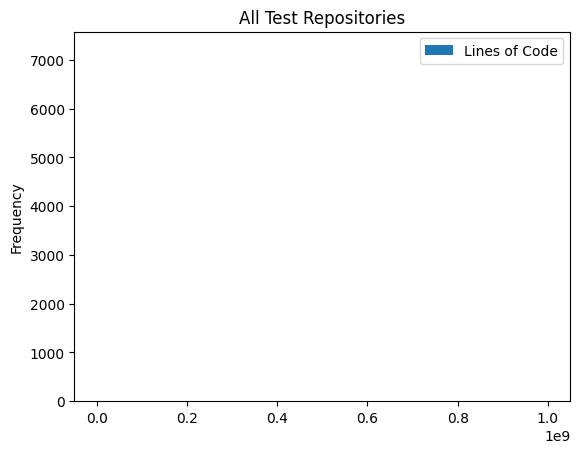

In [18]:
print(len(all_repos))
loc_binning(all_repos, title="All Test Repositories", kloc = int(1e6))

9520


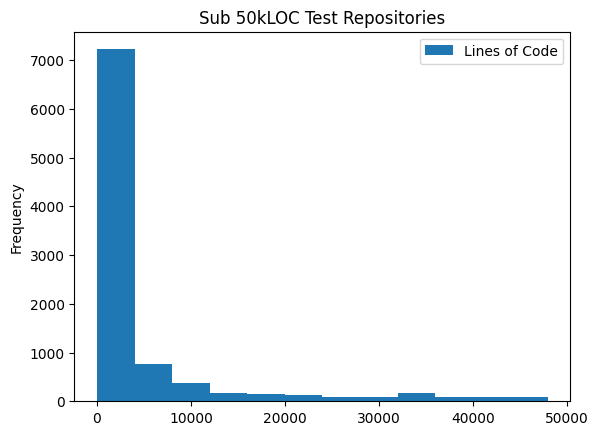

In [19]:
print(len(test_repos))
loc_binning(test_repos, title="Sub 50kLOC Test Repositories")

In [16]:
import operator

def count_repo_annots(repo: GitRepo) -> tuple[GitRepo, dict] | None:
    try:
        annotations = repo.collect_annotations(DATA_FOLDER)
        if repo.n_type_annots / rep.lines_of_code > 0.05:
            return repo, annotations
    except Exception:
        logger.warning(f"Failed to count annotations for {repo.name}")
        return None

In [17]:
from concurrent.futures import ProcessPoolExecutor, as_completed

with ProcessPoolExecutor(max_workers=8) as executor:
    fs = [executor.submit(count_repo_annots, r) for r in small_repos]
    repo2annotations = [f.result() for f in tqdm(as_completed(fs), total=len(fs))]

repo2annotations: list[tuple[CDT4PyRepo, dict]] = [r for r in repo2annotations if r is not None]
useful_repos: list[CDT4PyRepo] = list(map(operator.itemgetter(0), repo2annotations))

logger.info(
    f"{len(useful_repos)}/{len(small_repos)} repos are parsable, have enough portions of type annotations"
)

del repo2annotations

  0%|          | 0/9520 [00:00<?, ?it/s]

2023-08-09 15:41:03,207 | WARNING : Failed to count annotations for SeldonIO-seldon-core


2023-08-09 15:41:03,974 | WARNING : Failed to count annotations for robotwedding


2023-08-09 15:41:07,903 | WARNING : Failed to count annotations for BigData


2023-08-09 15:41:25,110 | WARNING : Failed to count annotations for testLeCo


2023-08-09 15:41:25,667 | WARNING : Failed to count annotations for abtco


2023-08-09 15:41:26,593 | WARNING : Failed to count annotations for retouch


2023-08-09 15:41:30,111 | WARNING : Failed to count annotations for ros


2023-08-09 15:41:31,392 | WARNING : Failed to count annotations for rhasspy


2023-08-09 15:42:01,895 | WARNING : Failed to count annotations for TY-Final-Project


2023-08-09 15:42:32,729 | WARNING : Failed to count annotations for advanced-python-development


2023-08-09 15:42:34,066 | WARNING : Failed to count annotations for python_aug_2018


2023-08-09 15:42:36,899 | WARNING : Failed to count annotations for xmind-telegram


2023-08-09 15:42:55,175 | WARNING : Failed to count annotations for Cursos


2023-08-09 15:42:55,540 | WARNING : Failed to count annotations for unsw_course_filter


2023-08-09 15:42:56,746 | WARNING : Failed to count annotations for BESI-Digital_Relays


2023-08-09 15:43:01,138 | WARNING : Failed to count annotations for d2w_mini_projects


2023-08-09 15:43:09,611 | WARNING : Failed to count annotations for rhizome


2023-08-09 15:43:16,593 | WARNING : Failed to count annotations for acoustid-server


2023-08-09 15:43:17,512 | WARNING : Failed to count annotations for MleightAlgorithmsAnalysis


2023-08-09 15:43:27,015 | WARNING : Failed to count annotations for ai_interview


2023-08-09 15:43:36,306 | WARNING : Failed to count annotations for Bitcon_Price_API_Consumer


2023-08-09 15:43:37,740 | WARNING : Failed to count annotations for video_reuse_detector


2023-08-09 15:43:39,928 | WARNING : Failed to count annotations for home-security-system


2023-08-09 15:43:48,934 | WARNING : Failed to count annotations for lms


2023-08-09 15:43:50,463 | WARNING : Failed to count annotations for kubeflow_examples


2023-08-09 15:43:53,688 | WARNING : Failed to count annotations for heirloom


2023-08-09 15:44:02,212 | WARNING : Failed to count annotations for full-stack-deep-learning-bootcamp-project


2023-08-09 15:44:07,729 | WARNING : Failed to count annotations for airflow-playground


2023-08-09 15:44:15,490 | WARNING : Failed to count annotations for freqtrade_2020_tcc


2023-08-09 15:44:31,271 | WARNING : Failed to count annotations for lightning


2023-08-09 15:44:36,233 | WARNING : Failed to count annotations for we-carrot-app


2023-08-09 15:44:36,807 | WARNING : Failed to count annotations for tab-vcr


2023-08-09 15:44:48,874 | WARNING : Failed to count annotations for bcs-course


2023-08-09 15:44:48,903 | WARNING : Failed to count annotations for cs-course


2023-08-09 15:44:48,995 | WARNING : Failed to count annotations for lansync


2023-08-09 15:45:48,606 | WARNING : Failed to count annotations for studenceServer


2023-08-09 15:45:52,123 | WARNING : Failed to count annotations for bitplaning-and-thresholding


2023-08-09 15:45:54,923 | WARNING : Failed to count annotations for cookiecutter-flask


2023-08-09 15:45:56,839 | WARNING : Failed to count annotations for live-de-python


2023-08-09 15:46:11,725 | WARNING : Failed to count annotations for seldon-core


2023-08-09 15:46:14,302 | WARNING : Failed to count annotations for Autonav


2023-08-09 15:46:16,734 | WARNING : Failed to count annotations for misc


2023-08-09 15:46:39,763 | WARNING : Failed to count annotations for 20191021ENMAX


2023-08-09 15:46:39,929 | WARNING : Failed to count annotations for 20181205pratt


2023-08-09 15:46:40,203 | WARNING : Failed to count annotations for 20200316ZEPG


2023-08-09 15:46:41,760 | WARNING : Failed to count annotations for 20200323py3netsys


2023-08-09 15:46:44,033 | WARNING : Failed to count annotations for unc-workspace


2023-08-09 15:47:13,929 | WARNING : Failed to count annotations for sslme


2023-08-09 15:47:16,027 | WARNING : Failed to count annotations for flask_calendar


2023-08-09 15:47:16,201 | WARNING : Failed to count annotations for dmlauto


2023-08-09 15:47:16,702 | WARNING : Failed to count annotations for Blogg


2023-08-09 15:47:20,633 | WARNING : Failed to count annotations for Neural-Image-Caption-Chainer


2023-08-09 15:48:00,430 | WARNING : Failed to count annotations for XivDbWeb


2023-08-09 15:48:11,011 | WARNING : Failed to count annotations for WearHacksWebApp17


2023-08-09 15:48:29,440 | WARNING : Failed to count annotations for Bartendertron3000


2023-08-09 15:49:10,913 | WARNING : Failed to count annotations for Py3Demo


2023-08-09 15:49:14,688 | WARNING : Failed to count annotations for anki


2023-08-09 15:49:24,355 | WARNING : Failed to count annotations for causai


2023-08-09 15:49:25,398 | WARNING : Failed to count annotations for ml-production-template


2023-08-09 15:49:26,873 | WARNING : Failed to count annotations for Independent-Study


2023-08-09 15:49:50,247 | WARNING : Failed to count annotations for vscode-python


2023-08-09 15:49:52,202 | WARNING : Failed to count annotations for traffic-density-classification_web-app


2023-08-09 15:50:00,048 | WARNING : Failed to count annotations for eduid-webapp


2023-08-09 15:50:07,853 | WARNING : Failed to count annotations for netclock


2023-08-09 15:50:28,602 | WARNING : Failed to count annotations for visual_commonsense_reasoning


2023-08-09 15:50:39,282 | WARNING : Failed to count annotations for lightbus


2023-08-09 15:50:43,943 | WARNING : Failed to count annotations for web_mk


2023-08-09 15:50:43,956 | WARNING : Failed to count annotations for vamonos


2023-08-09 15:50:45,233 | WARNING : Failed to count annotations for ciandt-hackathon-g4


2023-08-09 15:50:45,351 | WARNING : Failed to count annotations for ciandt-hackathon-g5


2023-08-09 15:50:45,474 | WARNING : Failed to count annotations for ciandt-hackathon-g2


2023-08-09 15:50:45,657 | WARNING : Failed to count annotations for ciandt-hackathon-g3


2023-08-09 15:50:47,816 | WARNING : Failed to count annotations for python_katas


2023-08-09 15:50:49,375 | WARNING : Failed to count annotations for CKRM_TCSVT2020


2023-08-09 15:50:57,409 | WARNING : Failed to count annotations for lint-review


2023-08-09 15:50:59,156 | WARNING : Failed to count annotations for Aflux-backend


2023-08-09 15:51:03,404 | WARNING : Failed to count annotations for play-with-vcr


2023-08-09 15:51:27,803 | WARNING : Failed to count annotations for allennlp-reading-comprehension


2023-08-09 15:51:29,142 | WARNING : Failed to count annotations for Juliet


2023-08-09 15:51:37,191 | WARNING : Failed to count annotations for flask-sqlalchemy-cookiecutter-template


2023-08-09 15:51:53,526 | WARNING : Failed to count annotations for vscode-python


2023-08-09 15:51:54,877 | WARNING : Failed to count annotations for lightning


2023-08-09 15:51:55,740 | WARNING : Failed to count annotations for webhook-router


2023-08-09 15:51:56,161 | WARNING : Failed to count annotations for Diego_Aldunate


2023-08-09 15:52:06,327 | WARNING : Failed to count annotations for python-resource-inventory


2023-08-09 15:52:06,457 | WARNING : Failed to count annotations for Server-Web


2023-08-09 15:52:11,230 | WARNING : Failed to count annotations for NewRover


2023-08-09 15:52:42,379 | WARNING : Failed to count annotations for exercises_python


2023-08-09 15:52:55,767 | WARNING : Failed to count annotations for devnet_training


2023-08-09 15:53:00,081 | WARNING : Failed to count annotations for pokerPlamTFG


2023-08-09 15:53:00,960 | WARNING : Failed to count annotations for 19-5-Flask-Boggle


2023-08-09 15:53:02,625 | WARNING : Failed to count annotations for neuralmonkey-experiments


2023-08-09 15:53:07,074 | WARNING : Failed to count annotations for devCenter


2023-08-09 15:53:19,590 | WARNING : Failed to count annotations for book-club


2023-08-09 15:53:22,004 | WARNING : Failed to count annotations for DATA_COMMUNICATIONS_Final_Project


2023-08-09 15:53:23,720 | WARNING : Failed to count annotations for vcr


2023-08-09 15:53:35,417 | WARNING : Failed to count annotations for UBA


2023-08-09 15:54:05,209 | WARNING : Failed to count annotations for tennisCourt


2023-08-09 15:54:09,112 | WARNING : Failed to count annotations for mis2


2023-08-09 15:54:14,917 | WARNING : Failed to count annotations for docker-airflow


2023-08-09 15:54:19,494 | WARNING : Failed to count annotations for aws-lambda-playground


2023-08-09 15:54:26,289 | WARNING : Failed to count annotations for Coronavirusmodel


2023-08-09 15:54:27,676 | WARNING : Failed to count annotations for munidash


2023-08-09 15:54:35,340 | WARNING : Failed to count annotations for video_manager


2023-08-09 15:54:41,697 | WARNING : Failed to count annotations for Portfo


2023-08-09 15:54:49,972 | WARNING : Failed to count annotations for r2c


2023-08-09 15:54:53,113 | WARNING : Failed to count annotations for swagaf


2023-08-09 15:55:01,208 | WARNING : Failed to count annotations for anki


2023-08-09 15:55:13,287 | WARNING : Failed to count annotations for anfisa


2023-08-09 15:55:18,973 | WARNING : Failed to count annotations for MultiShop-API


2023-08-09 15:55:23,212 | WARNING : Failed to count annotations for python3-new-feature


2023-08-09 15:55:42,207 | WARNING : Failed to count annotations for lint-review


2023-08-09 15:55:59,020 | WARNING : Failed to count annotations for Recursion


2023-08-09 15:56:09,051 | WARNING : Failed to count annotations for python3-new-feature


2023-08-09 15:56:22,228 | WARNING : Failed to count annotations for flask-template


2023-08-09 15:56:30,392 | WARNING : Failed to count annotations for tank_robot


2023-08-09 15:56:31,003 | WARNING : Failed to count annotations for stk


2023-08-09 15:57:33,767 | WARNING : Failed to count annotations for opensource


2023-08-09 15:57:36,629 | WARNING : Failed to count annotations for aggregator


2023-08-09 15:57:37,400 | WARNING : Failed to count annotations for Princetonpy-Jupyter-Workshop


2023-08-09 15:57:37,797 | WARNING : Failed to count annotations for Juliet


2023-08-09 15:57:54,472 | WARNING : Failed to count annotations for algobot-new


2023-08-09 15:58:09,239 | WARNING : Failed to count annotations for OBQA


2023-08-09 15:58:09,546 | WARNING : Failed to count annotations for learn


2023-08-09 15:58:10,152 | WARNING : Failed to count annotations for CasseroleDiscordBotPublic


2023-08-09 15:58:24,804 | WARNING : Failed to count annotations for talk-write-more-decorators-and-fewer-classes


2023-08-09 15:58:42,299 | WARNING : Failed to count annotations for resume-html


2023-08-09 15:58:46,438 | WARNING : Failed to count annotations for release-services


2023-08-09 15:59:00,844 | WARNING : Failed to count annotations for Python-Baitap


2023-08-09 15:59:06,057 | WARNING : Failed to count annotations for seldon-core


2023-08-09 15:59:07,298 | WARNING : Failed to count annotations for CryptoSolve


2023-08-09 15:59:11,885 | WARNING : Failed to count annotations for harmony


2023-08-09 15:59:23,350 | WARNING : Failed to count annotations for seldon-core


2023-08-09 15:59:24,026 | WARNING : Failed to count annotations for release-services


2023-08-09 15:59:37,613 | WARNING : Failed to count annotations for algo


2023-08-09 15:59:38,911 | WARNING : Failed to count annotations for airflow-materials


2023-08-09 15:59:39,852 | WARNING : Failed to count annotations for Pythagorean-Bare-Collection


2023-08-09 15:59:53,944 | WARNING : Failed to count annotations for Coinlist-NuCypher-Hackathon


2023-08-09 15:59:56,297 | WARNING : Failed to count annotations for advent


2023-08-09 15:59:58,140 | WARNING : Failed to count annotations for challenges


2023-08-09 16:00:09,376 | WARNING : Failed to count annotations for GrowGreens


2023-08-09 16:00:13,295 | WARNING : Failed to count annotations for anki


2023-08-09 16:00:52,676 | WARNING : Failed to count annotations for TIL


2023-08-09 16:00:59,574 | WARNING : Failed to count annotations for rest-flask-cookiecutter


2023-08-09 16:01:03,180 | WARNING : Failed to count annotations for Design


2023-08-09 16:01:03,369 | WARNING : Failed to count annotations for python-samples


2023-08-09 16:01:05,478 | WARNING : Failed to count annotations for Courses


2023-08-09 16:01:05,612 | WARNING : Failed to count annotations for cohort3


2023-08-09 16:01:07,840 | WARNING : Failed to count annotations for Ladakh_Pis


2023-08-09 16:01:09,669 | WARNING : Failed to count annotations for WinPython


2023-08-09 16:01:14,937 | WARNING : Failed to count annotations for alerta


2023-08-09 16:01:18,283 | WARNING : Failed to count annotations for dukes-archives


2023-08-09 16:01:19,052 | WARNING : Failed to count annotations for neuralmonkey


2023-08-09 16:02:10,978 | WARNING : Failed to count annotations for kaggle


2023-08-09 16:02:12,717 | WARNING : Failed to count annotations for radio_monitor


2023-08-09 16:02:14,389 | WARNING : Failed to count annotations for thoughtinator


2023-08-09 16:02:25,294 | WARNING : Failed to count annotations for deepstate-test-suite


2023-08-09 16:02:27,317 | WARNING : Failed to count annotations for bashrc


2023-08-09 16:02:28,937 | WARNING : Failed to count annotations for HKN-Bull


2023-08-09 16:02:29,300 | WARNING : Failed to count annotations for Kanmail


2023-08-09 16:02:30,510 | WARNING : Failed to count annotations for fabric


2023-08-09 16:02:38,056 | WARNING : Failed to count annotations for neuralnet


2023-08-09 16:02:38,849 | WARNING : Failed to count annotations for hb-project-shelve-it


2023-08-09 16:02:39,380 | WARNING : Failed to count annotations for Learn.Python


2023-08-09 16:02:43,492 | WARNING : Failed to count annotations for yachtsyachtsyachts


2023-08-09 16:03:44,275 | WARNING : Failed to count annotations for narf.pl


2023-08-09 16:04:02,207 | WARNING : Failed to count annotations for assemblies


2023-08-09 16:04:11,954 | WARNING : Failed to count annotations for OperatingSystemLearning


2023-08-09 16:04:22,681 | WARNING : Failed to count annotations for thisismdp


2023-08-09 16:04:47,644 | WARNING : Failed to count annotations for tweeton


2023-08-09 16:04:54,054 | WARNING : Failed to count annotations for Boxes_for_Joint_hierarchy_AKBC_2020


2023-08-09 16:05:19,252 | WARNING : Failed to count annotations for bird


2023-08-09 16:05:19,576 | WARNING : Failed to count annotations for py3-basics


2023-08-09 16:05:38,035 | WARNING : Failed to count annotations for flask-api-cookiecutter


2023-08-09 16:07:02,589 | WARNING : Failed to count annotations for SeldonIO-seldon-core


2023-08-09 16:07:03,180 | WARNING : Failed to count annotations for robotwedding


2023-08-09 16:07:11,831 | WARNING : Failed to count annotations for abtco


2023-08-09 16:07:13,901 | WARNING : Failed to count annotations for retouch


2023-08-09 16:07:15,325 | WARNING : Failed to count annotations for ros


2023-08-09 16:07:27,404 | WARNING : Failed to count annotations for TY-Final-Project


2023-08-09 16:07:42,939 | WARNING : Failed to count annotations for advanced-python-development


2023-08-09 16:07:46,331 | WARNING : Failed to count annotations for BESI-Digital_Relays


2023-08-09 16:07:58,140 | WARNING : Failed to count annotations for MleightAlgorithmsAnalysis


2023-08-09 16:08:03,391 | WARNING : Failed to count annotations for ai_interview


2023-08-09 16:08:09,857 | WARNING : Failed to count annotations for video_reuse_detector


2023-08-09 16:08:12,251 | WARNING : Failed to count annotations for home-security-system


2023-08-09 16:08:18,845 | WARNING : Failed to count annotations for kubeflow_examples


2023-08-09 16:08:21,844 | WARNING : Failed to count annotations for lms


2023-08-09 16:08:25,117 | WARNING : Failed to count annotations for full-stack-deep-learning-bootcamp-project


2023-08-09 16:08:25,923 | WARNING : Failed to count annotations for airflow-playground


2023-08-09 16:08:52,752 | WARNING : Failed to count annotations for tab-vcr


2023-08-09 16:08:59,136 | WARNING : Failed to count annotations for bcs-course


2023-08-09 16:08:59,139 | WARNING : Failed to count annotations for cs-course


2023-08-09 16:09:05,099 | WARNING : Failed to count annotations for freqtrade_2020_tcc


2023-08-09 16:09:38,767 | WARNING : Failed to count annotations for studenceServer


2023-08-09 16:09:42,858 | WARNING : Failed to count annotations for bitplaning-and-thresholding


2023-08-09 16:09:50,391 | WARNING : Failed to count annotations for seldon-core


2023-08-09 16:09:52,178 | WARNING : Failed to count annotations for Autonav


2023-08-09 16:09:56,932 | WARNING : Failed to count annotations for misc


2023-08-09 16:10:09,777 | WARNING : Failed to count annotations for 20191021ENMAX


2023-08-09 16:10:13,022 | WARNING : Failed to count annotations for 20200316ZEPG


2023-08-09 16:10:13,297 | WARNING : Failed to count annotations for 20181205pratt


2023-08-09 16:10:14,833 | WARNING : Failed to count annotations for 20200323py3netsys


2023-08-09 16:10:14,961 | WARNING : Failed to count annotations for unc-workspace


2023-08-09 16:10:29,192 | WARNING : Failed to count annotations for Blogg


2023-08-09 16:10:30,740 | WARNING : Failed to count annotations for Neural-Image-Caption-Chainer


2023-08-09 16:11:20,140 | WARNING : Failed to count annotations for Bartendertron3000


2023-08-09 16:11:45,906 | WARNING : Failed to count annotations for Py3Demo


2023-08-09 16:11:51,911 | WARNING : Failed to count annotations for Independent-Study


2023-08-09 16:11:53,859 | WARNING : Failed to count annotations for causai


2023-08-09 16:11:55,776 | WARNING : Failed to count annotations for ml-production-template


2023-08-09 16:12:06,596 | WARNING : Failed to count annotations for vscode-python


2023-08-09 16:12:13,907 | WARNING : Failed to count annotations for traffic-density-classification_web-app


2023-08-09 16:12:29,566 | WARNING : Failed to count annotations for visual_commonsense_reasoning


2023-08-09 16:12:42,111 | WARNING : Failed to count annotations for ciandt-hackathon-g4


2023-08-09 16:12:42,135 | WARNING : Failed to count annotations for ciandt-hackathon-g5


2023-08-09 16:12:42,222 | WARNING : Failed to count annotations for ciandt-hackathon-g2


2023-08-09 16:12:42,271 | WARNING : Failed to count annotations for ciandt-hackathon-g3


2023-08-09 16:12:42,449 | WARNING : Failed to count annotations for web_mk


2023-08-09 16:12:43,117 | WARNING : Failed to count annotations for CKRM_TCSVT2020


2023-08-09 16:12:49,486 | WARNING : Failed to count annotations for play-with-vcr


2023-08-09 16:12:59,502 | WARNING : Failed to count annotations for Juliet


2023-08-09 16:13:14,168 | WARNING : Failed to count annotations for vscode-python


2023-08-09 16:13:15,422 | WARNING : Failed to count annotations for Diego_Aldunate


2023-08-09 16:13:22,724 | WARNING : Failed to count annotations for python-resource-inventory


2023-08-09 16:13:24,244 | WARNING : Failed to count annotations for NewRover


2023-08-09 16:13:28,351 | WARNING : Failed to count annotations for allennlp-reading-comprehension


2023-08-09 16:13:49,663 | WARNING : Failed to count annotations for neuralmonkey-experiments


2023-08-09 16:13:52,737 | WARNING : Failed to count annotations for DATA_COMMUNICATIONS_Final_Project


2023-08-09 16:13:53,489 | WARNING : Failed to count annotations for vcr


2023-08-09 16:14:01,176 | WARNING : Failed to count annotations for UBA


2023-08-09 16:14:15,259 | WARNING : Failed to count annotations for tennisCourt


2023-08-09 16:14:15,468 | WARNING : Failed to count annotations for mis2


2023-08-09 16:14:18,909 | WARNING : Failed to count annotations for docker-airflow


2023-08-09 16:14:23,779 | WARNING : Failed to count annotations for Coronavirusmodel


2023-08-09 16:14:29,870 | WARNING : Failed to count annotations for Portfo


2023-08-09 16:14:32,458 | WARNING : Failed to count annotations for r2c


2023-08-09 16:14:35,437 | WARNING : Failed to count annotations for swagaf


2023-08-09 16:15:41,626 | WARNING : Failed to count annotations for tank_robot


2023-08-09 16:15:42,069 | WARNING : Failed to count annotations for stk


2023-08-09 16:15:46,076 | WARNING : Failed to count annotations for Princetonpy-Jupyter-Workshop


2023-08-09 16:15:46,195 | WARNING : Failed to count annotations for Juliet


2023-08-09 16:15:51,132 | WARNING : Failed to count annotations for algobot-new


2023-08-09 16:16:00,176 | WARNING : Failed to count annotations for learn


2023-08-09 16:16:04,230 | WARNING : Failed to count annotations for CasseroleDiscordBotPublic


2023-08-09 16:16:05,089 | WARNING : Failed to count annotations for OBQA


2023-08-09 16:16:39,668 | WARNING : Failed to count annotations for Python-Baitap


2023-08-09 16:16:44,861 | WARNING : Failed to count annotations for seldon-core


2023-08-09 16:16:45,589 | WARNING : Failed to count annotations for CryptoSolve


2023-08-09 16:16:47,789 | WARNING : Failed to count annotations for seldon-core


2023-08-09 16:16:58,245 | WARNING : Failed to count annotations for algo


2023-08-09 16:16:58,789 | WARNING : Failed to count annotations for Pythagorean-Bare-Collection


2023-08-09 16:16:58,912 | WARNING : Failed to count annotations for airflow-materials


2023-08-09 16:17:20,822 | WARNING : Failed to count annotations for GrowGreens


2023-08-09 16:17:56,106 | WARNING : Failed to count annotations for TIL


2023-08-09 16:18:03,901 | WARNING : Failed to count annotations for Design


2023-08-09 16:18:06,663 | WARNING : Failed to count annotations for Ladakh_Pis


2023-08-09 16:18:10,248 | WARNING : Failed to count annotations for dukes-archives


2023-08-09 16:18:10,877 | WARNING : Failed to count annotations for WinPython


2023-08-09 16:18:11,025 | WARNING : Failed to count annotations for neuralmonkey


2023-08-09 16:18:40,289 | WARNING : Failed to count annotations for kaggle


2023-08-09 16:18:40,777 | WARNING : Failed to count annotations for radio_monitor


2023-08-09 16:18:41,781 | WARNING : Failed to count annotations for thoughtinator


2023-08-09 16:18:45,744 | WARNING : Failed to count annotations for bashrc


2023-08-09 16:18:48,178 | WARNING : Failed to count annotations for HKN-Bull


2023-08-09 16:18:49,214 | WARNING : Failed to count annotations for fabric


2023-08-09 16:18:51,386 | WARNING : Failed to count annotations for hb-project-shelve-it


2023-08-09 16:18:51,995 | WARNING : Failed to count annotations for neuralnet


2023-08-09 16:20:01,721 | WARNING : Failed to count annotations for assemblies


2023-08-09 16:20:05,735 | WARNING : Failed to count annotations for thisismdp


2023-08-09 16:20:10,616 | WARNING : Failed to count annotations for tweeton


2023-08-09 16:20:15,030 | WARNING : Failed to count annotations for Boxes_for_Joint_hierarchy_AKBC_2020


2023-08-09 16:20:28,463 | WARNING : Failed to count annotations for bird


2023-08-09 16:20:38,329 | WARNING : Failed to count annotations for py3-basics


2023-08-09 16:21:36,789 | WARNING : Failed to count annotations for SeldonIO-seldon-core


2023-08-09 16:21:37,905 | WARNING : Failed to count annotations for robotwedding


2023-08-09 16:21:48,656 | WARNING : Failed to count annotations for abtco


2023-08-09 16:21:52,215 | WARNING : Failed to count annotations for retouch


2023-08-09 16:21:54,484 | WARNING : Failed to count annotations for ros


2023-08-09 16:22:06,318 | WARNING : Failed to count annotations for TY-Final-Project


2023-08-09 16:22:26,631 | WARNING : Failed to count annotations for BESI-Digital_Relays


2023-08-09 16:22:32,259 | WARNING : Failed to count annotations for advanced-python-development


2023-08-09 16:22:40,504 | WARNING : Failed to count annotations for MleightAlgorithmsAnalysis


2023-08-09 16:22:47,934 | WARNING : Failed to count annotations for ai_interview


2023-08-09 16:22:51,052 | WARNING : Failed to count annotations for video_reuse_detector


2023-08-09 16:22:54,935 | WARNING : Failed to count annotations for home-security-system


2023-08-09 16:22:59,252 | WARNING : Failed to count annotations for lms


2023-08-09 16:23:06,929 | WARNING : Failed to count annotations for kubeflow_examples


2023-08-09 16:23:10,150 | WARNING : Failed to count annotations for full-stack-deep-learning-bootcamp-project


2023-08-09 16:23:11,048 | WARNING : Failed to count annotations for airflow-playground


2023-08-09 16:23:30,428 | WARNING : Failed to count annotations for tab-vcr


2023-08-09 16:23:36,462 | WARNING : Failed to count annotations for freqtrade_2020_tcc


2023-08-09 16:23:37,321 | WARNING : Failed to count annotations for bcs-course


2023-08-09 16:23:37,341 | WARNING : Failed to count annotations for cs-course


2023-08-09 16:24:23,615 | WARNING : Failed to count annotations for bitplaning-and-thresholding


2023-08-09 16:24:25,222 | WARNING : Failed to count annotations for studenceServer


2023-08-09 16:24:31,376 | WARNING : Failed to count annotations for seldon-core


2023-08-09 16:24:32,458 | WARNING : Failed to count annotations for Autonav


2023-08-09 16:24:34,003 | WARNING : Failed to count annotations for misc


2023-08-09 16:24:55,501 | WARNING : Failed to count annotations for 20200316ZEPG


2023-08-09 16:24:55,784 | WARNING : Failed to count annotations for 20181205pratt


2023-08-09 16:24:56,977 | WARNING : Failed to count annotations for unc-workspace


2023-08-09 16:24:57,187 | WARNING : Failed to count annotations for 20191021ENMAX


2023-08-09 16:24:57,855 | WARNING : Failed to count annotations for 20200323py3netsys


2023-08-09 16:25:11,589 | WARNING : Failed to count annotations for Blogg


2023-08-09 16:25:13,906 | WARNING : Failed to count annotations for Neural-Image-Caption-Chainer


2023-08-09 16:26:02,075 | WARNING : Failed to count annotations for Bartendertron3000


2023-08-09 16:26:30,079 | WARNING : Failed to count annotations for Py3Demo


2023-08-09 16:26:32,115 | WARNING : Failed to count annotations for causai


2023-08-09 16:26:32,731 | WARNING : Failed to count annotations for Independent-Study


2023-08-09 16:26:33,170 | WARNING : Failed to count annotations for ml-production-template


2023-08-09 16:26:48,180 | WARNING : Failed to count annotations for vscode-python


2023-08-09 16:26:50,823 | WARNING : Failed to count annotations for traffic-density-classification_web-app


2023-08-09 16:27:12,180 | WARNING : Failed to count annotations for visual_commonsense_reasoning


2023-08-09 16:27:22,257 | WARNING : Failed to count annotations for web_mk


2023-08-09 16:27:22,387 | WARNING : Failed to count annotations for ciandt-hackathon-g4


2023-08-09 16:27:22,502 | WARNING : Failed to count annotations for ciandt-hackathon-g5


2023-08-09 16:27:22,634 | WARNING : Failed to count annotations for ciandt-hackathon-g2


2023-08-09 16:27:22,640 | WARNING : Failed to count annotations for ciandt-hackathon-g3


2023-08-09 16:27:24,059 | WARNING : Failed to count annotations for CKRM_TCSVT2020


2023-08-09 16:27:28,513 | WARNING : Failed to count annotations for play-with-vcr


2023-08-09 16:27:38,762 | WARNING : Failed to count annotations for Juliet


2023-08-09 16:27:49,529 | WARNING : Failed to count annotations for allennlp-reading-comprehension


2023-08-09 16:27:54,653 | WARNING : Failed to count annotations for vscode-python


2023-08-09 16:27:56,664 | WARNING : Failed to count annotations for Diego_Aldunate


2023-08-09 16:28:02,285 | WARNING : Failed to count annotations for python-resource-inventory


2023-08-09 16:28:05,977 | WARNING : Failed to count annotations for NewRover


2023-08-09 16:28:30,107 | WARNING : Failed to count annotations for neuralmonkey-experiments


2023-08-09 16:28:33,236 | WARNING : Failed to count annotations for DATA_COMMUNICATIONS_Final_Project


2023-08-09 16:28:34,692 | WARNING : Failed to count annotations for vcr


2023-08-09 16:28:41,435 | WARNING : Failed to count annotations for UBA


2023-08-09 16:28:56,587 | WARNING : Failed to count annotations for tennisCourt


2023-08-09 16:28:56,698 | WARNING : Failed to count annotations for mis2


2023-08-09 16:28:59,555 | WARNING : Failed to count annotations for docker-airflow


2023-08-09 16:29:01,782 | WARNING : Failed to count annotations for Coronavirusmodel


2023-08-09 16:29:05,056 | WARNING : Failed to count annotations for Portfo


2023-08-09 16:29:07,740 | WARNING : Failed to count annotations for r2c


2023-08-09 16:29:10,297 | WARNING : Failed to count annotations for swagaf


2023-08-09 16:30:20,242 | WARNING : Failed to count annotations for tank_robot


2023-08-09 16:30:20,479 | WARNING : Failed to count annotations for stk


2023-08-09 16:30:27,107 | WARNING : Failed to count annotations for Princetonpy-Jupyter-Workshop


2023-08-09 16:30:27,746 | WARNING : Failed to count annotations for Juliet


2023-08-09 16:30:32,728 | WARNING : Failed to count annotations for algobot-new


2023-08-09 16:30:47,181 | WARNING : Failed to count annotations for OBQA


2023-08-09 16:30:47,193 | WARNING : Failed to count annotations for CasseroleDiscordBotPublic


2023-08-09 16:30:49,705 | WARNING : Failed to count annotations for learn


2023-08-09 16:31:15,169 | WARNING : Failed to count annotations for Python-Baitap


2023-08-09 16:31:18,743 | WARNING : Failed to count annotations for seldon-core


2023-08-09 16:31:19,792 | WARNING : Failed to count annotations for CryptoSolve


2023-08-09 16:31:26,313 | WARNING : Failed to count annotations for seldon-core


2023-08-09 16:31:34,029 | WARNING : Failed to count annotations for airflow-materials


2023-08-09 16:31:34,104 | WARNING : Failed to count annotations for Pythagorean-Bare-Collection


2023-08-09 16:31:36,128 | WARNING : Failed to count annotations for algo


2023-08-09 16:32:04,521 | WARNING : Failed to count annotations for GrowGreens


2023-08-09 16:32:31,314 | WARNING : Failed to count annotations for TIL


2023-08-09 16:32:40,895 | WARNING : Failed to count annotations for Design


2023-08-09 16:32:44,016 | WARNING : Failed to count annotations for WinPython


2023-08-09 16:32:45,337 | WARNING : Failed to count annotations for Ladakh_Pis


2023-08-09 16:32:47,748 | WARNING : Failed to count annotations for dukes-archives


2023-08-09 16:32:48,575 | WARNING : Failed to count annotations for neuralmonkey


2023-08-09 16:33:20,250 | WARNING : Failed to count annotations for kaggle


2023-08-09 16:33:20,920 | WARNING : Failed to count annotations for radio_monitor


2023-08-09 16:33:21,457 | WARNING : Failed to count annotations for thoughtinator


2023-08-09 16:33:29,208 | WARNING : Failed to count annotations for HKN-Bull


2023-08-09 16:33:31,050 | WARNING : Failed to count annotations for fabric


2023-08-09 16:33:34,106 | WARNING : Failed to count annotations for neuralnet


2023-08-09 16:33:35,084 | WARNING : Failed to count annotations for hb-project-shelve-it


2023-08-09 16:34:33,378 | WARNING : Failed to count annotations for assemblies


2023-08-09 16:34:52,317 | WARNING : Failed to count annotations for thisismdp


2023-08-09 16:34:57,632 | WARNING : Failed to count annotations for tweeton


2023-08-09 16:35:03,023 | WARNING : Failed to count annotations for Boxes_for_Joint_hierarchy_AKBC_2020


2023-08-09 16:35:14,284 | WARNING : Failed to count annotations for py3-basics


2023-08-09 16:35:17,865 | WARNING : Failed to count annotations for bird


2023-08-09 16:36:14,689 | WARNING : Failed to count annotations for streamlit


2023-08-09 16:36:16,150 | WARNING : Failed to count annotations for frewpy


2023-08-09 16:36:50,104 | WARNING : Failed to count annotations for SeldonIO-seldon-core


2023-08-09 16:36:51,522 | WARNING : Failed to count annotations for BootCamp2


2023-08-09 16:36:52,850 | WARNING : Failed to count annotations for robotwedding


2023-08-09 16:36:54,085 | WARNING : Failed to count annotations for logflow


2023-08-09 16:37:18,269 | WARNING : Failed to count annotations for abtco


2023-08-09 16:37:24,050 | WARNING : Failed to count annotations for ros


2023-08-09 16:37:24,456 | WARNING : Failed to count annotations for retouch


2023-08-09 16:37:35,263 | WARNING : Failed to count annotations for pytest


2023-08-09 16:37:37,521 | WARNING : Failed to count annotations for d2


2023-08-09 16:37:45,446 | WARNING : Failed to count annotations for AoC2018


2023-08-09 16:37:49,217 | WARNING : Failed to count annotations for TY-Final-Project


2023-08-09 16:38:02,131 | WARNING : Failed to count annotations for advanced-python-development


2023-08-09 16:38:03,994 | WARNING : Failed to count annotations for Python


2023-08-09 16:38:09,527 | WARNING : Failed to count annotations for python-code


2023-08-09 16:38:25,081 | WARNING : Failed to count annotations for math


2023-08-09 16:38:28,525 | WARNING : Failed to count annotations for Python-Algorithms


2023-08-09 16:38:28,690 | WARNING : Failed to count annotations for Python-The-Algorithms


2023-08-09 16:38:28,890 | WARNING : Failed to count annotations for TheAlgorithmsPython


2023-08-09 16:38:54,460 | WARNING : Failed to count annotations for Python


2023-08-09 16:39:13,564 | WARNING : Failed to count annotations for BESI-Digital_Relays


2023-08-09 16:39:46,723 | WARNING : Failed to count annotations for Python-Class


2023-08-09 16:39:49,964 | WARNING : Failed to count annotations for MleightAlgorithmsAnalysis


2023-08-09 16:40:01,447 | WARNING : Failed to count annotations for ai_interview


2023-08-09 16:40:17,721 | WARNING : Failed to count annotations for kubeflow_examples


2023-08-09 16:40:20,633 | WARNING : Failed to count annotations for BootCamp2


2023-08-09 16:40:28,301 | WARNING : Failed to count annotations for mamp-cli


2023-08-09 16:40:29,575 | WARNING : Failed to count annotations for CompetitiveProgramming


2023-08-09 16:40:37,673 | WARNING : Failed to count annotations for video_reuse_detector


2023-08-09 16:40:48,956 | WARNING : Failed to count annotations for home-security-system


2023-08-09 16:41:11,781 | WARNING : Failed to count annotations for SFUPython_01


2023-08-09 16:41:15,786 | WARNING : Failed to count annotations for lms


2023-08-09 16:41:17,300 | WARNING : Failed to count annotations for prometeo


2023-08-09 16:41:40,360 | WARNING : Failed to count annotations for awesome-streamlit


2023-08-09 16:41:43,226 | WARNING : Failed to count annotations for full-stack-deep-learning-bootcamp-project


2023-08-09 16:41:51,596 | WARNING : Failed to count annotations for freqtrade_2020_tcc


2023-08-09 16:41:55,240 | WARNING : Failed to count annotations for airflow-playground


2023-08-09 16:41:56,080 | WARNING : Failed to count annotations for Natural-Language-Processing


2023-08-09 16:41:59,284 | WARNING : Failed to count annotations for https-github.com-TheAlgorithms-Python


2023-08-09 16:41:59,469 | WARNING : Failed to count annotations for python-project-skeleton


2023-08-09 16:42:00,320 | WARNING : Failed to count annotations for https-github.com-Golden007Credentials-Python


2023-08-09 16:42:09,650 | WARNING : Failed to count annotations for A-Comprehensive-Benchmark-for-Defenses-Against-Black-Box-Adversarial-Attacks


2023-08-09 16:42:17,157 | WARNING : Failed to count annotations for Sample


2023-08-09 16:42:19,292 | WARNING : Failed to count annotations for etf_tracker


2023-08-09 16:42:28,122 | WARNING : Failed to count annotations for nflstats


2023-08-09 16:42:29,329 | WARNING : Failed to count annotations for TheAlgorithms-Python


2023-08-09 16:42:29,424 | WARNING : Failed to count annotations for tab-vcr


2023-08-09 16:42:29,854 | WARNING : Failed to count annotations for SFUpython1


2023-08-09 16:42:42,681 | WARNING : Failed to count annotations for Python


2023-08-09 16:42:43,035 | WARNING : Failed to count annotations for bcs-course


2023-08-09 16:42:43,039 | WARNING : Failed to count annotations for cs-course


2023-08-09 16:42:46,886 | WARNING : Failed to count annotations for TheAlgorithmsPython


2023-08-09 16:42:58,846 | WARNING : Failed to count annotations for Python


2023-08-09 16:43:40,431 | WARNING : Failed to count annotations for EDGAR-research


2023-08-09 16:43:40,712 | WARNING : Failed to count annotations for aoc2020


2023-08-09 16:43:53,223 | WARNING : Failed to count annotations for ox-patient


2023-08-09 16:43:53,867 | WARNING : Failed to count annotations for liber


2023-08-09 16:44:04,175 | WARNING : Failed to count annotations for studenceServer


2023-08-09 16:44:21,775 | WARNING : Failed to count annotations for Granolar


2023-08-09 16:44:23,277 | WARNING : Failed to count annotations for bitplaning-and-thresholding


2023-08-09 16:44:32,011 | WARNING : Failed to count annotations for Python_learn


2023-08-09 16:44:33,620 | WARNING : Failed to count annotations for T809DATA_2020


2023-08-09 16:44:33,628 | WARNING : Failed to count annotations for osprojecttemplate


2023-08-09 16:44:35,063 | WARNING : Failed to count annotations for atc_python


2023-08-09 16:44:36,048 | WARNING : Failed to count annotations for Python


2023-08-09 16:44:48,117 | WARNING : Failed to count annotations for advent


2023-08-09 16:44:51,842 | WARNING : Failed to count annotations for TheAlgorithms-python


2023-08-09 16:44:52,713 | WARNING : Failed to count annotations for qnarre2


2023-08-09 16:44:53,717 | WARNING : Failed to count annotations for seldon-core


2023-08-09 16:44:54,951 | WARNING : Failed to count annotations for toupee


2023-08-09 16:44:54,991 | WARNING : Failed to count annotations for PythonSample


2023-08-09 16:44:57,100 | WARNING : Failed to count annotations for tradebot


2023-08-09 16:45:03,204 | WARNING : Failed to count annotations for python


2023-08-09 16:45:03,340 | WARNING : Failed to count annotations for Autonav


2023-08-09 16:45:07,998 | WARNING : Failed to count annotations for neural_vocoder


2023-08-09 16:45:11,147 | WARNING : Failed to count annotations for misc


2023-08-09 16:45:14,382 | WARNING : Failed to count annotations for ams-alert-monitoring


2023-08-09 16:45:27,434 | WARNING : Failed to count annotations for 20191021ENMAX


2023-08-09 16:45:30,640 | WARNING : Failed to count annotations for 20200316ZEPG


2023-08-09 16:45:30,752 | WARNING : Failed to count annotations for 20181205pratt


2023-08-09 16:45:31,715 | WARNING : Failed to count annotations for classroom-examples


2023-08-09 16:45:31,962 | WARNING : Failed to count annotations for 20200323py3netsys


2023-08-09 16:45:33,647 | WARNING : Failed to count annotations for unc-workspace


2023-08-09 16:46:06,985 | WARNING : Failed to count annotations for disk_perf_test_tool


2023-08-09 16:46:09,514 | WARNING : Failed to count annotations for AWS-ENV-Monitor


2023-08-09 16:46:10,261 | WARNING : Failed to count annotations for nombot


2023-08-09 16:46:13,151 | WARNING : Failed to count annotations for oo-composition


2023-08-09 16:46:18,800 | WARNING : Failed to count annotations for Python


2023-08-09 16:46:19,666 | WARNING : Failed to count annotations for -copy-https-github.com-TheAlgorithms-Python.git-


2023-08-09 16:46:19,851 | WARNING : Failed to count annotations for brand_evaluator


2023-08-09 16:46:28,397 | WARNING : Failed to count annotations for Sample


2023-08-09 16:46:31,317 | WARNING : Failed to count annotations for Blogg


2023-08-09 16:46:31,978 | WARNING : Failed to count annotations for deeplearning


2023-08-09 16:46:33,979 | WARNING : Failed to count annotations for stylenet-pytorch


2023-08-09 16:46:36,320 | WARNING : Failed to count annotations for Neural-Image-Caption-Chainer


2023-08-09 16:46:44,135 | WARNING : Failed to count annotations for pyqae


2023-08-09 16:46:44,997 | WARNING : Failed to count annotations for Algpy


2023-08-09 16:46:46,599 | WARNING : Failed to count annotations for tvb-hpc


2023-08-09 16:46:54,795 | WARNING : Failed to count annotations for python_algorithms


2023-08-09 16:47:19,410 | WARNING : Failed to count annotations for PythonSample


2023-08-09 16:47:29,012 | WARNING : Failed to count annotations for sat


2023-08-09 16:47:33,700 | WARNING : Failed to count annotations for toppra


2023-08-09 16:47:44,989 | WARNING : Failed to count annotations for Sample


2023-08-09 16:48:05,628 | WARNING : Failed to count annotations for theAlgorythmsPython


2023-08-09 16:48:28,283 | WARNING : Failed to count annotations for nlp_learning_for_python


2023-08-09 16:48:39,511 | WARNING : Failed to count annotations for Python


2023-08-09 16:48:39,576 | WARNING : Failed to count annotations for Bartendertron3000


2023-08-09 16:48:40,362 | WARNING : Failed to count annotations for PythonSample


2023-08-09 16:48:54,269 | WARNING : Failed to count annotations for hypothesis


2023-08-09 16:49:21,513 | WARNING : Failed to count annotations for SFUPython-01


2023-08-09 16:49:26,872 | WARNING : Failed to count annotations for gobbli


2023-08-09 16:49:33,937 | WARNING : Failed to count annotations for zmq_sandbox


2023-08-09 16:49:36,165 | WARNING : Failed to count annotations for grpc-services


2023-08-09 16:49:43,009 | WARNING : Failed to count annotations for NLP_Assignment3_Final


2023-08-09 16:49:44,652 | WARNING : Failed to count annotations for SFUpython


2023-08-09 16:49:44,860 | WARNING : Failed to count annotations for Py3Demo


2023-08-09 16:49:59,133 | WARNING : Failed to count annotations for pp-lab


2023-08-09 16:49:59,439 | WARNING : Failed to count annotations for data-visualization


2023-08-09 16:49:59,562 | WARNING : Failed to count annotations for orbtxlearn


2023-08-09 16:50:05,280 | WARNING : Failed to count annotations for invex


2023-08-09 16:50:06,527 | WARNING : Failed to count annotations for Independent-Study


2023-08-09 16:50:09,174 | WARNING : Failed to count annotations for causai


2023-08-09 16:50:09,365 | WARNING : Failed to count annotations for ml-production-template


2023-08-09 16:50:16,526 | WARNING : Failed to count annotations for brand_evaluator


2023-08-09 16:50:25,872 | WARNING : Failed to count annotations for MDNPPackage


2023-08-09 16:50:26,675 | WARNING : Failed to count annotations for rpi-gpio-experiments


2023-08-09 16:50:27,890 | WARNING : Failed to count annotations for cython-algorithms


2023-08-09 16:50:35,273 | WARNING : Failed to count annotations for vscode-python


2023-08-09 16:50:45,328 | WARNING : Failed to count annotations for traffic-density-classification_web-app


2023-08-09 16:51:09,756 | WARNING : Failed to count annotations for python-snippets


2023-08-09 16:51:15,667 | WARNING : Failed to count annotations for kaz-parallel-corpora


2023-08-09 16:51:30,173 | WARNING : Failed to count annotations for req-compile


2023-08-09 16:51:30,459 | WARNING : Failed to count annotations for Composte


2023-08-09 16:51:41,488 | WARNING : Failed to count annotations for prp


2023-08-09 16:51:41,493 | WARNING : Failed to count annotations for ENGG4801


2023-08-09 16:51:52,196 | WARNING : Failed to count annotations for SwiftUTM


2023-08-09 16:51:54,675 | WARNING : Failed to count annotations for visual_commonsense_reasoning


2023-08-09 16:52:07,556 | WARNING : Failed to count annotations for web_mk


2023-08-09 16:52:08,253 | WARNING : Failed to count annotations for pipenv-setup


2023-08-09 16:52:08,369 | WARNING : Failed to count annotations for ciandt-hackathon-g4


2023-08-09 16:52:08,426 | WARNING : Failed to count annotations for ciandt-hackathon-g5


2023-08-09 16:52:08,495 | WARNING : Failed to count annotations for ciandt-hackathon-g2


2023-08-09 16:52:08,591 | WARNING : Failed to count annotations for ciandt-hackathon-g3


2023-08-09 16:52:11,749 | WARNING : Failed to count annotations for dedalus


2023-08-09 16:52:23,216 | WARNING : Failed to count annotations for CKRM_TCSVT2020


2023-08-09 16:52:34,442 | WARNING : Failed to count annotations for PythonHybridClass


2023-08-09 16:52:36,545 | WARNING : Failed to count annotations for allennlp-reading-comprehension


2023-08-09 16:52:41,864 | WARNING : Failed to count annotations for Open_NaPTAN


2023-08-09 16:52:54,774 | WARNING : Failed to count annotations for Python_2


2023-08-09 16:52:57,597 | WARNING : Failed to count annotations for oopl-jpl


2023-08-09 16:53:00,278 | WARNING : Failed to count annotations for python


2023-08-09 16:53:09,285 | WARNING : Failed to count annotations for play-with-vcr


2023-08-09 16:53:18,819 | WARNING : Failed to count annotations for disk_perf_test_tool


2023-08-09 16:53:35,697 | WARNING : Failed to count annotations for pymethods


2023-08-09 16:53:36,489 | WARNING : Failed to count annotations for oldperth


2023-08-09 16:53:49,610 | WARNING : Failed to count annotations for paccmann_polymer


2023-08-09 16:53:53,860 | WARNING : Failed to count annotations for python_snippets


2023-08-09 16:53:54,687 | WARNING : Failed to count annotations for kaz-parallel-corpora_collect_and_clean


2023-08-09 16:53:57,346 | WARNING : Failed to count annotations for Juliet


2023-08-09 16:54:09,165 | WARNING : Failed to count annotations for merlin


2023-08-09 16:54:17,495 | WARNING : Failed to count annotations for python-algorithms


2023-08-09 16:54:37,941 | WARNING : Failed to count annotations for PythonHybridClass


2023-08-09 16:54:43,763 | WARNING : Failed to count annotations for nlp-helper


2023-08-09 16:54:47,150 | WARNING : Failed to count annotations for antlr_lifestyle


2023-08-09 16:54:50,259 | WARNING : Failed to count annotations for vscode-python


2023-08-09 16:55:04,853 | WARNING : Failed to count annotations for Diego_Aldunate


2023-08-09 16:55:10,166 | WARNING : Failed to count annotations for YTUPython


2023-08-09 16:55:10,179 | WARNING : Failed to count annotations for keras_attention_block


2023-08-09 16:55:17,173 | WARNING : Failed to count annotations for TheAlgorithms-Python


2023-08-09 16:55:17,594 | WARNING : Failed to count annotations for python-resource-inventory


2023-08-09 16:55:21,857 | WARNING : Failed to count annotations for NewRover


2023-08-09 16:55:36,043 | WARNING : Failed to count annotations for The-Algorithms


2023-08-09 16:55:56,112 | WARNING : Failed to count annotations for fuzzingbook


2023-08-09 16:55:57,614 | WARNING : Failed to count annotations for hypothesis


2023-08-09 16:56:03,746 | WARNING : Failed to count annotations for 1111111111111


2023-08-09 16:56:04,263 | WARNING : Failed to count annotations for aaaa


2023-08-09 16:56:04,371 | WARNING : Failed to count annotations for -


2023-08-09 16:56:05,068 | WARNING : Failed to count annotations for -1


2023-08-09 16:56:05,097 | WARNING : Failed to count annotations for TheAlgorithms-Python


2023-08-09 16:56:34,396 | WARNING : Failed to count annotations for algos-python


2023-08-09 16:56:34,998 | WARNING : Failed to count annotations for neuralmonkey-experiments


2023-08-09 16:56:41,800 | WARNING : Failed to count annotations for Python


2023-08-09 16:56:48,932 | WARNING : Failed to count annotations for onnx_clo


2023-08-09 16:56:53,424 | WARNING : Failed to count annotations for task-tracker-post-processing


2023-08-09 16:56:55,750 | WARNING : Failed to count annotations for DATA_COMMUNICATIONS_Final_Project


2023-08-09 16:56:56,528 | WARNING : Failed to count annotations for vcr


2023-08-09 16:57:12,208 | WARNING : Failed to count annotations for conversationai-models


2023-08-09 16:57:14,739 | WARNING : Failed to count annotations for UBA


2023-08-09 16:57:21,644 | WARNING : Failed to count annotations for Python-class


2023-08-09 16:57:32,511 | WARNING : Failed to count annotations for PythonSampleB


2023-08-09 16:57:47,855 | WARNING : Failed to count annotations for congenial-guide


2023-08-09 16:57:48,259 | WARNING : Failed to count annotations for IPActions


2023-08-09 16:58:04,190 | WARNING : Failed to count annotations for openpilot


2023-08-09 16:58:28,432 | WARNING : Failed to count annotations for PythonSample2


2023-08-09 16:58:41,196 | WARNING : Failed to count annotations for tennisCourt


2023-08-09 16:58:41,347 | WARNING : Failed to count annotations for BootCamp2


2023-08-09 16:58:41,554 | WARNING : Failed to count annotations for mis2


2023-08-09 16:58:49,149 | WARNING : Failed to count annotations for EthDKG


2023-08-09 16:58:50,189 | WARNING : Failed to count annotations for docker-airflow


2023-08-09 16:59:04,357 | WARNING : Failed to count annotations for Coronavirusmodel


2023-08-09 16:59:05,339 | WARNING : Failed to count annotations for AllTheAlgorithms


2023-08-09 16:59:08,517 | WARNING : Failed to count annotations for PythonHybridClass


2023-08-09 16:59:16,067 | WARNING : Failed to count annotations for SparkPipelineFramework


2023-08-09 16:59:19,778 | WARNING : Failed to count annotations for PYTHON


2023-08-09 16:59:24,605 | WARNING : Failed to count annotations for TheAlgorithms


2023-08-09 16:59:25,607 | WARNING : Failed to count annotations for SparkAutoMapper.FHIR


2023-08-09 16:59:29,273 | WARNING : Failed to count annotations for Portfo


2023-08-09 16:59:36,071 | WARNING : Failed to count annotations for Python


2023-08-09 16:59:39,274 | WARNING : Failed to count annotations for r2c


2023-08-09 16:59:39,925 | WARNING : Failed to count annotations for python


2023-08-09 16:59:41,664 | WARNING : Failed to count annotations for swagaf


2023-08-09 16:59:42,947 | WARNING : Failed to count annotations for Membrane_detection


2023-08-09 16:59:49,579 | WARNING : Failed to count annotations for kolaBitMEXBot


2023-08-09 17:00:00,685 | WARNING : Failed to count annotations for deep-learning


2023-08-09 17:00:02,601 | WARNING : Failed to count annotations for cookiecutter-pypi-sphinx


2023-08-09 17:00:08,454 | WARNING : Failed to count annotations for nick-derobertis-site


2023-08-09 17:00:21,074 | WARNING : Failed to count annotations for MarketML


2023-08-09 17:00:22,529 | WARNING : Failed to count annotations for japanese-audio-emotion


2023-08-09 17:00:23,389 | WARNING : Failed to count annotations for igvc_software_2021


2023-08-09 17:00:23,761 | WARNING : Failed to count annotations for igvc_software_2020


2023-08-09 17:00:45,310 | WARNING : Failed to count annotations for Python


2023-08-09 17:00:57,109 | WARNING : Failed to count annotations for SFUpython


2023-08-09 17:01:28,521 | WARNING : Failed to count annotations for Algorithms-Python


2023-08-09 17:01:55,954 | WARNING : Failed to count annotations for Algorithms


2023-08-09 17:02:24,117 | WARNING : Failed to count annotations for transforms


2023-08-09 17:02:28,339 | WARNING : Failed to count annotations for wheat-detection


2023-08-09 17:02:36,719 | WARNING : Failed to count annotations for gfdx


2023-08-09 17:02:36,936 | WARNING : Failed to count annotations for tank_robot


2023-08-09 17:02:39,997 | WARNING : Failed to count annotations for stk


2023-08-09 17:02:41,207 | WARNING : Failed to count annotations for python


2023-08-09 17:02:50,396 | WARNING : Failed to count annotations for lookeng


2023-08-09 17:03:03,621 | WARNING : Failed to count annotations for cslab


2023-08-09 17:03:05,027 | WARNING : Failed to count annotations for exploit_manager


2023-08-09 17:03:07,342 | WARNING : Failed to count annotations for pymc4


2023-08-09 17:03:07,731 | WARNING : Failed to count annotations for Princetonpy-Jupyter-Workshop


2023-08-09 17:03:08,827 | WARNING : Failed to count annotations for AA-remotesensing-artificial-structures


2023-08-09 17:03:08,871 | WARNING : Failed to count annotations for Juliet


2023-08-09 17:03:09,442 | WARNING : Failed to count annotations for WIRProject-Measuring-Article-Quality-in-Wikipedia


2023-08-09 17:03:30,085 | WARNING : Failed to count annotations for Algorithm


2023-08-09 17:03:31,835 | WARNING : Failed to count annotations for OBQA


2023-08-09 17:03:56,374 | WARNING : Failed to count annotations for algobot-new


2023-08-09 17:03:59,917 | WARNING : Failed to count annotations for neural_sound_generation


2023-08-09 17:04:14,609 | WARNING : Failed to count annotations for CasseroleDiscordBotPublic


2023-08-09 17:04:17,599 | WARNING : Failed to count annotations for learn


2023-08-09 17:04:19,613 | WARNING : Failed to count annotations for adversarial-learning


2023-08-09 17:04:22,789 | WARNING : Failed to count annotations for SFUpython01


2023-08-09 17:04:27,084 | WARNING : Failed to count annotations for evolutiz


2023-08-09 17:04:38,324 | WARNING : Failed to count annotations for COVID19_TRACKER_AND_VOICE_ASSISTANT


2023-08-09 17:05:20,879 | WARNING : Failed to count annotations for coding-challenges


2023-08-09 17:05:26,543 | WARNING : Failed to count annotations for ObjectID-Backend


2023-08-09 17:05:35,420 | WARNING : Failed to count annotations for opencv_trainning


2023-08-09 17:05:38,764 | WARNING : Failed to count annotations for algorithms4


2023-08-09 17:05:41,762 | WARNING : Failed to count annotations for exercises


2023-08-09 17:05:51,261 | WARNING : Failed to count annotations for ductilis


2023-08-09 17:05:55,381 | WARNING : Failed to count annotations for monolith


2023-08-09 17:06:14,326 | WARNING : Failed to count annotations for Python-Baitap


2023-08-09 17:06:22,819 | WARNING : Failed to count annotations for Skyze


2023-08-09 17:06:29,775 | WARNING : Failed to count annotations for seldon-core


2023-08-09 17:06:30,403 | WARNING : Failed to count annotations for CryptoSolve


2023-08-09 17:06:47,644 | WARNING : Failed to count annotations for sc2_dqn


2023-08-09 17:07:00,456 | WARNING : Failed to count annotations for seldon-core


2023-08-09 17:07:10,520 | WARNING : Failed to count annotations for algo


2023-08-09 17:07:14,874 | WARNING : Failed to count annotations for airflow-materials


2023-08-09 17:07:20,429 | WARNING : Failed to count annotations for Pythagorean-Bare-Collection


2023-08-09 17:07:23,199 | WARNING : Failed to count annotations for streamlit


2023-08-09 17:07:36,781 | WARNING : Failed to count annotations for Google-ITAutomation-Python


2023-08-09 17:07:37,144 | WARNING : Failed to count annotations for icd-tagging


2023-08-09 17:07:48,968 | WARNING : Failed to count annotations for PythonCode


2023-08-09 17:08:02,139 | WARNING : Failed to count annotations for GrowGreens


2023-08-09 17:08:07,194 | WARNING : Failed to count annotations for PhyoWaiAung


2023-08-09 17:08:15,682 | WARNING : Failed to count annotations for learngit


2023-08-09 17:08:19,764 | WARNING : Failed to count annotations for conversationai-models


2023-08-09 17:08:29,593 | WARNING : Failed to count annotations for onnxruntime


2023-08-09 17:08:50,200 | WARNING : Failed to count annotations for VCNModel


2023-08-09 17:08:57,991 | WARNING : Failed to count annotations for scrapy-test


2023-08-09 17:09:04,328 | WARNING : Failed to count annotations for ITMO


2023-08-09 17:09:32,750 | WARNING : Failed to count annotations for snippets


2023-08-09 17:09:33,246 | WARNING : Failed to count annotations for GitTest1


2023-08-09 17:09:33,916 | WARNING : Failed to count annotations for conversationai-models


2023-08-09 17:09:50,315 | WARNING : Failed to count annotations for TIL


2023-08-09 17:10:03,613 | WARNING : Failed to count annotations for algorithms_python


2023-08-09 17:10:05,164 | WARNING : Failed to count annotations for bert-experiments


2023-08-09 17:10:17,067 | WARNING : Failed to count annotations for teleskype


2023-08-09 17:10:25,131 | WARNING : Failed to count annotations for WinPython


2023-08-09 17:10:32,402 | WARNING : Failed to count annotations for Design


2023-08-09 17:10:39,359 | WARNING : Failed to count annotations for foolbox


2023-08-09 17:10:39,932 | WARNING : Failed to count annotations for PythonTest


2023-08-09 17:10:55,760 | WARNING : Failed to count annotations for Ladakh_Pis


2023-08-09 17:11:02,818 | WARNING : Failed to count annotations for faes_biof509_final


2023-08-09 17:11:03,556 | WARNING : Failed to count annotations for DUCT


2023-08-09 17:11:21,478 | WARNING : Failed to count annotations for MasterThesisCode


2023-08-09 17:11:28,077 | WARNING : Failed to count annotations for dukes-archives


2023-08-09 17:11:28,547 | WARNING : Failed to count annotations for neuralmonkey


2023-08-09 17:11:49,724 | WARNING : Failed to count annotations for python_algo


2023-08-09 17:11:52,000 | WARNING : Failed to count annotations for arcade


2023-08-09 17:11:52,510 | WARNING : Failed to count annotations for SpeechDatabase_v2


2023-08-09 17:11:54,562 | WARNING : Failed to count annotations for Python


2023-08-09 17:11:59,285 | WARNING : Failed to count annotations for Codes


2023-08-09 17:12:26,908 | WARNING : Failed to count annotations for playground


2023-08-09 17:12:36,040 | WARNING : Failed to count annotations for PythonSample2


2023-08-09 17:12:37,988 | WARNING : Failed to count annotations for mpplots


2023-08-09 17:12:59,139 | WARNING : Failed to count annotations for kaggle


2023-08-09 17:13:15,670 | WARNING : Failed to count annotations for radio_monitor


2023-08-09 17:13:18,558 | WARNING : Failed to count annotations for hypothesis-python


2023-08-09 17:13:19,471 | WARNING : Failed to count annotations for thoughtinator


2023-08-09 17:13:20,087 | WARNING : Failed to count annotations for Python


2023-08-09 17:13:52,794 | WARNING : Failed to count annotations for Python


2023-08-09 17:13:52,858 | WARNING : Failed to count annotations for Algorithms


2023-08-09 17:13:56,179 | WARNING : Failed to count annotations for txappleseedmap


2023-08-09 17:13:56,446 | WARNING : Failed to count annotations for sensa


2023-08-09 17:14:00,065 | WARNING : Failed to count annotations for mfbx9da4.github.io


2023-08-09 17:14:01,301 | WARNING : Failed to count annotations for HKN-Bull


2023-08-09 17:14:04,118 | WARNING : Failed to count annotations for fabric


2023-08-09 17:14:22,430 | WARNING : Failed to count annotations for storium-gpt2


2023-08-09 17:14:22,994 | WARNING : Failed to count annotations for hb-project-shelve-it


2023-08-09 17:14:24,338 | WARNING : Failed to count annotations for neuralnet


2023-08-09 17:14:34,263 | WARNING : Failed to count annotations for mercylog_tutorial


2023-08-09 17:14:57,434 | WARNING : Failed to count annotations for Python


2023-08-09 17:15:04,708 | WARNING : Failed to count annotations for Python


2023-08-09 17:15:10,768 | WARNING : Failed to count annotations for python


2023-08-09 17:15:47,462 | WARNING : Failed to count annotations for thesis-explorations


2023-08-09 17:16:06,569 | WARNING : Failed to count annotations for book-python


2023-08-09 17:16:09,387 | WARNING : Failed to count annotations for sc2bot


2023-08-09 17:16:17,004 | WARNING : Failed to count annotations for Python-Algorithms


2023-08-09 17:16:19,693 | WARNING : Failed to count annotations for assemblies


2023-08-09 17:16:20,322 | WARNING : Failed to count annotations for python-datascience-project-template-cookiecutter


2023-08-09 17:16:20,465 | WARNING : Failed to count annotations for algo-trader


2023-08-09 17:16:38,893 | WARNING : Failed to count annotations for PythonSample


2023-08-09 17:16:42,672 | WARNING : Failed to count annotations for House_price_predictions


2023-08-09 17:16:56,770 | WARNING : Failed to count annotations for thisismdp


2023-08-09 17:17:02,339 | WARNING : Failed to count annotations for entity-controller


2023-08-09 17:17:18,926 | WARNING : Failed to count annotations for map4sci


2023-08-09 17:17:19,405 | WARNING : Failed to count annotations for 2020-1-OSS-7


2023-08-09 17:17:19,882 | WARNING : Failed to count annotations for tweeton


2023-08-09 17:17:23,911 | WARNING : Failed to count annotations for cayenne-benchmarks


2023-08-09 17:17:41,147 | WARNING : Failed to count annotations for Boxes_for_Joint_hierarchy_AKBC_2020


2023-08-09 17:17:41,477 | WARNING : Failed to count annotations for pytorch-tutorials


2023-08-09 17:17:42,375 | WARNING : Failed to count annotations for Pythonhybridclass


2023-08-09 17:17:46,455 | WARNING : Failed to count annotations for PyPrep


2023-08-09 17:17:54,654 | WARNING : Failed to count annotations for bird


2023-08-09 17:18:07,716 | WARNING : Failed to count annotations for py3-basics


2023-08-09 17:19:20,125 | WARNING : Failed to count annotations for challenges


2023-08-09 17:19:31,909 | WARNING : Failed to count annotations for ANGA-UTM


2023-08-09 17:19:33,614 | WARNING : Failed to count annotations for TheAlgorithms-Python


2023-08-09 17:20:07,930 | WARNING : Failed to count annotations for Python-Algorithms


2023-08-09 17:20:13,922 | WARNING : Failed to count annotations for homeauto


2023-08-09 17:20:14,633 | WARNING : Failed to count annotations for ensembleObjectDetection


2023-08-09 17:20:14,957 | WARNING : Failed to count annotations for xcv


2023-08-09 17:20:22,472 | WARNING : Failed to count annotations for sanity-price-monitor


2023-08-09 17:20:25,655 | WARNING : Failed to count annotations for DCGAN-pytorch-lightning-comet


2023-08-09 17:20:41,395 | WARNING : Failed to count annotations for Python


2023-08-09 17:20:56,297 | INFO : 4084/9520 repos are parsable, have enough portions of type annotations


INFO:__main__:4084/9520 repos are parsable, have enough portions of type annotations


In [22]:
# Bin by relative annotation count
def type_slots_filled(repos: list[GitRepo], title: str) -> None:
    anno_df = pd.DataFrame(
        [(repo.authorname(), repo.n_type_annots / repo.n_type_places * 100) for repo in repos],
        columns=["Repository", "Annotation Frequency"]
    )
    bins = [x for x in range(0, 100 + 1, 5)]
    anno_df.plot.hist(ylabel="Frequency", bins=bins, title=title)

In [24]:
len(useful_repos)

4084

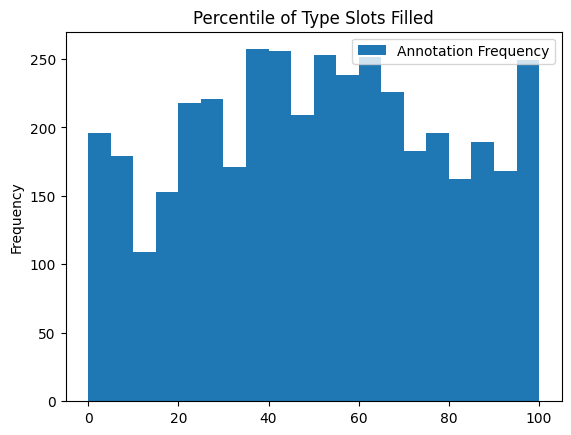

In [23]:
type_slots_filled(useful_repos, title="Percentile of Type Slots Filled")